## Project Descriptions

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #supress warnings


In [2]:
#Altering output display
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',None)

## Import input files

In [3]:
#read data from previous_application.csv file
previous_application=pd.read_csv("C:\\Users\\user\\Downloads\\previous_application.csv")

In [4]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [5]:
previous_application.shape

(1670214, 37)

In [6]:
previous_application.size

61797918

In [7]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [9]:
#read data from application_data file
application_data=pd.read_csv("C:\\Users\\user\\Downloads\\application_data.csv")

In [10]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [11]:
application_data.shape

(307511, 122)

In [12]:
application_data.size

37516342

In [13]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [14]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## Data cleaning

### Application Data

In [15]:

#finding number of missing values in each column
application_data.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [16]:
#finding % of missing values in each column
application_data.isna().mean().round(2)*100

SK_ID_CURR                       0.0
TARGET                           0.0
NAME_CONTRACT_TYPE               0.0
CODE_GENDER                      0.0
FLAG_OWN_CAR                     0.0
FLAG_OWN_REALTY                  0.0
CNT_CHILDREN                     0.0
AMT_INCOME_TOTAL                 0.0
AMT_CREDIT                       0.0
AMT_ANNUITY                      0.0
AMT_GOODS_PRICE                  0.0
NAME_TYPE_SUITE                  0.0
NAME_INCOME_TYPE                 0.0
NAME_EDUCATION_TYPE              0.0
NAME_FAMILY_STATUS               0.0
NAME_HOUSING_TYPE                0.0
REGION_POPULATION_RELATIVE       0.0
DAYS_BIRTH                       0.0
DAYS_EMPLOYED                    0.0
DAYS_REGISTRATION                0.0
DAYS_ID_PUBLISH                  0.0
OWN_CAR_AGE                     66.0
FLAG_MOBIL                       0.0
FLAG_EMP_PHONE                   0.0
FLAG_WORK_PHONE                  0.0
FLAG_CONT_MOBILE                 0.0
FLAG_PHONE                       0.0
F

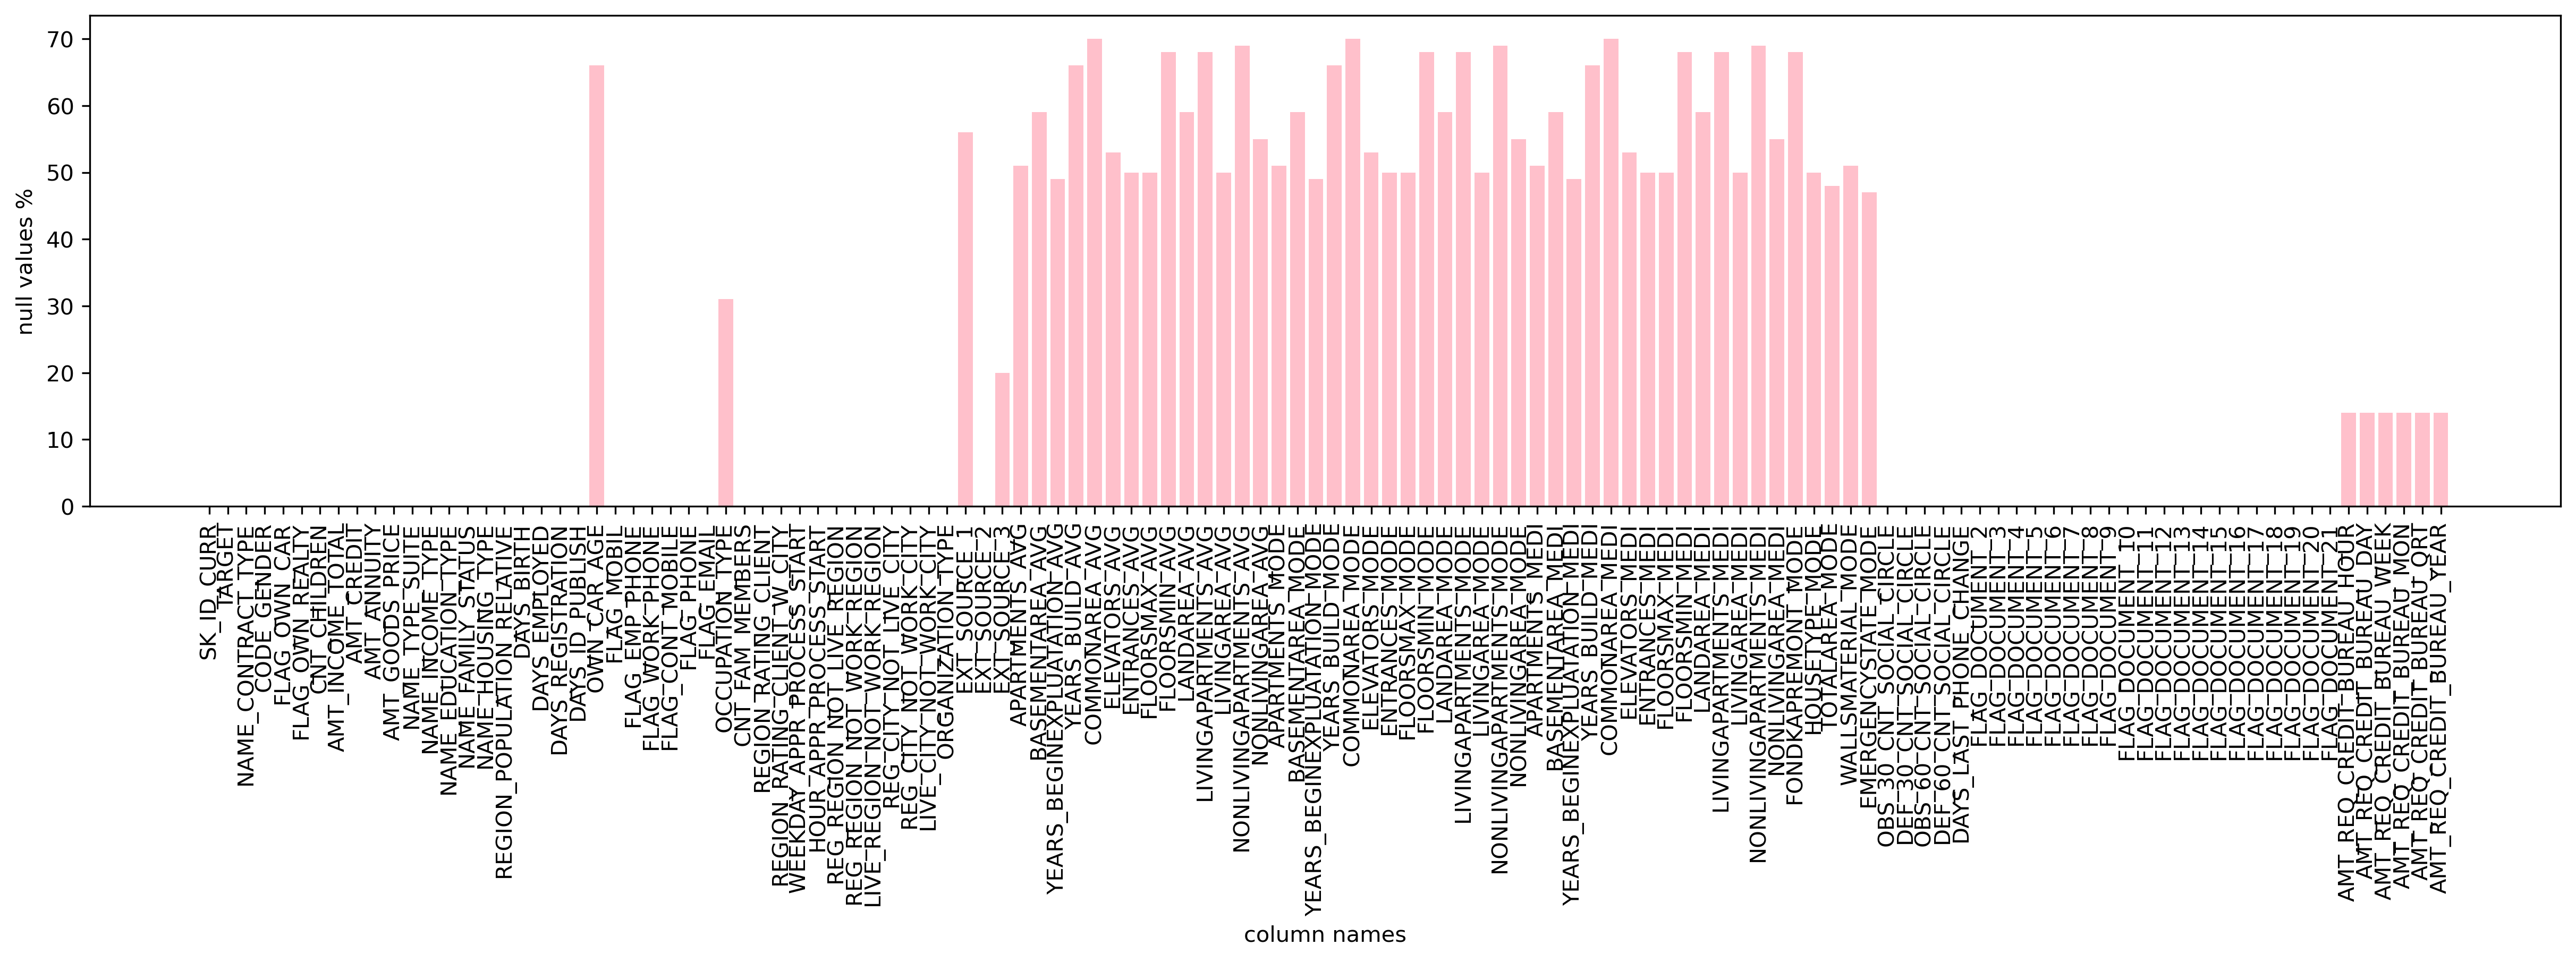

In [17]:
null_app_data=pd.DataFrame((application_data.isna().mean().round(2)*100)).reset_index()
null_app_data.columns=['column name','% of null values']
fig=plt.figure(figsize=(20,4),dpi=300)
col_name=null_app_data['column name']
per_null_val=null_app_data['% of null values']
plt.bar(col_name,per_null_val,color='pink')
plt.xlabel("column names")
plt.ylabel("null values %")
plt.xticks(range(len(col_name)),col_name,rotation='vertical')
plt.show()


In [18]:
#dropping columns with >40% null values
null_40_per=null_app_data[null_app_data['% of null values']>=40]
null_40_per
len(null_40_per)

49

In [19]:
col_to_drop=null_40_per['column name'].tolist()
application_data.drop(labels=col_to_drop,axis=1,inplace=True)

In [20]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [21]:
application_data.shape

(307511, 73)

In [22]:
#deleting other columns unnecessary for analysis
unnecessary_cols=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_2', 'EXT_SOURCE_3','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL']
application_data.drop(labels=unnecessary_cols,axis=1,inplace=True)


In [23]:
application_data.shape

(307511, 45)

In [24]:
application_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [25]:
application_data.isna().mean().round(2)*100

SK_ID_CURR                      0.0
TARGET                          0.0
NAME_CONTRACT_TYPE              0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.0
NAME_TYPE_SUITE                 0.0
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
OCCUPATION_TYPE                31.0
CNT_FAM_MEMBERS                 0.0
REGION_RATING_CLIENT            0.0
REGION_RATING_CLIENT_W_CITY     0.0
WEEKDAY_APPR_PROCESS_START      0.0
HOUR_APPR_PROCESS_START         0.0
REG_REGION_NOT_LIVE_REGION  

In [26]:
application_data.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

##### Imputing null values

In [27]:

#NAME_TYPE_SUITE
application_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [28]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Since the person who accompanied the loan applicant when he was applying for the loan has no relation to ability of the applicant to the loan settlement we will impute the null values in 'NAME_TYPE_SUITE' column with its mode 'Unaccompanied'

In [29]:
application_data['NAME_TYPE_SUITE']=application_data['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [30]:
application_data['NAME_TYPE_SUITE'].isna().sum()

0

In [31]:
#Occupation Type
application_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

OCCUPATION_TYPE is a categorical variable with a high percentage of null values(31%), and the information about the applicant's occupation is important for the bank to decide whether the applicant is likely to be a defaulter or not. Therefore we will fill the null values with a new category 'Occupation unknown'

In [32]:
application_data['OCCUPATION_TYPE']=application_data['OCCUPATION_TYPE'].fillna('Occupation unknown')

In [33]:
application_data['OCCUPATION_TYPE'].isna().sum()

0

In [34]:
#AMT_ANNUITY
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [35]:
#Imputing missing values in AMT_ANNUITY with median value
application_data['AMT_ANNUITY']=application_data['AMT_ANNUITY'].fillna(24903.0000)

In [36]:
application_data['AMT_ANNUITY'].isna().sum()

0

In [37]:
#AMT_GOODS_PRICE
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [38]:
#iMPUTING AMT_GOODS_PRICE with median() value
application_data['AMT_GOODS_PRICE'].median()

450000.0

In [39]:
application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].median(),inplace=True)

In [40]:
application_data['AMT_GOODS_PRICE'].isna().sum()

0

In [41]:
#Imputing AMT_REQ_CREDIT_BUREAU columns with median
application_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()


AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [42]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_MON'].median(),inplace=True)

In [43]:
application_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].isna().sum()


AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [44]:
#Imputing CNT_SOCIAL_CIRCLE with median value
application_data[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                  'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   1.405292                  0.100049  
std                    2.379803                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

In [45]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [46]:
application_data[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                  'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].isna().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [47]:
#Converting negative values to positive values in columns which contain days information
application_data['DAYS_BIRTH']=abs(application_data['DAYS_BIRTH'])
application_data['DAYS_EMPLOYED']=abs(application_data['DAYS_EMPLOYED'])
application_data['DAYS_REGISTRATION']=abs(application_data['DAYS_REGISTRATION'])
application_data['DAYS_ID_PUBLISH']=abs(application_data['DAYS_ID_PUBLISH'])

In [48]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

In [49]:
#Finding duplicate data 
application_data.duplicated().sum()

0

The dataset has no duplicate values

In [50]:

#Checking the number of unique values in a column to check if it is continuous or categorical column
application_data.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                    17
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
WEEKDAY_APPR_PROCESS_START          7
HOUR_APPR_PR

#### Binning Columns

In [51]:
#Binning AMT_INCOME_TOTAL
application_data['AMT_INCOME_TOTAL'].min()

25650.0

In [52]:
application_data['AMT_INCOME_TOTAL'].max()

117000000.0

In [53]:
bins=[0,50000,100000,150000,200000,application_data['AMT_INCOME_TOTAL'].max()]
labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
application_data['AMT_INCOME_GROUP']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins=bins,labels=labels)


In [54]:
application_data['AMT_INCOME_GROUP'].value_counts()

Medium       91591
Very High    87915
High         64307
Low          59181
Very Low      4517
Name: AMT_INCOME_GROUP, dtype: int64

In [55]:
#Binning AMT_CREDIT
application_data['AMT_CREDIT'].min()

45000.0

In [56]:
application_data['AMT_CREDIT'].max()

4050000.0

In [57]:
bins=[0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,application_data['AMT_CREDIT'].max()]
labels=['0-5L','5L-10L', '10L-15L', '15L-20L','20L-25L','25L-30L','30L-35L','35L-40L','Above 40L']
application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=labels)

In [58]:
application_data['AMT_CREDIT']

0          406597.5
1         1293502.5
2          135000.0
3          312682.5
4          513000.0
            ...    
307506     254700.0
307507     269550.0
307508     677664.0
307509     370107.0
307510     675000.0
Name: AMT_CREDIT, Length: 307511, dtype: float64

In [59]:
application_data['AMT_CREDIT_RANGE'].value_counts()

0-5L         149333
5L-10L       108193
10L-15L       39229
15L-20L        8727
20L-25L        1668
25L-30L         329
30L-35L          18
Above 40L        10
35L-40L           4
Name: AMT_CREDIT_RANGE, dtype: int64

In [60]:
#creating YEARS_EMPLOYED column from DAYS_EMPLOYED
application_data['YEARS_EMPLOYED']=abs(application_data['DAYS_EMPLOYED']//365)

In [61]:
#Binning YEARS_EMPLOYED
bins=[-1,5,10,15,20,25,30,35,40,application_data['YEARS_EMPLOYED'].max()]
labels=['0-5','5-10', '10-15', '15-20','20-25','25-30','30-35','35-40','Above 40']
application_data['Experience_Range']=pd.cut(application_data['YEARS_EMPLOYED'],bins=bins,labels=labels)

In [62]:
application_data['Experience_Range'].value_counts()

0-5         152538
5-10         55983
Above 40     55549
10-15        22928
15-20         9730
20-25         5465
25-30         2944
30-35         1740
35-40          634
Name: Experience_Range, dtype: int64

In [63]:
#Finding AGE from DAYS_BIRTH
application_data['AGE']=application_data['DAYS_BIRTH']//365

In [64]:
#Binning AGE

application_data['AGE'].min()

20

In [65]:
application_data['AGE'].max()

69

In [66]:
bins=[20,40,60,70]
labels=['Middle Age Adults','Old Adults','Senior Citizens']
application_data['AGE_GROUP']=pd.cut(application_data['AGE'],bins=bins,labels=labels)

In [67]:
application_data['AGE_GROUP'].value_counts()

Old Adults           142220
Middle Age Adults    135922
Senior Citizens       29368
Name: AGE_GROUP, dtype: int64

In [68]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

#### Datatype conversion

In [69]:
#Datatype conversion
#Conversion of numerical and object columns into categorical
category_cols = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]

for x in category_cols:
    application_data[x] =application_data[x].astype('category')

In [70]:
#Conversion of float64 into int64 columns
int_cols=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
          'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for x in int_cols:
    application_data[x]=application_data[x].astype('int64')

In [71]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

### previous_application 

In [72]:

#Checking null values
previous_application.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [73]:
previous_application.isna().mean().round(2)*100

SK_ID_PREV                       0.0
SK_ID_CURR                       0.0
NAME_CONTRACT_TYPE               0.0
AMT_ANNUITY                     22.0
AMT_APPLICATION                  0.0
AMT_CREDIT                       0.0
AMT_DOWN_PAYMENT                54.0
AMT_GOODS_PRICE                 23.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
RATE_DOWN_PAYMENT               54.0
RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
NAME_CASH_LOAN_PURPOSE           0.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
NAME_PAYMENT_TYPE                0.0
CODE_REJECT_REASON               0.0
NAME_TYPE_SUITE                 49.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY              0.0
NAME_PORTFOLIO                   0.0
NAME_PRODUCT_TYPE                0.0
CHANNEL_TYPE                     0.0
SELLERPLACE_AREA                 0.0
N

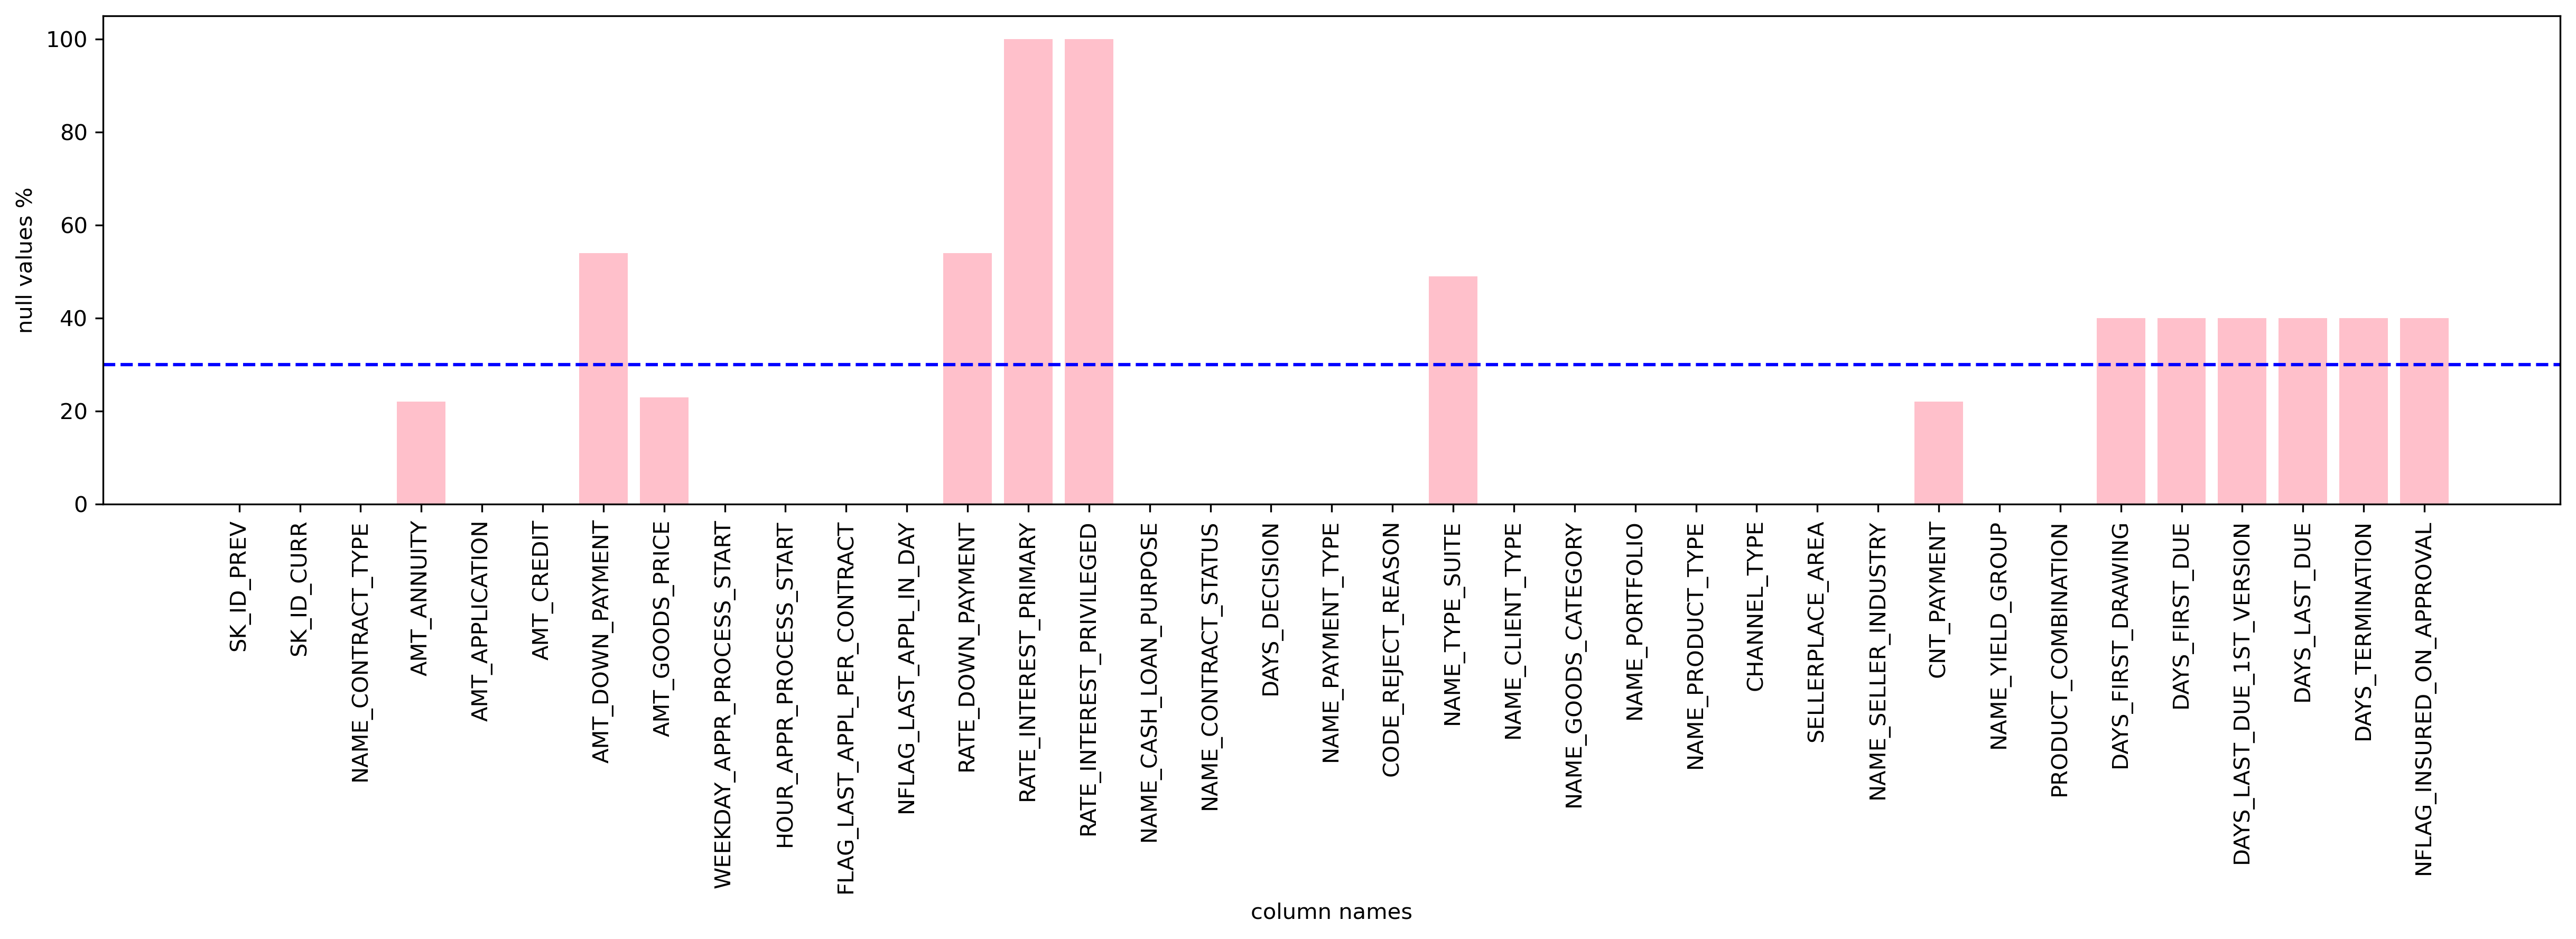

In [74]:
null_prev_data=pd.DataFrame((previous_application.isna().mean().round(2)*100)).reset_index()
null_prev_data.columns=['column name','% of null values']
fig=plt.figure(figsize=(20,4),dpi=300)
col_name=null_prev_data['column name']
per_null_value=null_prev_data['% of null values']
plt.bar(col_name,per_null_value,color='pink')
plt.xlabel("column names")
plt.ylabel("null values %")
plt.xticks(range(len(col_name)),col_name,rotation='vertical')
plt.axhline(30, ls='--',color='blue')
plt.show()


In [75]:
#dropping columns with >30% null values
null_30_per=null_prev_data[null_prev_data['% of null values']>=30]
null_30_per
len(null_30_per)

11

In [76]:
cols_to_drop=null_30_per['column name'].tolist()
previous_application.drop(labels=cols_to_drop,axis=1,inplace=True)

In [77]:
previous_application

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0                17145.0     17145.0          17145.0   
1               607500.0    679671.0         607500.0   
2               112500.0    136444.5         112500.0   
3               450000.0    470790.0         450000.0   
4               337500.0    404055.0         337500.0   
...                  ...         ...              ...   
1670209         267295.5    311400.0         267295.5   
1670210          87750.0     64291.5          87750.0   
1670211         105237.0    102523.5         105237.0   
1670212         180000.0    191880.0         180000.0   
1670213         360000.0    360000.0         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                          XAP             Approved            -73   
1                          XNA             Approved           -164   
2                          XNA             Approved           -301   
3                          XNA             Approved           -512   
4                      Repairs              Refused           -781   
...                        ...                  ...            ...   
1670209                    XAP             Approved           -544   
1670210                    XAP             Approved          -1694   
1670211                    XAP             Approved          -1488   
1670212                    XNA             Approved          -1185   
1670213                    XNA             Approved          -1193   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0        Cash through the bank                XAP         Repeater   
1                       

In [78]:
previous_application.isna().mean().round(2)*100

SK_ID_PREV                      0.0
SK_ID_CURR                      0.0
NAME_CONTRACT_TYPE              0.0
AMT_ANNUITY                    22.0
AMT_APPLICATION                 0.0
AMT_CREDIT                      0.0
AMT_GOODS_PRICE                23.0
WEEKDAY_APPR_PROCESS_START      0.0
HOUR_APPR_PROCESS_START         0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
NFLAG_LAST_APPL_IN_DAY          0.0
NAME_CASH_LOAN_PURPOSE          0.0
NAME_CONTRACT_STATUS            0.0
DAYS_DECISION                   0.0
NAME_PAYMENT_TYPE               0.0
CODE_REJECT_REASON              0.0
NAME_CLIENT_TYPE                0.0
NAME_GOODS_CATEGORY             0.0
NAME_PORTFOLIO                  0.0
NAME_PRODUCT_TYPE               0.0
CHANNEL_TYPE                    0.0
SELLERPLACE_AREA                0.0
NAME_SELLER_INDUSTRY            0.0
CNT_PAYMENT                    22.0
NAME_YIELD_GROUP                0.0
PRODUCT_COMBINATION             0.0
dtype: float64

In [79]:
#deleting other columns unnecessary for analysis
unnecessary_cols=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY',
                 'SELLERPLACE_AREA','NAME_SELLER_INDUSTRY']
previous_application.drop(labels=unnecessary_cols,axis=1,inplace=True)


In [80]:
previous_application.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
CNT_PAYMENT               372230
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
dtype: int64

#### Imputing null values

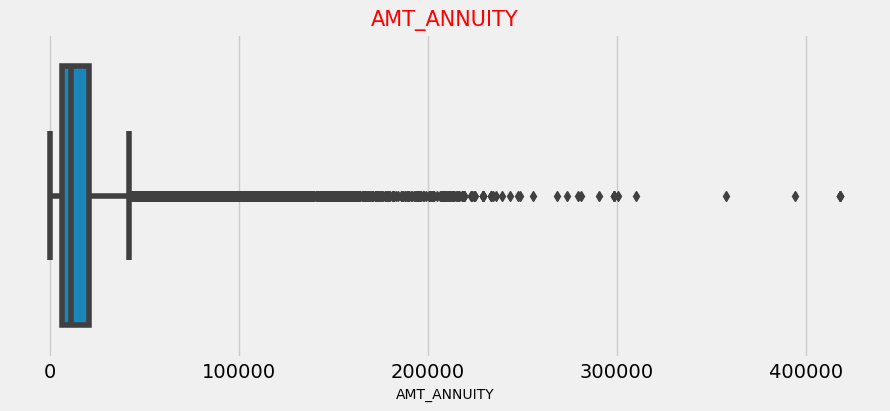

In [81]:
#Analyzing AMT_ANNUITY
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,4))
sns.boxplot(previous_application.AMT_ANNUITY)
plt.title("AMT_ANNUITY",color='red',fontsize=15)
plt.xlabel('AMT_ANNUITY',fontsize=10)
plt.show()

In [82]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [83]:
#Imputing the null values with median as mean is affected by outliers and it would not be the right approach
previous_application['AMT_ANNUITY'].fillna(previous_application['AMT_ANNUITY'].median(),inplace=True)

In [84]:
previous_application['AMT_ANNUITY'].isna().sum()

0

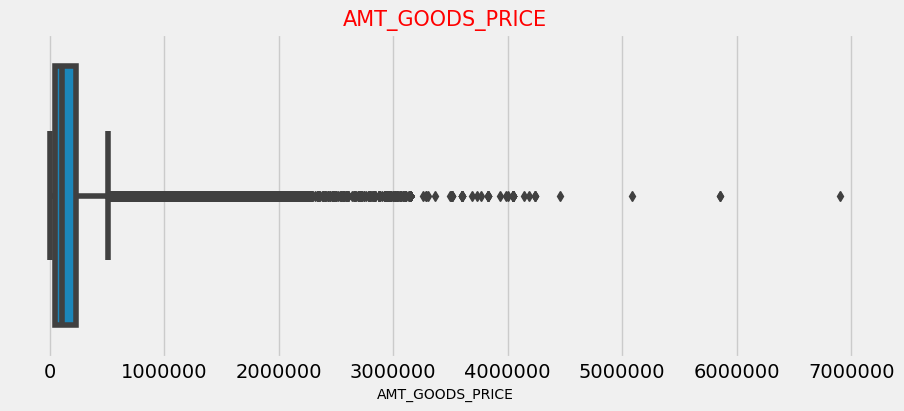

In [85]:
#Analyzing AMT_GOODS_PRICE
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,4))
sns.boxplot(previous_application.AMT_GOODS_PRICE)
plt.title("AMT_GOODS_PRICE",color='red',fontsize=15)
plt.xlabel('AMT_GOODS_PRICE',fontsize=10)
plt.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.show()

In [86]:
#Imputing the null values with median as mean is affected by outliers and it would not be the right approach
previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].median(),inplace=True)

In [87]:
previous_application['AMT_GOODS_PRICE'].isna().sum()

0

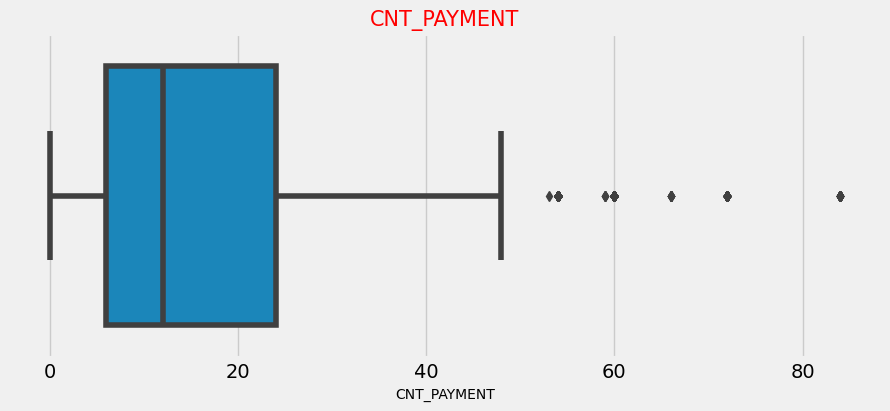

In [88]:
#Analyzing CNT_PAYMENT
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,4))
sns.boxplot(previous_application.CNT_PAYMENT)
plt.title("CNT_PAYMENT",color='red',fontsize=15)
plt.xlabel('CNT_PAYMENT',fontsize=10)
plt.show()

In [89]:
#Imputing the null values with median as mean is affected by outliers and it would not be the right approach
previous_application['CNT_PAYMENT'].fillna(previous_application['CNT_PAYMENT'].median(),inplace=True)

In [90]:
previous_application['CNT_PAYMENT'].isna().sum()

0

In [91]:
#Convert DAYS_DECISION from negative to positive 
previous_application['DAYS_DECISION'] = abs(previous_application['DAYS_DECISION'])

In [92]:
previous_application

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE  \
0                17145.0     17145.0          17145.0                    XAP   
1               607500.0    679671.0         607500.0                    XNA   
2               112500.0    136444.5         112500.0                    XNA   
3               450000.0    470790.0         450000.0                    XNA   
4               337500.0    404055.0         337500.0                Repairs   
...                  ...         ...              ...                    ...   
1670209         267295.5    311400.0         267295.5                    XAP   
1670210          87750.0     64291.5          87750.0                    XAP   
1670211         105237.0    102523.5         105237.0                    XAP   
1670212         180000.0    191880.0         180000.0                    XNA   
1670213         360000.0    360000.0         360000.0                    XNA   

        NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0                   Approved             73  Cash through the bank   
1                   Approved            164                    XNA   
2                   Approved            301  Cash through the bank   
3                   Approved            512  Cash through the bank   
4                    Refused            781  Cash through the bank   
...                      ...            ...                    ...   
1670209             Approved            544  Cash through the bank   
1670210             Approved           1694  Cash through the bank   
1670211             Approved           1488  Cash through the bank   
1670212             Approved           1185  Cash through the bank   
1670213             Approved           1193  Cash through the bank   

        CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  \
0                      XAP         Repeater                Mobile   
1                      XAP         Repeater                   XNA   
2                      XAP         Repeater                   XNA   
3                      XAP         Repeater                   XNA   
4                       HC         Repeater                   XNA   
...                    ...              ...                   ...   
1670209                XAP        Refreshed             Furniture   
1670210                XAP              New             Furniture   
1670211                XAP         Repeater  Consumer Electronics   
1670212                XAP         Repeater                   XNA   
1670213                XAP         Repeater                   XNA   

        NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
0                  POS               XNA             Country-wide   
1                 Cash            x-sell           Contact center   
2                 Cash            x-sell  Credit and cash offices   
3                 Cash            x-sell  Credit and cash offices   
4                 Cash           walk-in  Credit and cash offices   
...                ...               ...                      ...   
1670209            POS               XNA                    Stone   
1670210            PO

In [93]:
#Finding duplicate data 
previous_application.duplicated().sum()

0

The dataset has no duplicate values

#### Datatype conversion

In [94]:

#Checking the number of unique values in a column to check if it is continuous or categorical column
previous_application.nunique()


SK_ID_PREV                1670214
SK_ID_CURR                 338857
NAME_CONTRACT_TYPE              4
AMT_ANNUITY                357959
AMT_APPLICATION             93885
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
DAYS_DECISION                2922
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
CNT_PAYMENT                    49
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

In [95]:
Catgorical_col_prev = ['NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                       'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE',
                      'CHANNEL_TYPE','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

for col in Catgorical_col_prev:
    previous_application[col] =pd.Categorical(previous_application[col])

In [96]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1670214 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

## Identifying Outliers

### application_data

In [97]:
application_data.describe()

SK_ID_CURR   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean   278180.518577       0.417052      1.687979e+05  5.990260e+05   
std    102790.175348       0.722121      2.371231e+05  4.024908e+05   
min    100002.000000       0.000000      2.565000e+04  4.500000e+04   
25%    189145.500000       0.000000      1.125000e+05  2.700000e+05   
50%    278202.000000       0.000000      1.471500e+05  5.135310e+05   
75%    367142.500000       1.000000      2.025000e+05  8.086500e+05   
max    456255.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307511.000000     3.075110e+05               307511.000000   
mean    27108.487841     5.383163e+05                    0.020868   
std     14493.461065     3.692890e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count    307509.000000            307511.000000               307511.000000   
mean          2.152665                12.063419                    0.015144   
std           0.910682                 3.265832                    0.122126   
min           1.000000                 0.000000                    0.000000   
25%           2.000000                10.000000                    0.000000   
50%           2.000000                12.000000                    0.000000   
75%           3.000000                14.000000                    0.000000   
max          20.000000                23.000000                    1.000000   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   1.417523                  0.142944   
std                    2.398395                  0.446033   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   1.400626                  0.099717   
std                    2.377224                  0.361735   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           307510.000000               307511.000000   
mean              -962.858788                    0.005538   
std                826.808487                    0.078014   
min             

Identifying outliers in the following columns: 

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
YEARS_EMPLOYED
AGE

In [99]:
# Function to find outliers using the statistical method IQR (Interquartile Range)

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers



In [100]:
app_data_cols=['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','YEARS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH']

for i in app_data_cols:
    outliers = find_outliers_IQR(application_data[i])
    print("\n",i)

    print("number of outliers: "+ str(len(outliers)))

    print("max outlier value: "+ str(outliers.max()))

    print("min outlier value: "+ str(outliers.min()))
    
    


 AMT_ANNUITY
number of outliers: 7504
max outlier value: 258025.5
min outlier value: 61708.5

 AMT_INCOME_TOTAL
number of outliers: 14035
max outlier value: 117000000.0
min outlier value: 337545.0

 AMT_CREDIT
number of outliers: 6562
max outlier value: 4050000.0
min outlier value: 1618767.0

 AMT_GOODS_PRICE
number of outliers: 14728
max outlier value: 4050000.0
min outlier value: 1345500.0

 YEARS_EMPLOYED
number of outliers: 56440
max outlier value: 1000
min outlier value: 35

 CNT_CHILDREN
number of outliers: 4272
max outlier value: 19
min outlier value: 3

 DAYS_BIRTH
number of outliers: 0
max outlier value: nan
min outlier value: nan


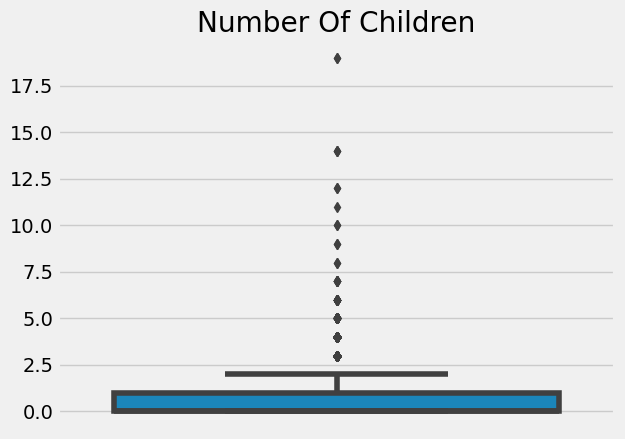

In [101]:
#Visualizing the outliers using boxplot
plt.figure()
sns.boxplot(y=application_data['CNT_CHILDREN'])
plt.title("Number Of Children")
plt.ylabel("")
plt.show()


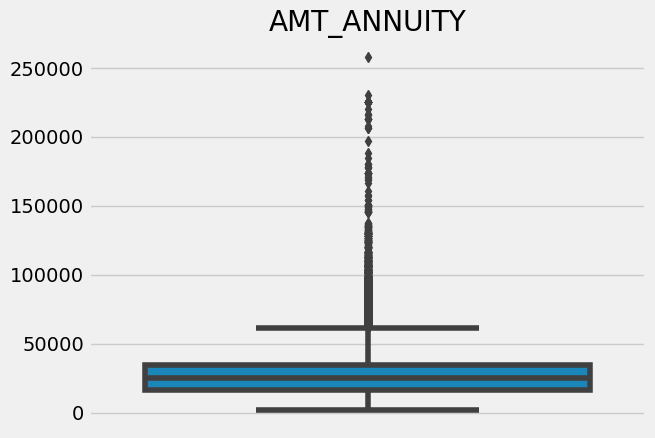

In [102]:
plt.figure()
sns.boxplot(y=application_data['AMT_ANNUITY'])
plt.title("AMT_ANNUITY")
plt.ylabel("")
plt.show()

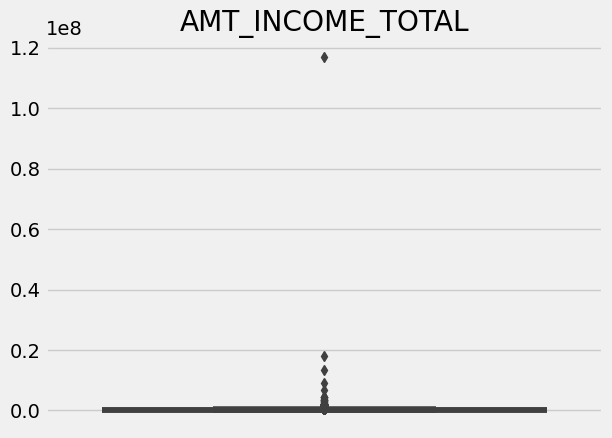

In [103]:
plt.figure()
sns.boxplot(y=application_data['AMT_INCOME_TOTAL'])
plt.title("AMT_INCOME_TOTAL")
plt.ylabel("")
plt.show()

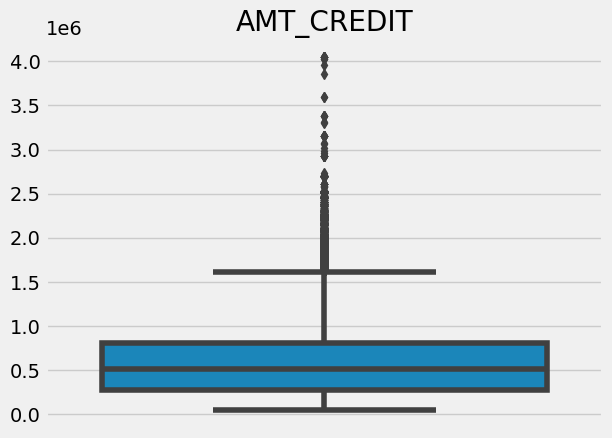

In [104]:
plt.figure()
sns.boxplot(y=application_data['AMT_CREDIT'])
plt.title("AMT_CREDIT")
plt.ylabel("")
plt.show()

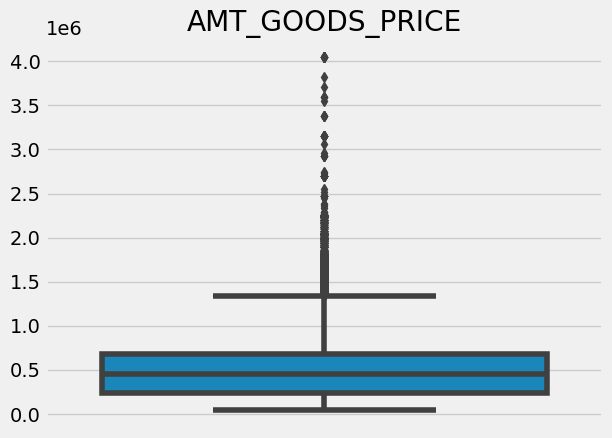

In [105]:
plt.figure()
sns.boxplot(y=application_data['AMT_GOODS_PRICE'])
plt.title("AMT_GOODS_PRICE")
plt.ylabel("")
plt.show()

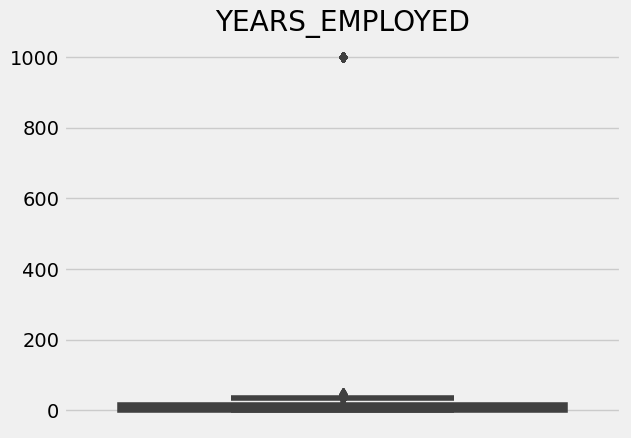

In [106]:
plt.figure()
sns.boxplot(y=application_data['YEARS_EMPLOYED'])
plt.title("YEARS_EMPLOYED")
plt.ylabel("")
plt.show()

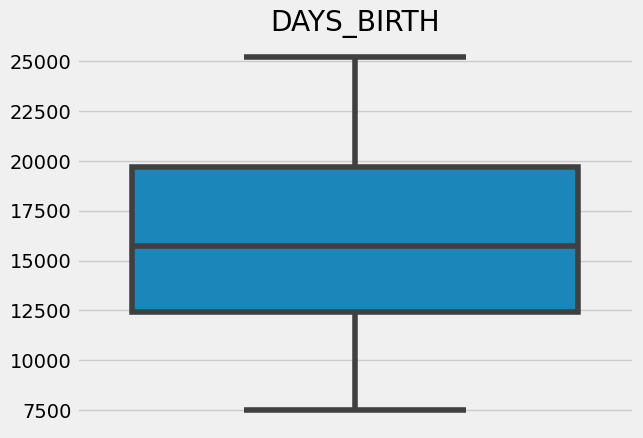

In [107]:
plt.figure()
sns.boxplot(y=application_data['DAYS_BIRTH'])
plt.title("DAYS_BIRTH")
plt.ylabel("")
plt.show()

**Inference:** <br>
- By using both IQR method and by visualizing boxplots we can see that the columns 'AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','YEARS_EMPLOYED','CNT_CHILDREN' have outliers.
- We can see that the maximum outlier value for the column CNT_CHILDREN is 19 which is highly unlikely, and the maximum outlier value for YEARS_EMPLOYED is 1000 which is not possible.
- The column DAYS_BIRTH does not have any outliers.



### Previous_application

In [108]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1670214 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

In [109]:
prev_appl_col=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']


for i in prev_appl_col:
    outliers = find_outliers_IQR(previous_application[i])
    print("\n",i)

    print("number of outliers: "+ str(len(outliers)))

    print("max outlier value: "+ str(outliers.max()))

    print("min outlier value: "+ str(outliers.min()))


 AMT_ANNUITY
number of outliers: 162620
max outlier value: 418058.145
min outlier value: 30739.86

 AMT_APPLICATION
number of outliers: 208019
max outlier value: 6905160.0
min outlier value: 422829.0

 AMT_CREDIT
number of outliers: 179989
max outlier value: 6905160.0
min outlier value: 504814.5

 AMT_GOODS_PRICE
number of outliers: 236035
max outlier value: 6905160.0
min outlier value: 349798.5

 DAYS_DECISION
number of outliers: 17571
max outlier value: 2922
min outlier value: 2831

 CNT_PAYMENT
number of outliers: 344916
max outlier value: 84.0
min outlier value: 0.0


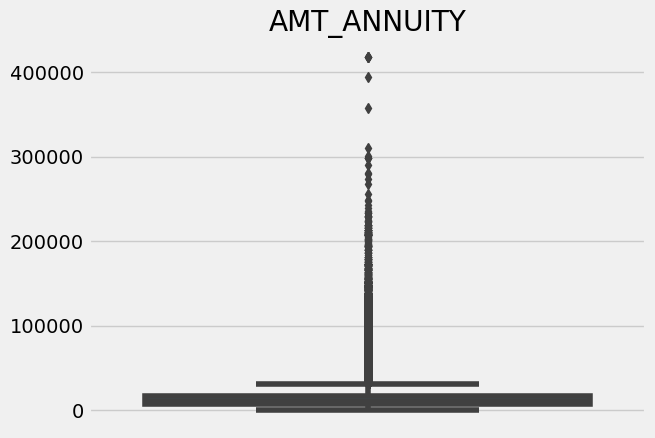

In [110]:
#Visualizing the outliers using boxplot
plt.figure()
sns.boxplot(y=previous_application['AMT_ANNUITY'])
plt.title("AMT_ANNUITY")
plt.ylabel("")
plt.show()

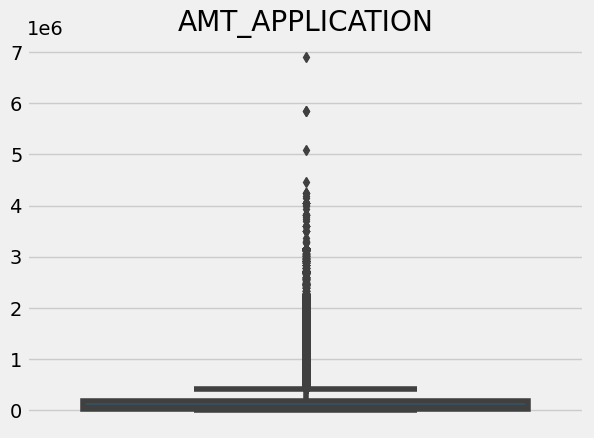

In [111]:
plt.figure()
sns.boxplot(y=previous_application['AMT_APPLICATION'])
plt.title("AMT_APPLICATION")
plt.ylabel("")
plt.show()

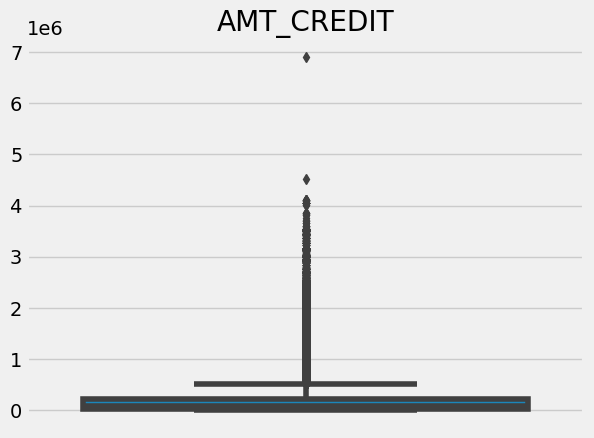

In [112]:
plt.figure()
sns.boxplot(y=previous_application['AMT_CREDIT'])
plt.title("AMT_CREDIT")
plt.ylabel("")
plt.show()

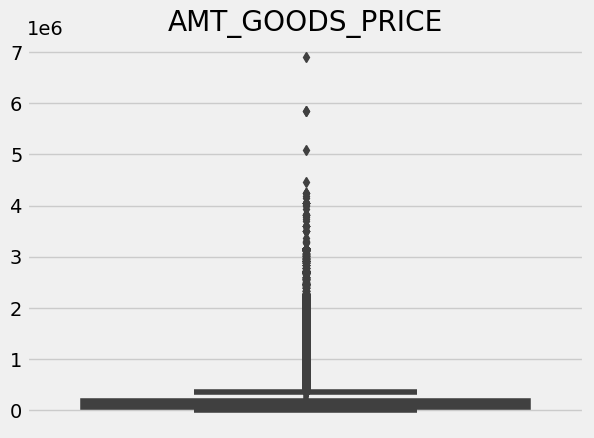

In [113]:
plt.figure()
sns.boxplot(y=previous_application['AMT_GOODS_PRICE'])
plt.title("AMT_GOODS_PRICE")
plt.ylabel("")
plt.show()

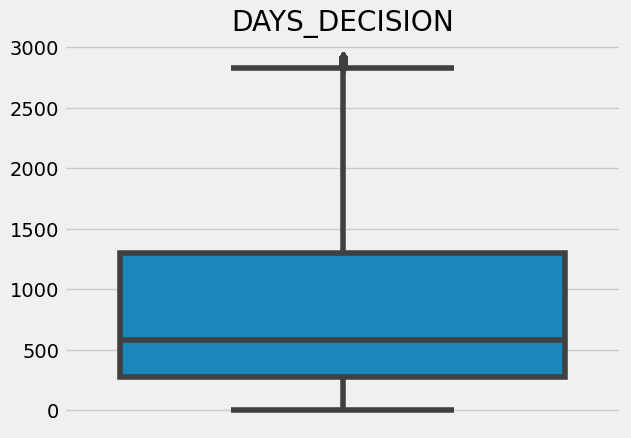

In [114]:
plt.figure()
sns.boxplot(y=previous_application['DAYS_DECISION'])
plt.title("DAYS_DECISION")
plt.ylabel("")
plt.show()

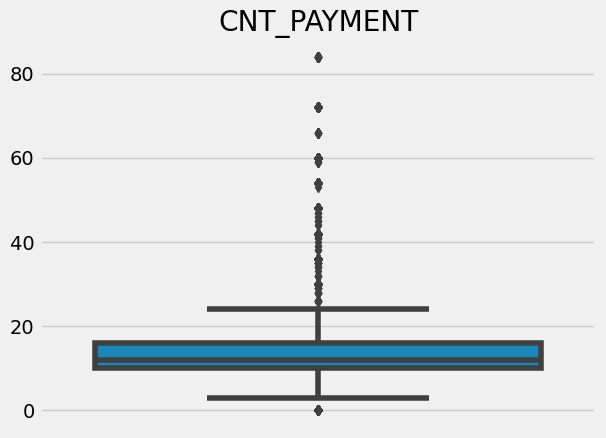

In [115]:
plt.figure()
sns.boxplot(y=previous_application['CNT_PAYMENT'])
plt.title("CNT_PAYMENT")
plt.ylabel("")
plt.show()

**Inference:** <br>
By using both IQR method and by visualizing boxplots we can see that the columns 'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT' have outliers.

### Data Imbalance

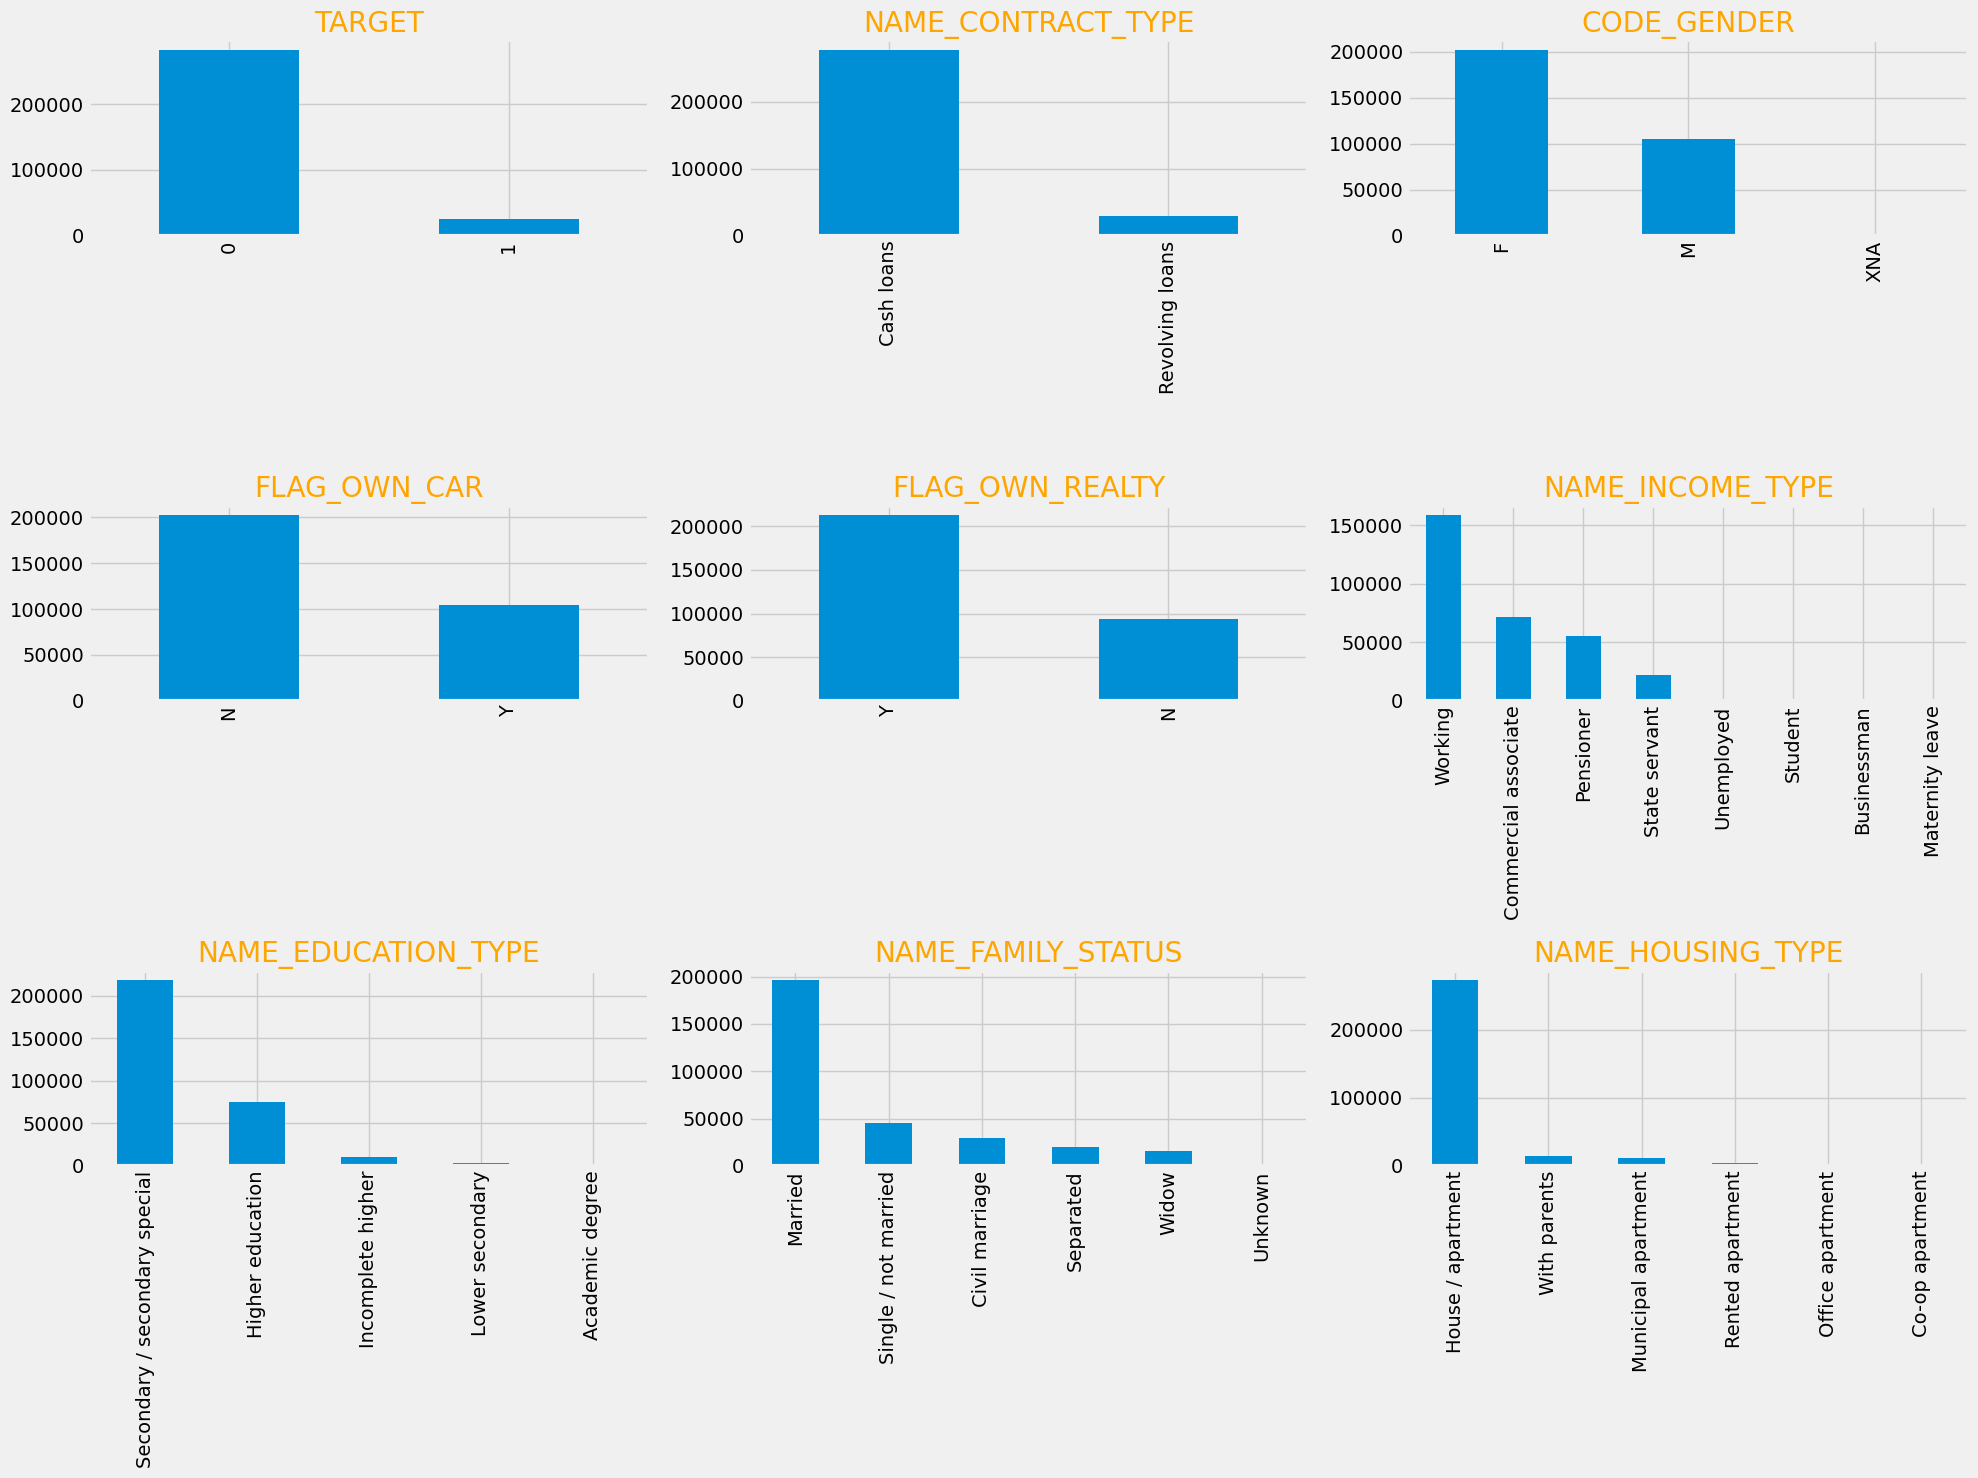

In [156]:
# Finding Data Imbalance in application_data
# Plotting the data imbalance in categorical variables.

cat_cols = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
k=0
plt.figure(figsize=(20,15))
for x in cat_cols:    
    k=k+1
    plt.subplot(3, 3,k)    
    application_data[x].value_counts().plot(kind='bar');
    plt.title(x,color='orange')
    plt.tight_layout()

In [157]:
application_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [164]:
ratio_target_imbalance=application_data['TARGET'].tolist().count(0)/application_data['TARGET'].tolist().count(1)
ratio_target_imbalance

11.387150050352467

In [161]:
application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [165]:
ratio_gender_imbalance=application_data['CODE_GENDER'].tolist().count('F')/application_data['CODE_GENDER'].tolist().count('M')
ratio_gender_imbalance

1.9269934037064886

In [166]:
application_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [168]:
ratio_contact_type_imbalance=application_data['NAME_CONTRACT_TYPE'].tolist().count('Cash loans')/application_data['NAME_CONTRACT_TYPE'].tolist().count('Revolving loans')
ratio_contact_type_imbalance

9.502783565012466

In [169]:
application_data['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [170]:
ratio_car_imbalance=application_data['FLAG_OWN_CAR'].tolist().count('N')/application_data['FLAG_OWN_CAR'].tolist().count('Y')
ratio_car_imbalance

1.9402411389560843

In [171]:
application_data['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [172]:
ratio_realty_imbalance=application_data['FLAG_OWN_REALTY'].tolist().count('Y')/application_data['FLAG_OWN_REALTY'].tolist().count('N')
ratio_realty_imbalance

2.2644826378199343

**Inference:** <br>
- The data has huge imbalance with regards to the TARGET variable. We have extensive data for applicants who are likely to repay the loan but relatively very less data for applicants likely to have difficulty in repayment.
- There is also data imbalance in the NAME_CONTRACT_TYPE variable. There is more data for Cash loans than Revolving loans.
- In NAME_FAMILY_STATUS there are many data for married people and in NAME_HOUSING_TYPE most of the applicants live in House/Apartments

## Data Analysis

In [174]:
# Dividing the data into two based on the TARGET variable for comparative analysis

had_difficulties=application_data[application_data['TARGET']==1]
had_no_difficulties=application_data[application_data['TARGET']==0]

In [176]:
had_difficulties.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002      1         Cash loans           M            N   
26      100031      1         Cash loans           F            N   
40      100047      1         Cash loans           M            N   
42      100049      1         Cash loans           F            N   
81      100096      1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801        9461            637             3648.0   
26                    0.018029       18724           2628             6573.0   
40                    0.025164       17482           1262             1182.0   
42                    0.007305       13384           3597               45.0   
81                    0.028663       24794         365243             5391.0   

    DAYS_ID_PUBLISH     OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0              2120            Laborers              1.0                    2   
26             1827       Cooking staff              1.0                    3   
40             1029            Laborers              2.0                    2   
42             4409         Sales staff              2.0                    3   
81             4199  Occupation unknown              2.0                    2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
26                           2                     MONDAY   
40                           2                    TUESDAY   
42                           3                   THURSDAY   
81                           2                   THURSDAY   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
81                       10                           0   

   REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                           0                           0   
26                          0                           0   
40                          0                           0   
42                          0                           0   
81                          0                           0   

   REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                       0                      0                       0   
26                      0                      0                     

In [177]:
had_no_difficulties.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003      0         Cash loans           F            N   
2      100004      0    Revolving loans           M            Y   
3      100006      0         Cash loans           F            N   
4      100007      0         Cash loans           M            N   
5      100008      0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   
5                    0.035792       16941           1588             4970.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
1              291      Core staff              2.0                    1   
2             2531        Laborers              1.0                    2   
3             2437        Laborers              2.0                    2   
4             3458      Core staff              1.0                    2   
5              477        Laborers              2.0                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1                           1                     MONDAY   
2                           2                     MONDAY   
3                           2                  WEDNESDAY   
4                           2                   THURSDAY   
5                           2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   
5                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
1                      0                      0                       0   
2                      0                      0                       0   
3                      0                      0                       0   
4                     

## Univariate Analysis on categorical variables

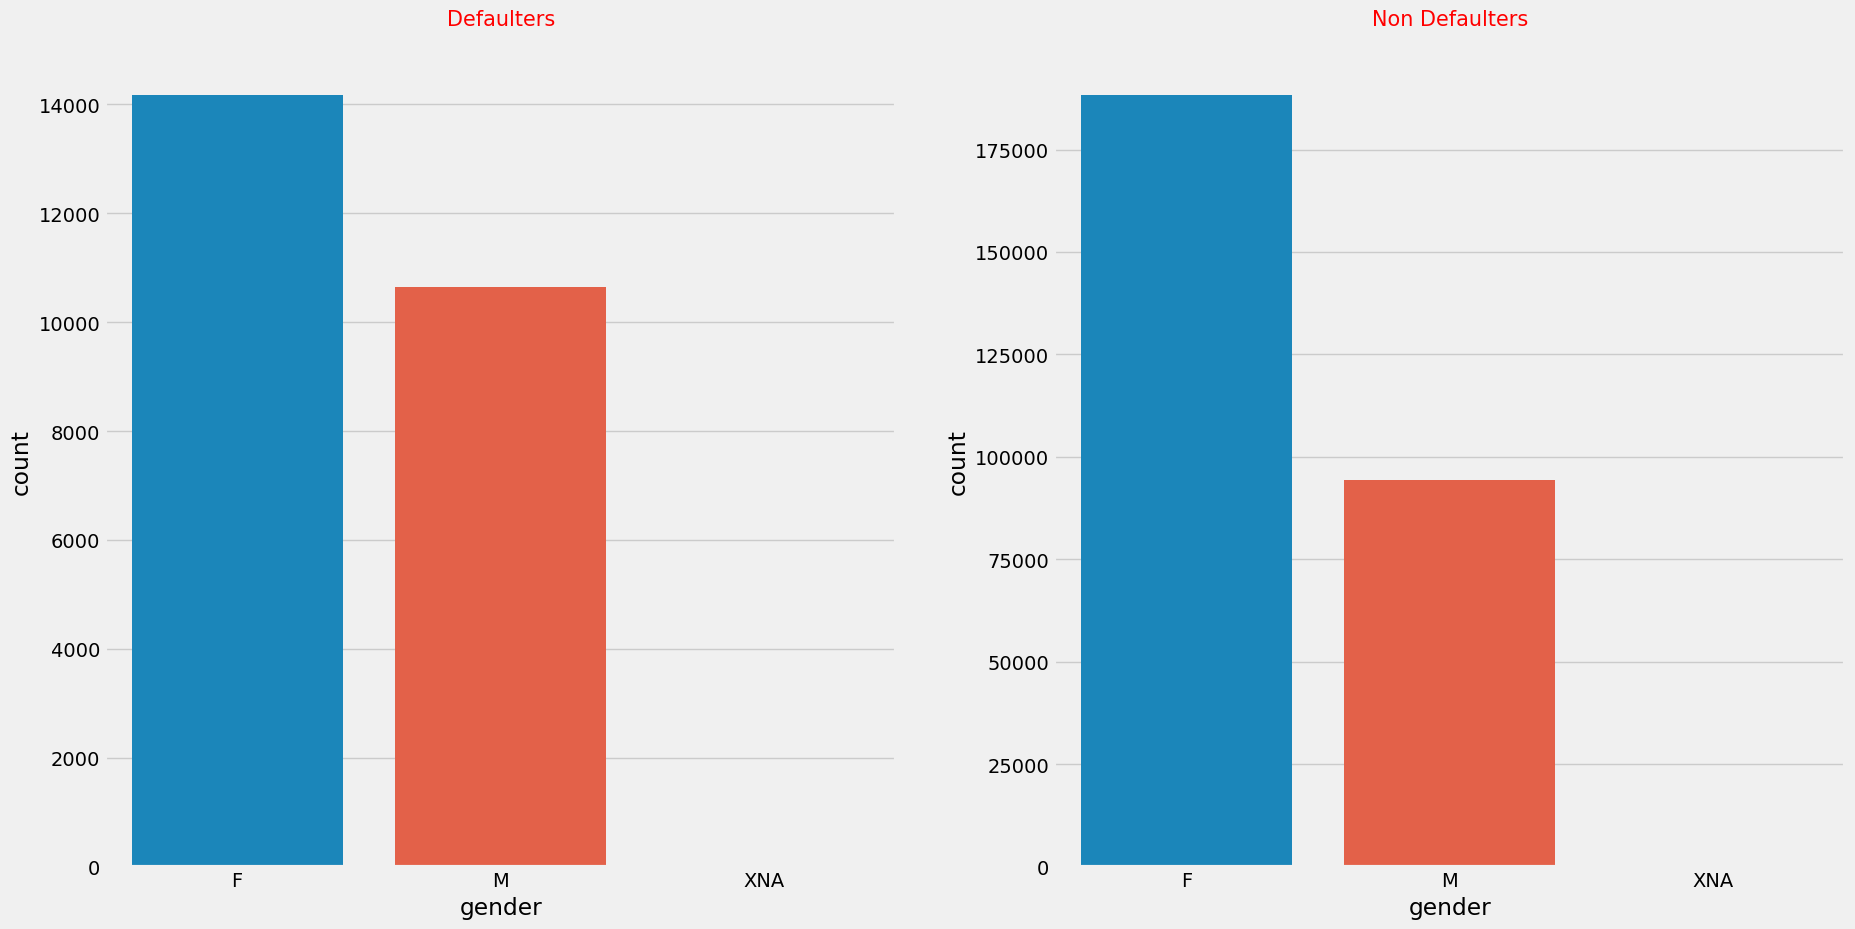

In [186]:
# Analyzing how repayment of loan is affected by gender 
plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['CODE_GENDER'])
plt.title('Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("gender")

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['CODE_GENDER'])
plt.title('Non Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("gender")

plt.show()

The number of female applicants is greater than male applicants in both defaulters and non defaulters list

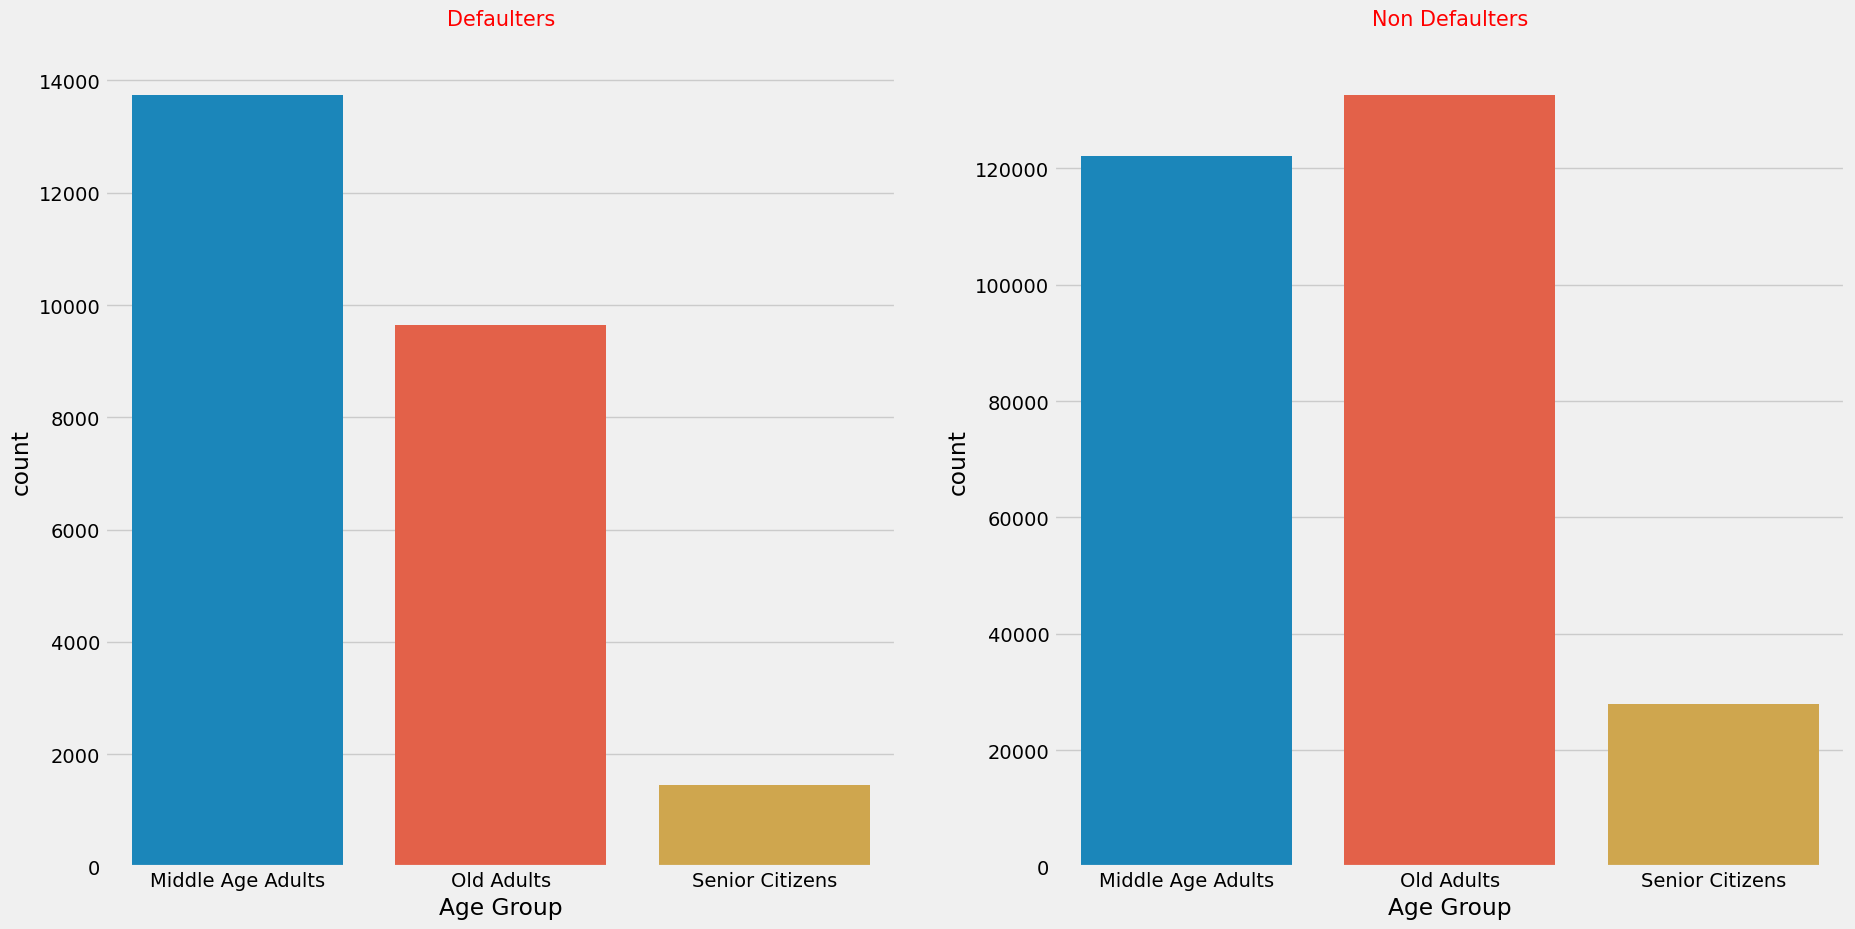

In [200]:
# Analyzing how repayment of loan is affected by age

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['AGE_GROUP'])
plt.title('Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Age Group")

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['AGE_GROUP'])
plt.title('Non Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Age Group")

plt.show()

Middle age adults are likely to default more and Senior citizens are the least to default.

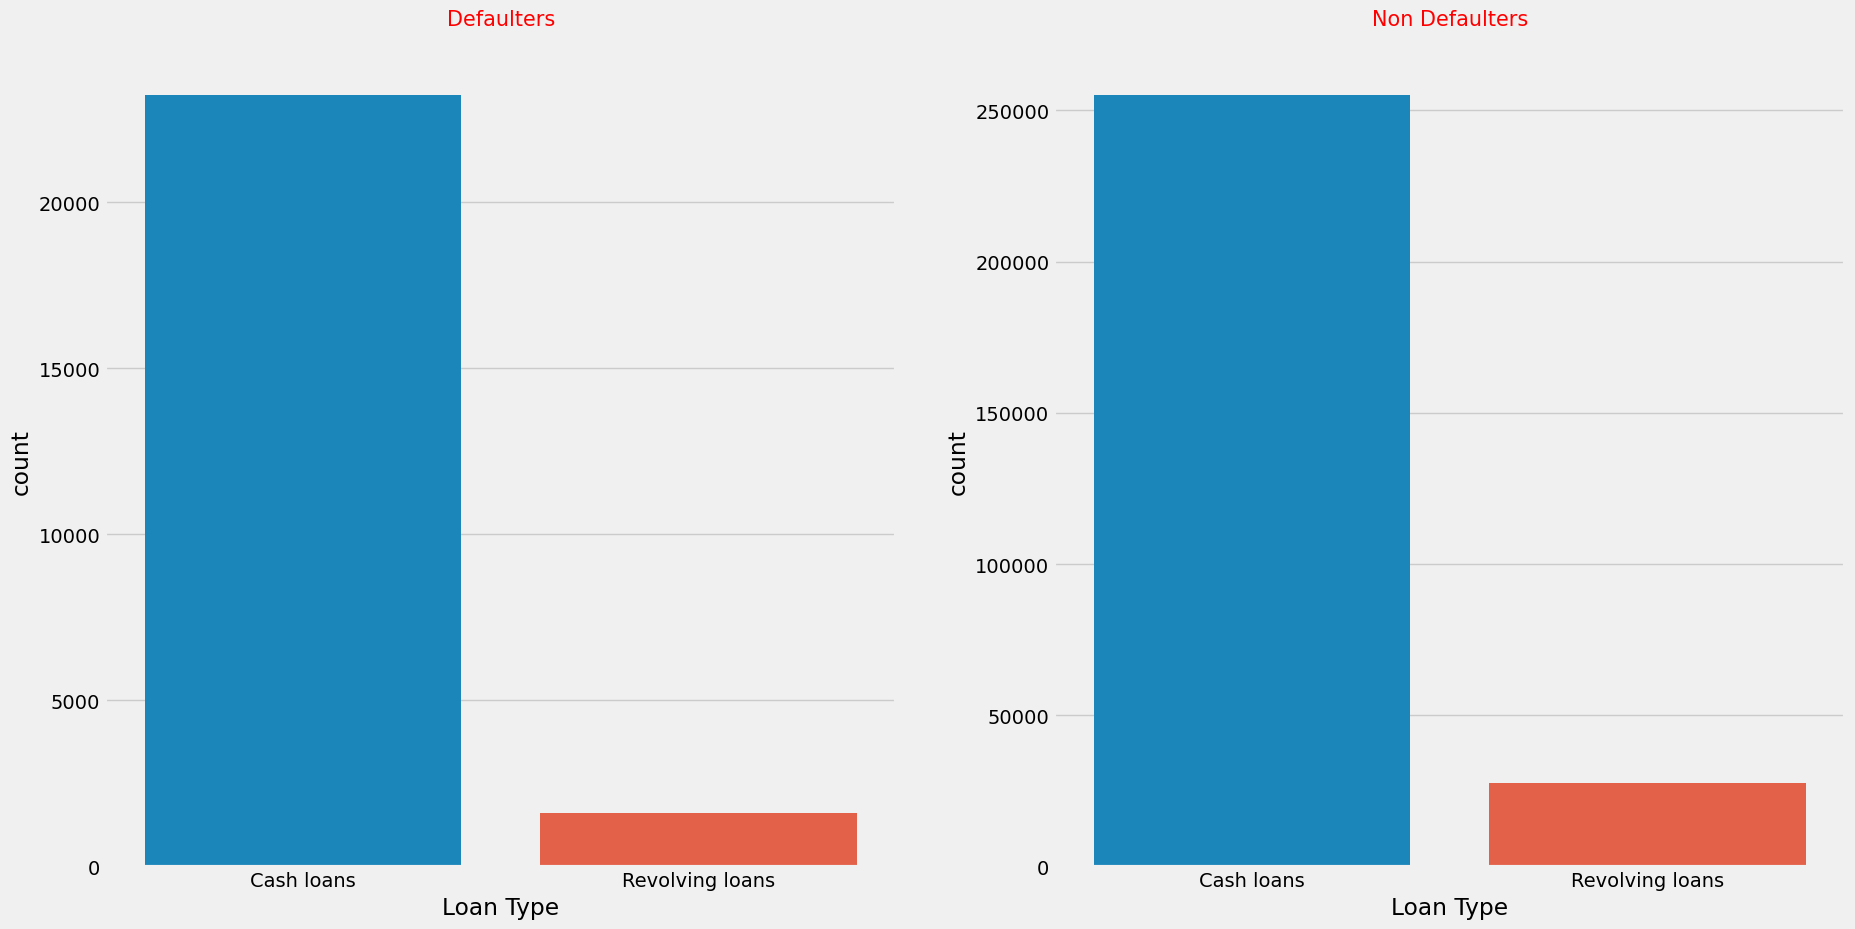

In [201]:
# Analyzing how repayment of loan is affected by loan type

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['NAME_CONTRACT_TYPE'])
plt.title('Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Loan Type")

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['NAME_CONTRACT_TYPE'])
plt.title('Non Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Loan Type")

plt.show()

Both cases seem to follow the same pattern where Cash loans is greater than Revolving loans.

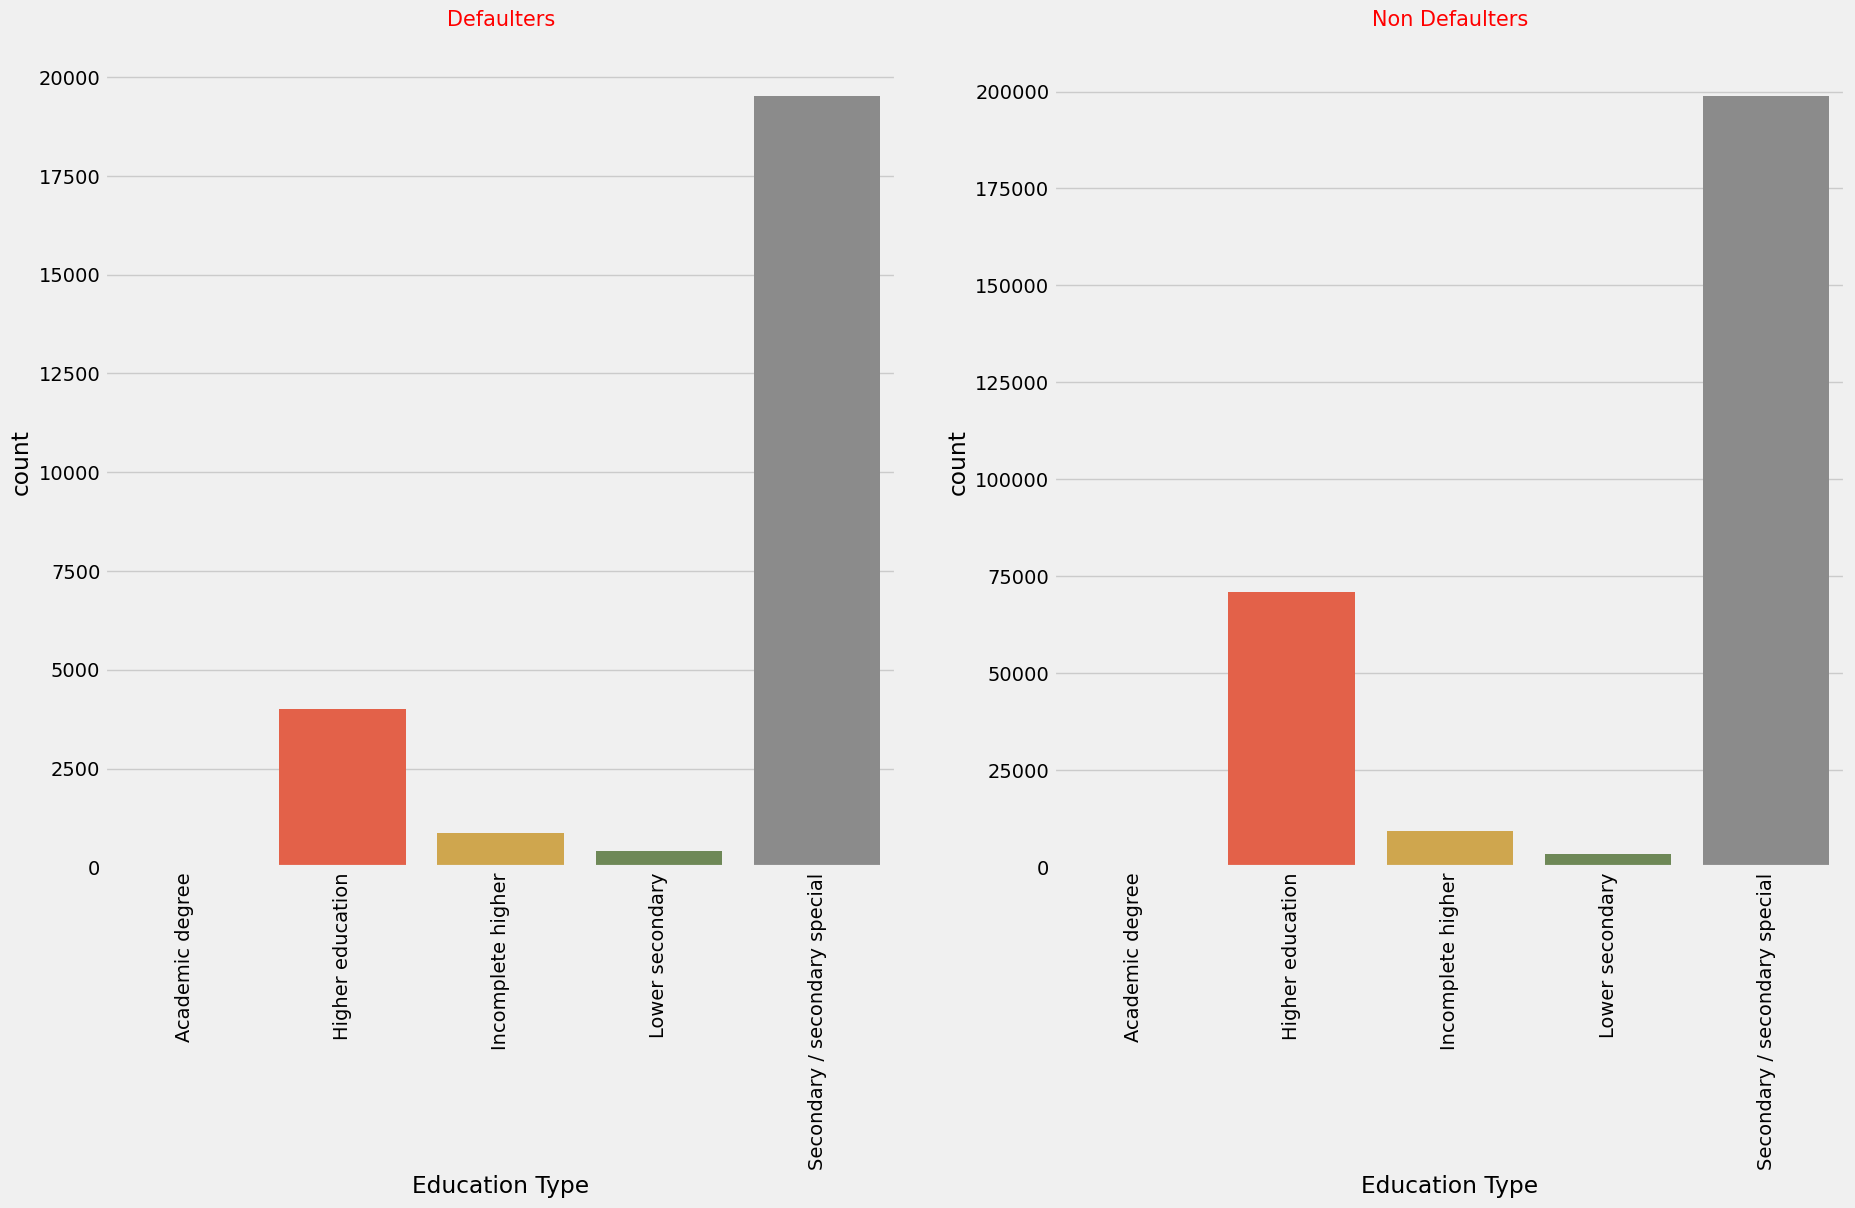

In [204]:
# Analyzing how repayment of loan is affected by education type

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['NAME_EDUCATION_TYPE'])
plt.title('Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Education Type")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['NAME_EDUCATION_TYPE'])
plt.title('Non Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Education Type")
plt.xticks(rotation=90)

plt.show()

Both cases seem to follow the same pattern where applicants who have completed Secondary/Secondary special have highest count followed by applicants with Higher education.

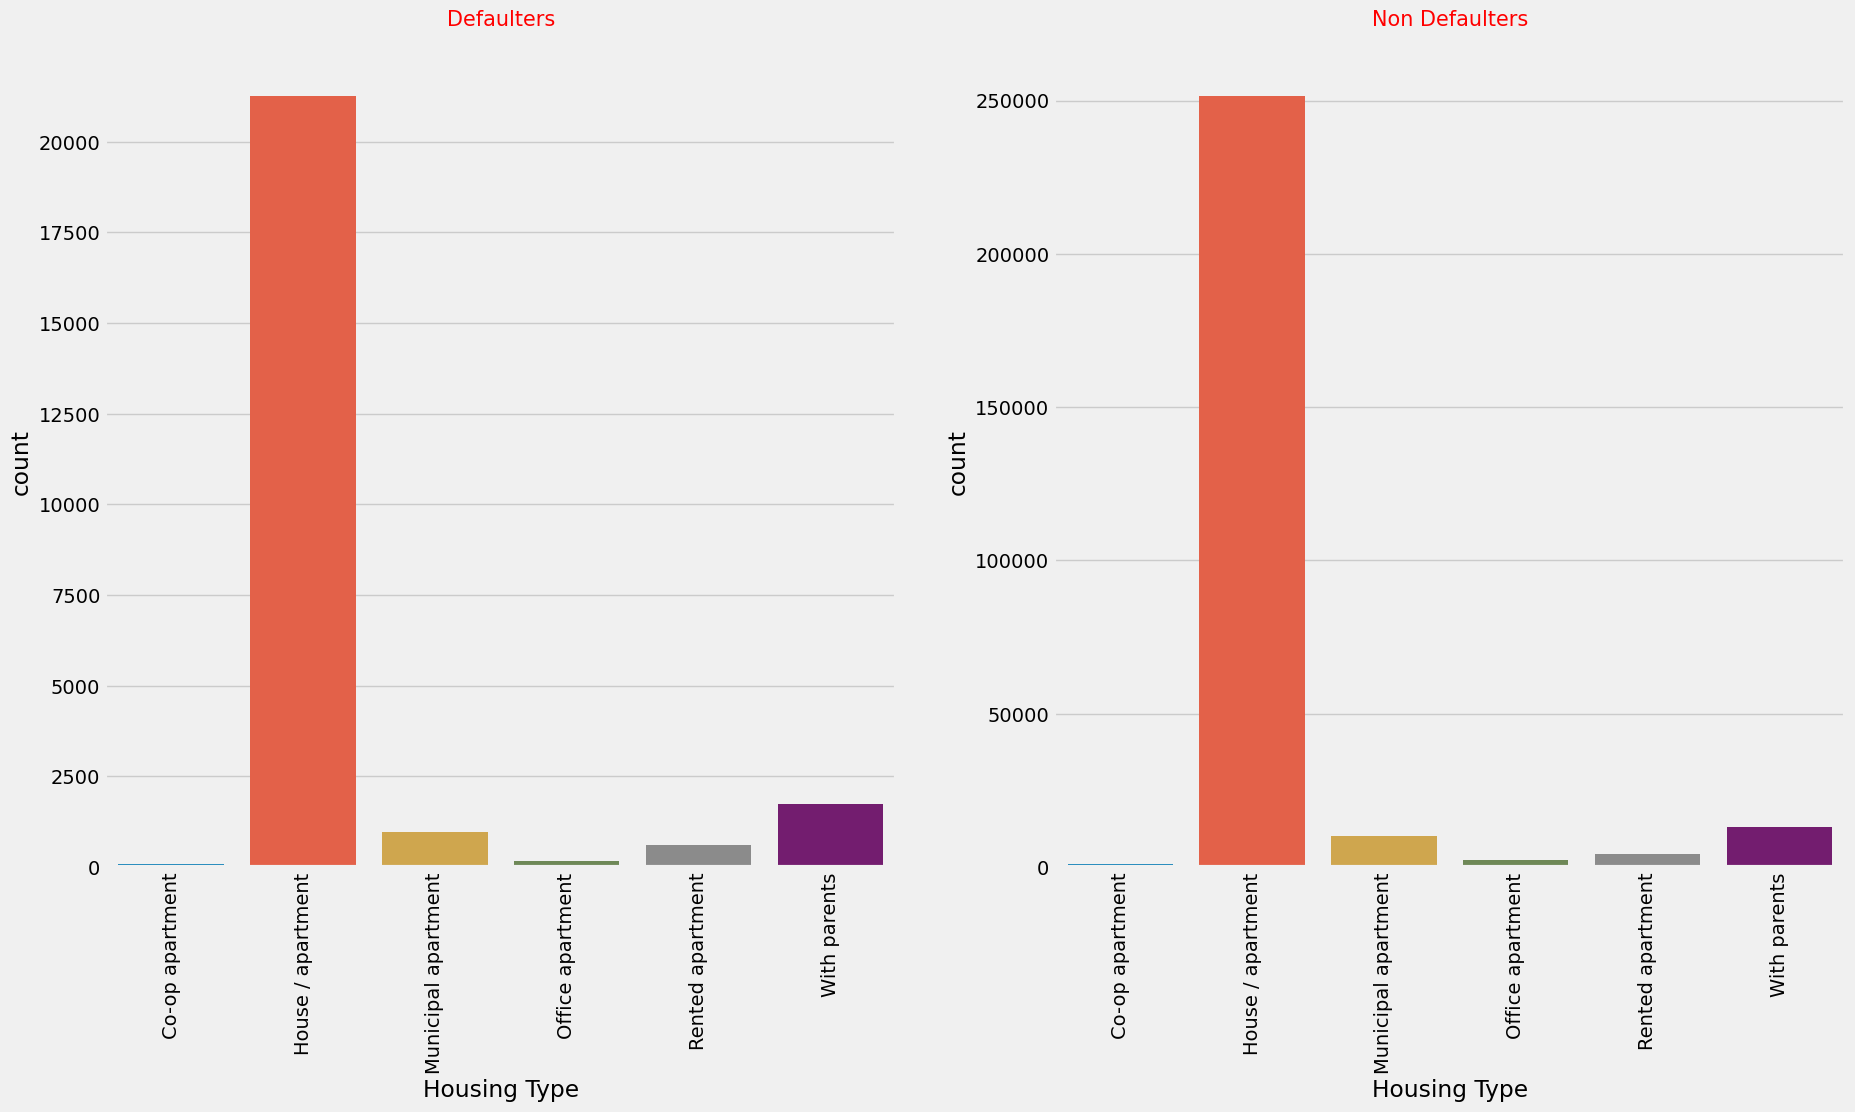

In [205]:
# Analyzing how repayment of loan is affected by housing type

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['NAME_HOUSING_TYPE'])
plt.title('Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Housing Type")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['NAME_HOUSING_TYPE'])
plt.title('Non Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Housing Type")
plt.xticks(rotation=90)

plt.show()

Both cases seem to follow the same pattern where most applicants live in House/apartment.

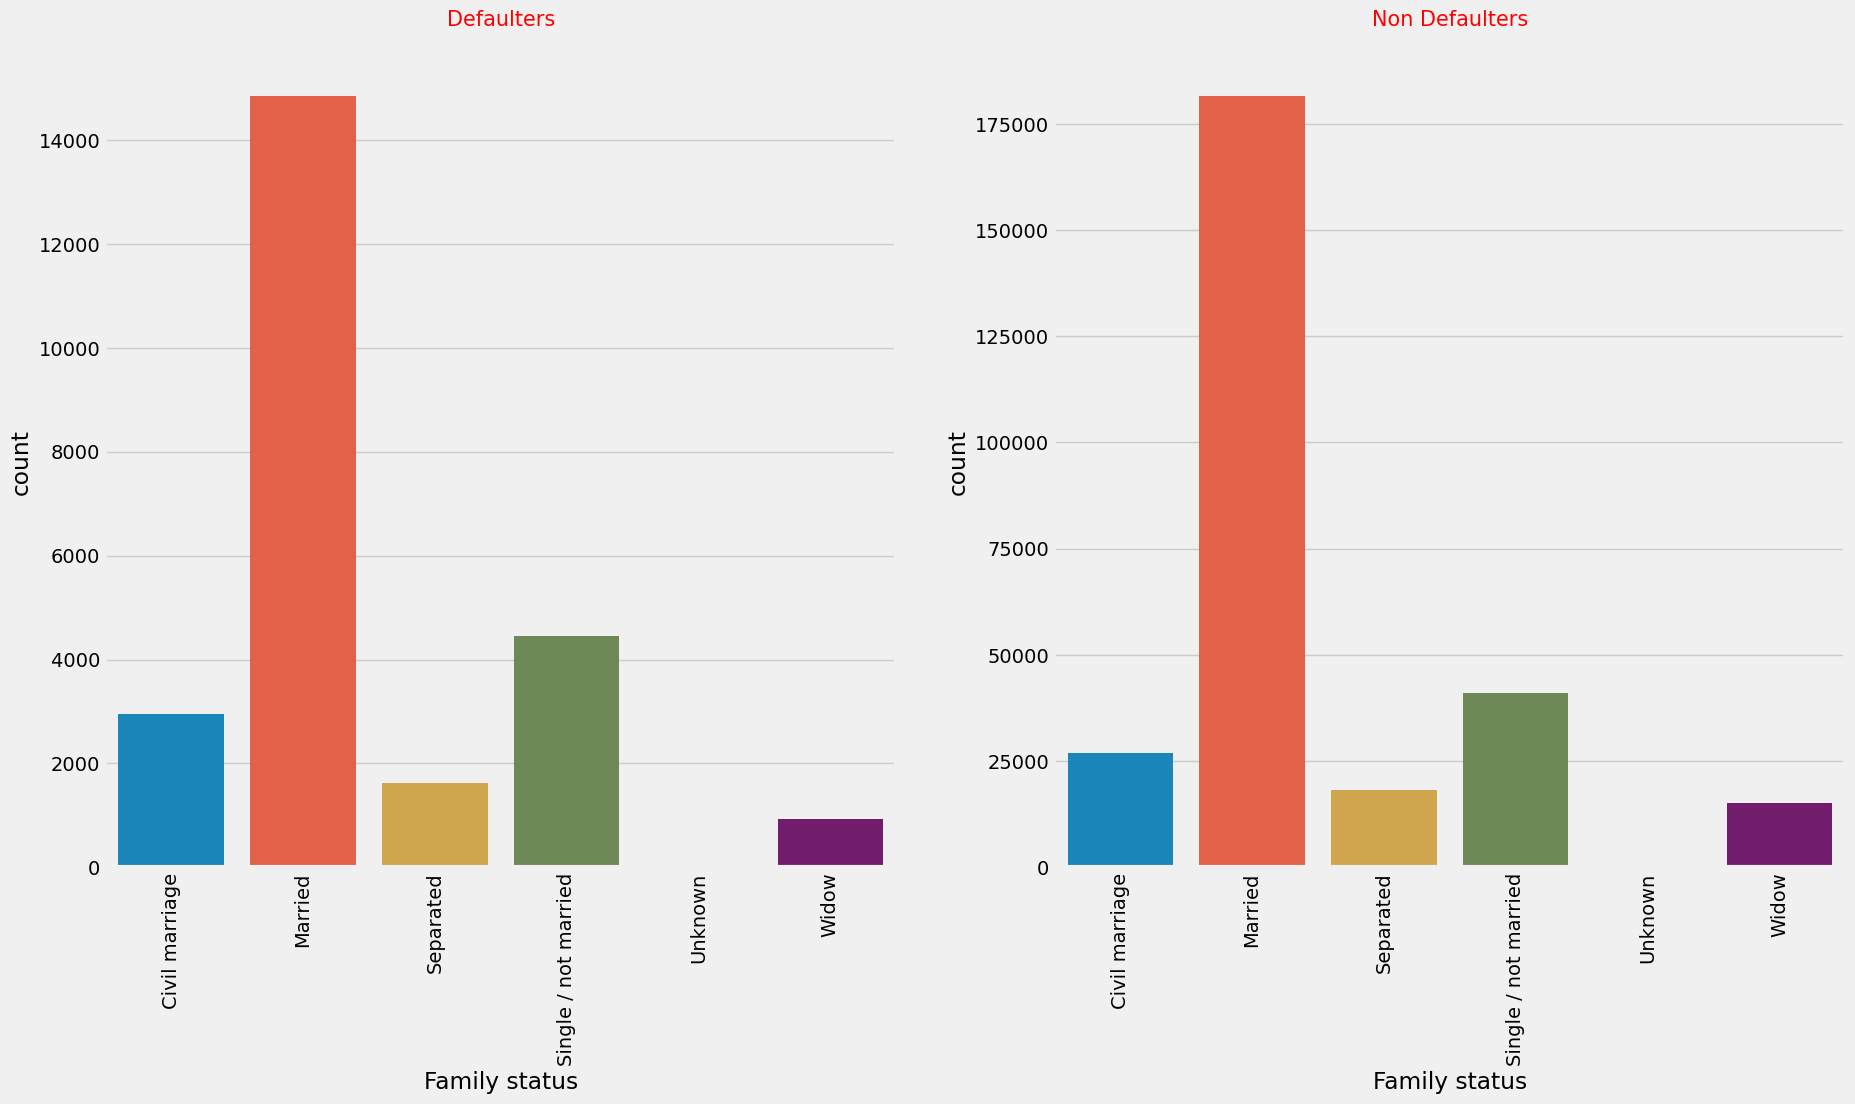

In [206]:
# Analyzing how repayment of loan is affected by family status

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['NAME_FAMILY_STATUS'])
plt.title('Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Family status")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['NAME_FAMILY_STATUS'])
plt.title('Non Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Family status")
plt.xticks(rotation=90)

plt.show()

In [ ]:
Both cases seem to follow the same pattern where most applicants are married.

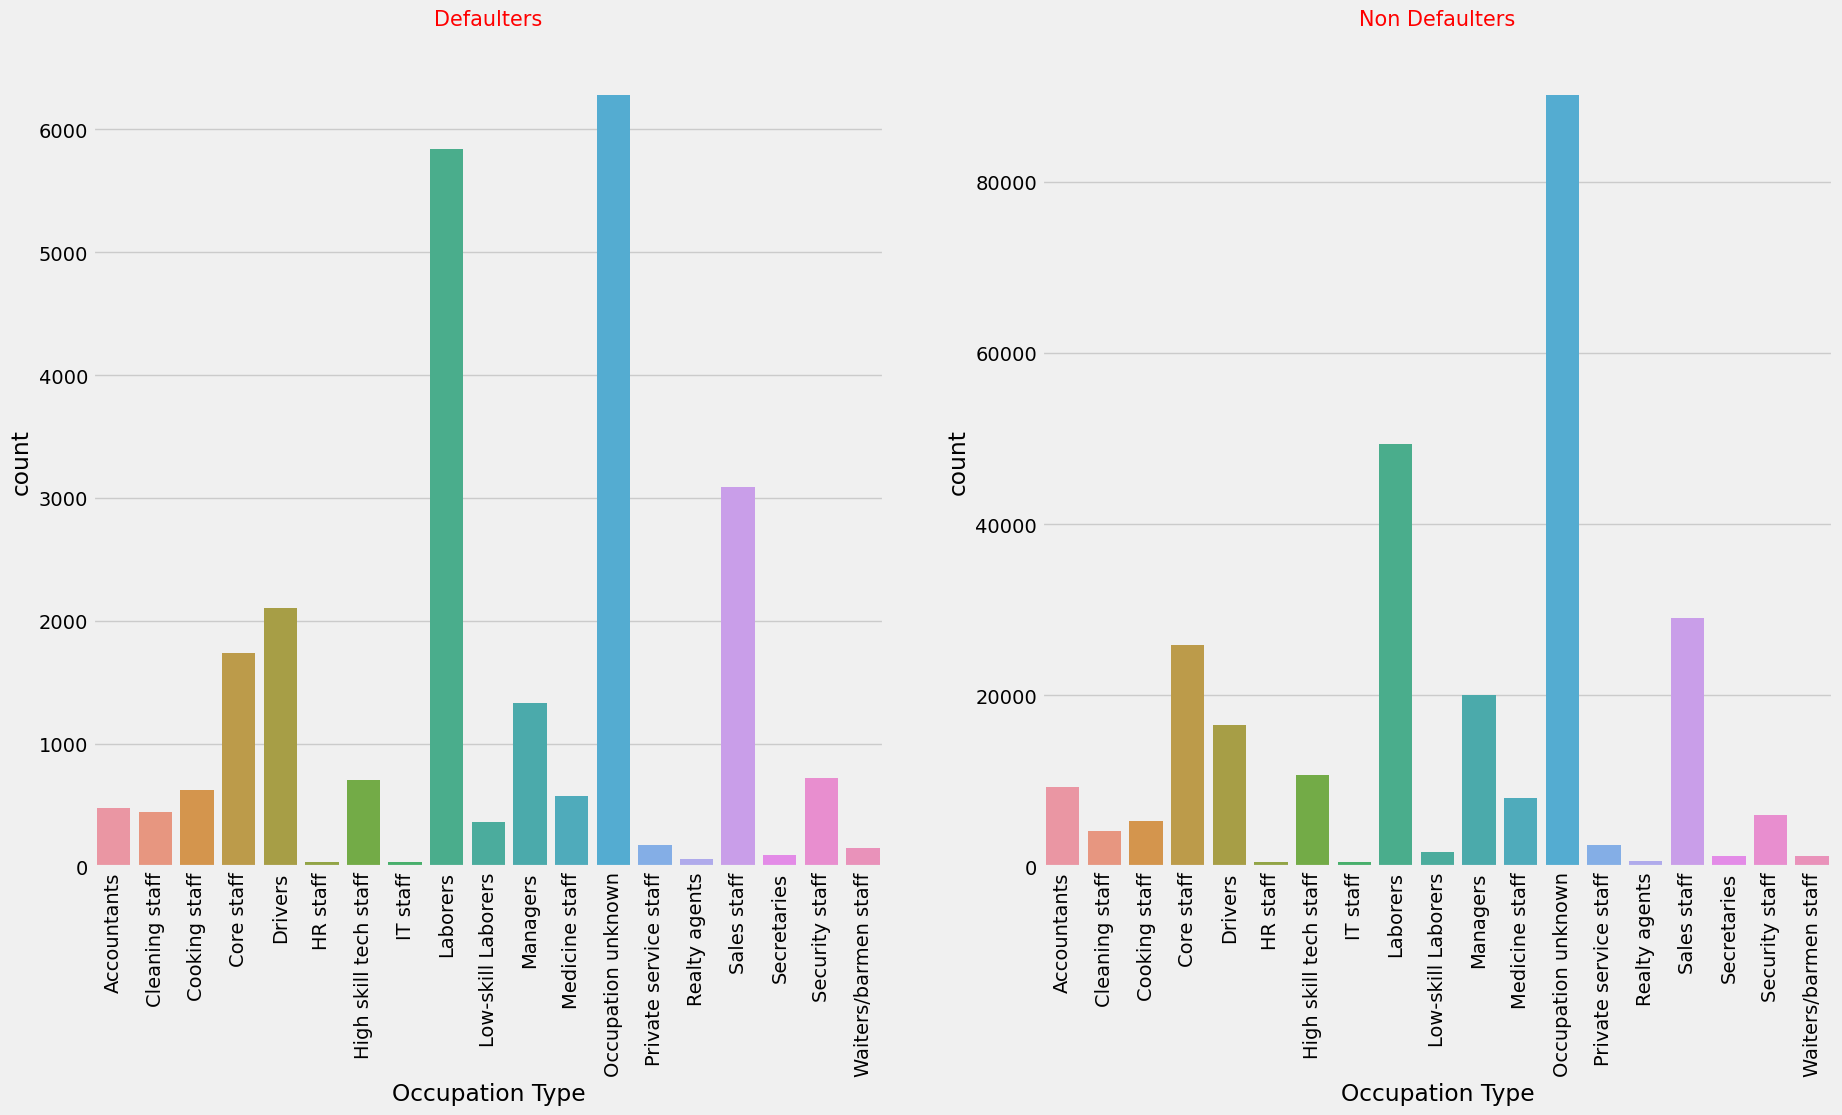

In [207]:
# Analyzing how repayment of loan is affected by occupation type

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['OCCUPATION_TYPE'])
plt.title('Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Occupation Type")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['OCCUPATION_TYPE'])
plt.title('Non Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Occupation Type")
plt.xticks(rotation=90)

plt.show()

In both defaulters and Non defaulters the occupation is unknown for a huge percentage of applicants.
For the applicants who have mentioned their occupation, we find that Laborers are most likely to default followed by Sales staff.

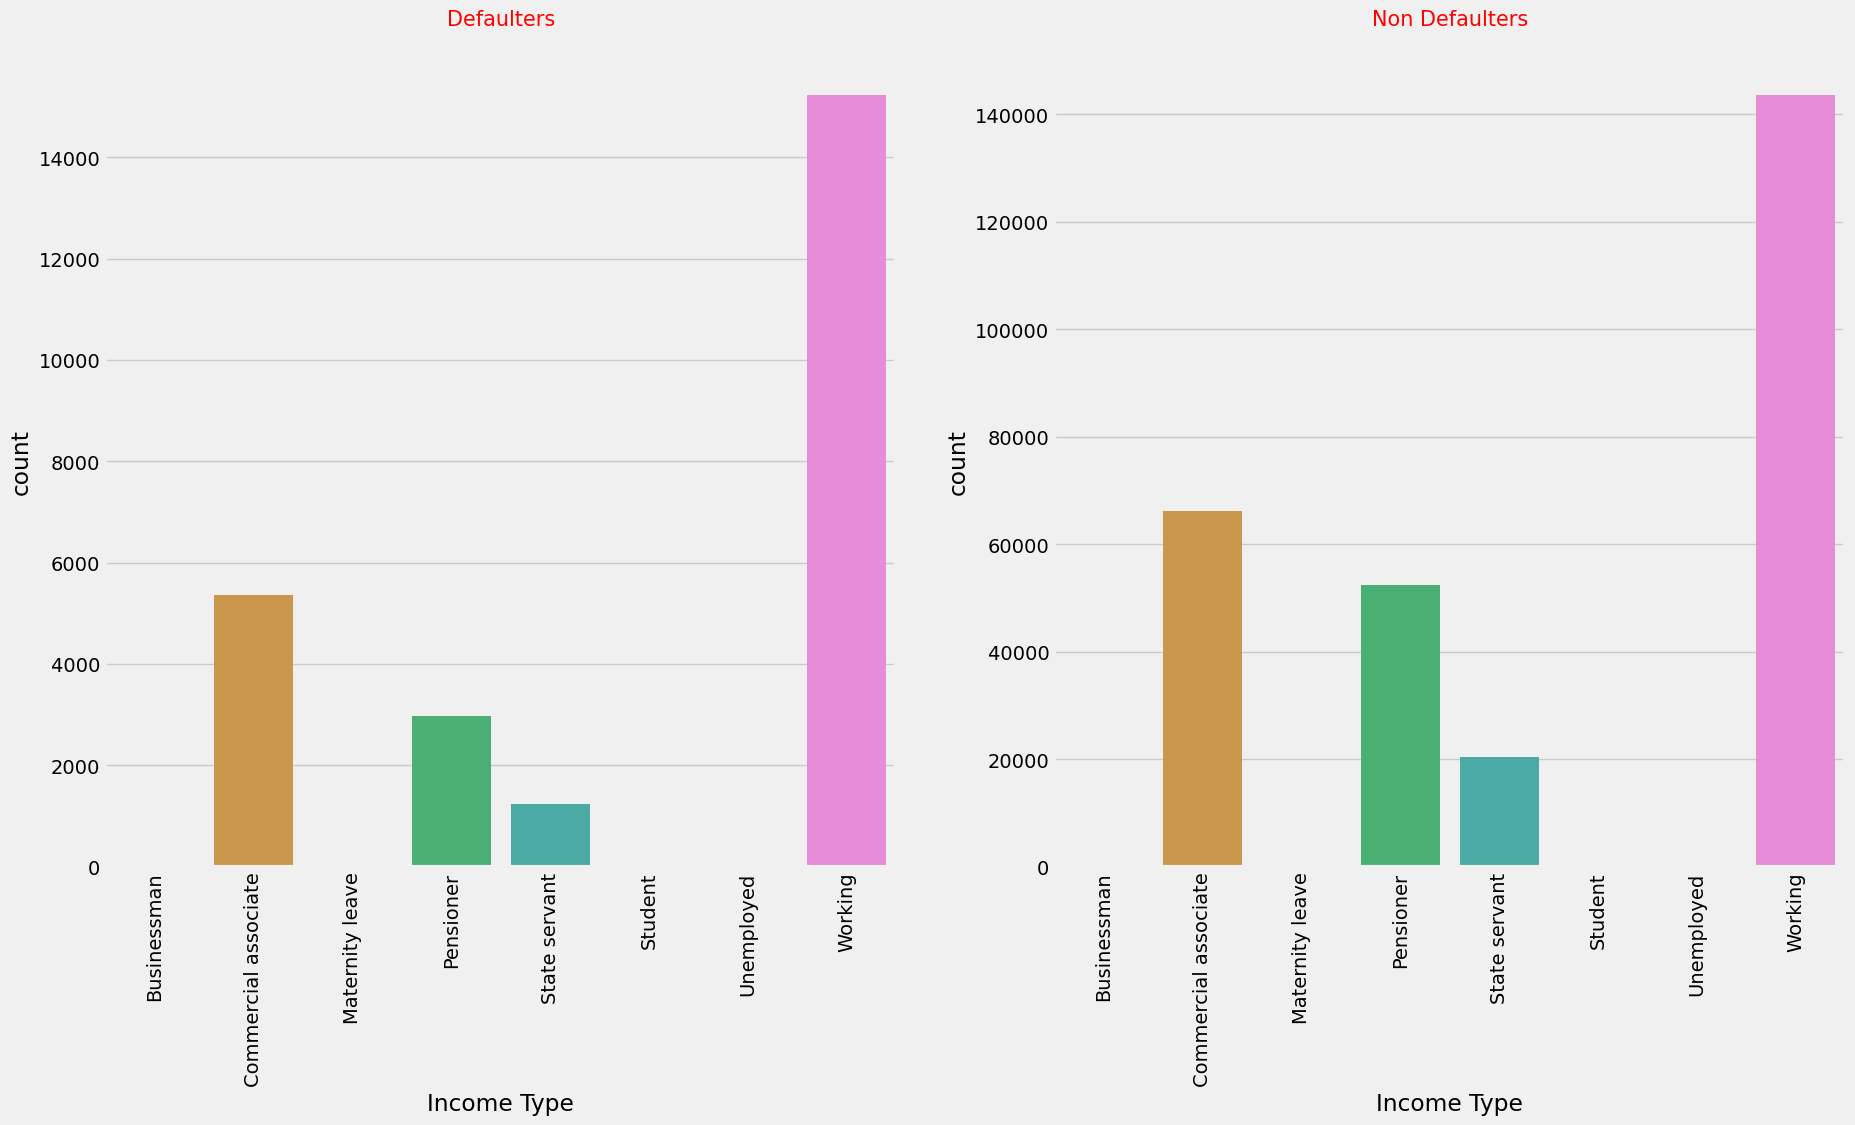

In [208]:
# Analyzing how repayment of loan is affected by income type

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['NAME_INCOME_TYPE'])
plt.title('Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Income Type")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['NAME_INCOME_TYPE'])
plt.title('Non Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Income Type")
plt.xticks(rotation=90)

plt.show()

Both cases seem to follow the same pattern where most applicants who are working have higher count in both defaulters and repayers list.

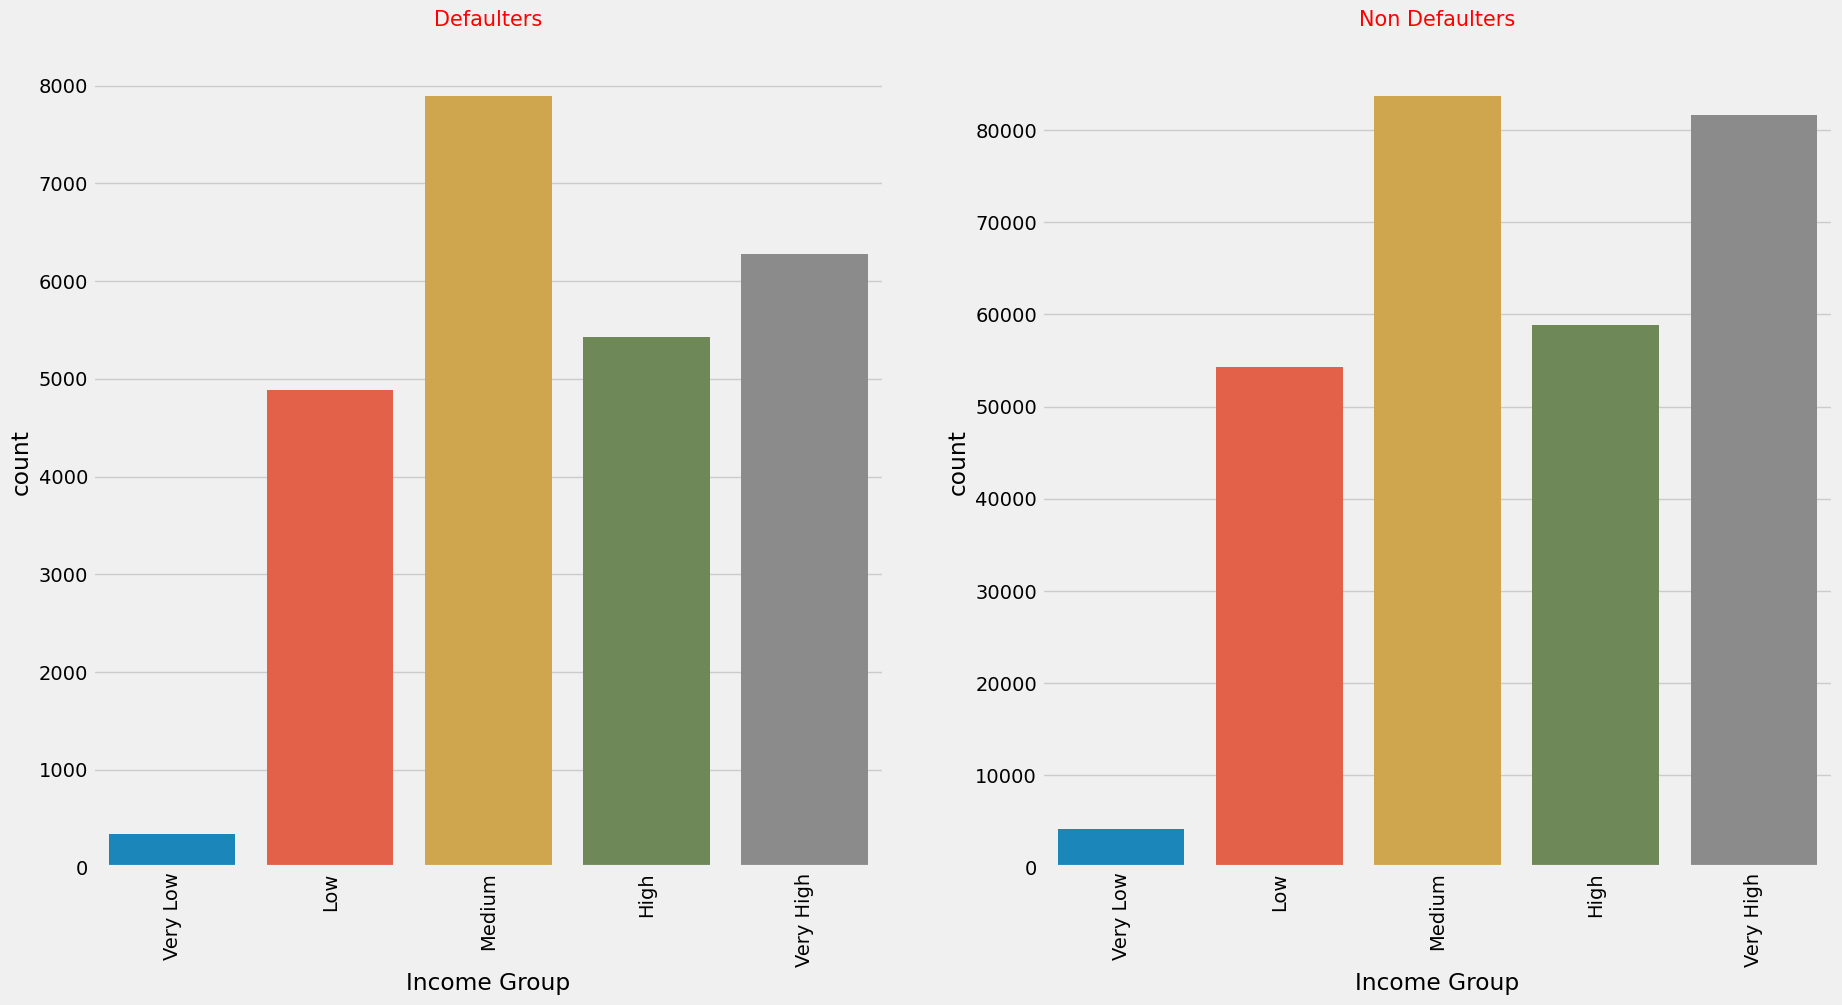

In [209]:
# Analyzing how repayment of loan is affected by income group

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['AMT_INCOME_GROUP'])
plt.title('Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Income Group")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['AMT_INCOME_GROUP'])
plt.title('Non Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Income Group")
plt.xticks(rotation=90)

plt.show()

We find that applicants in the Medium income group are the most to default than the applicants with very low income.

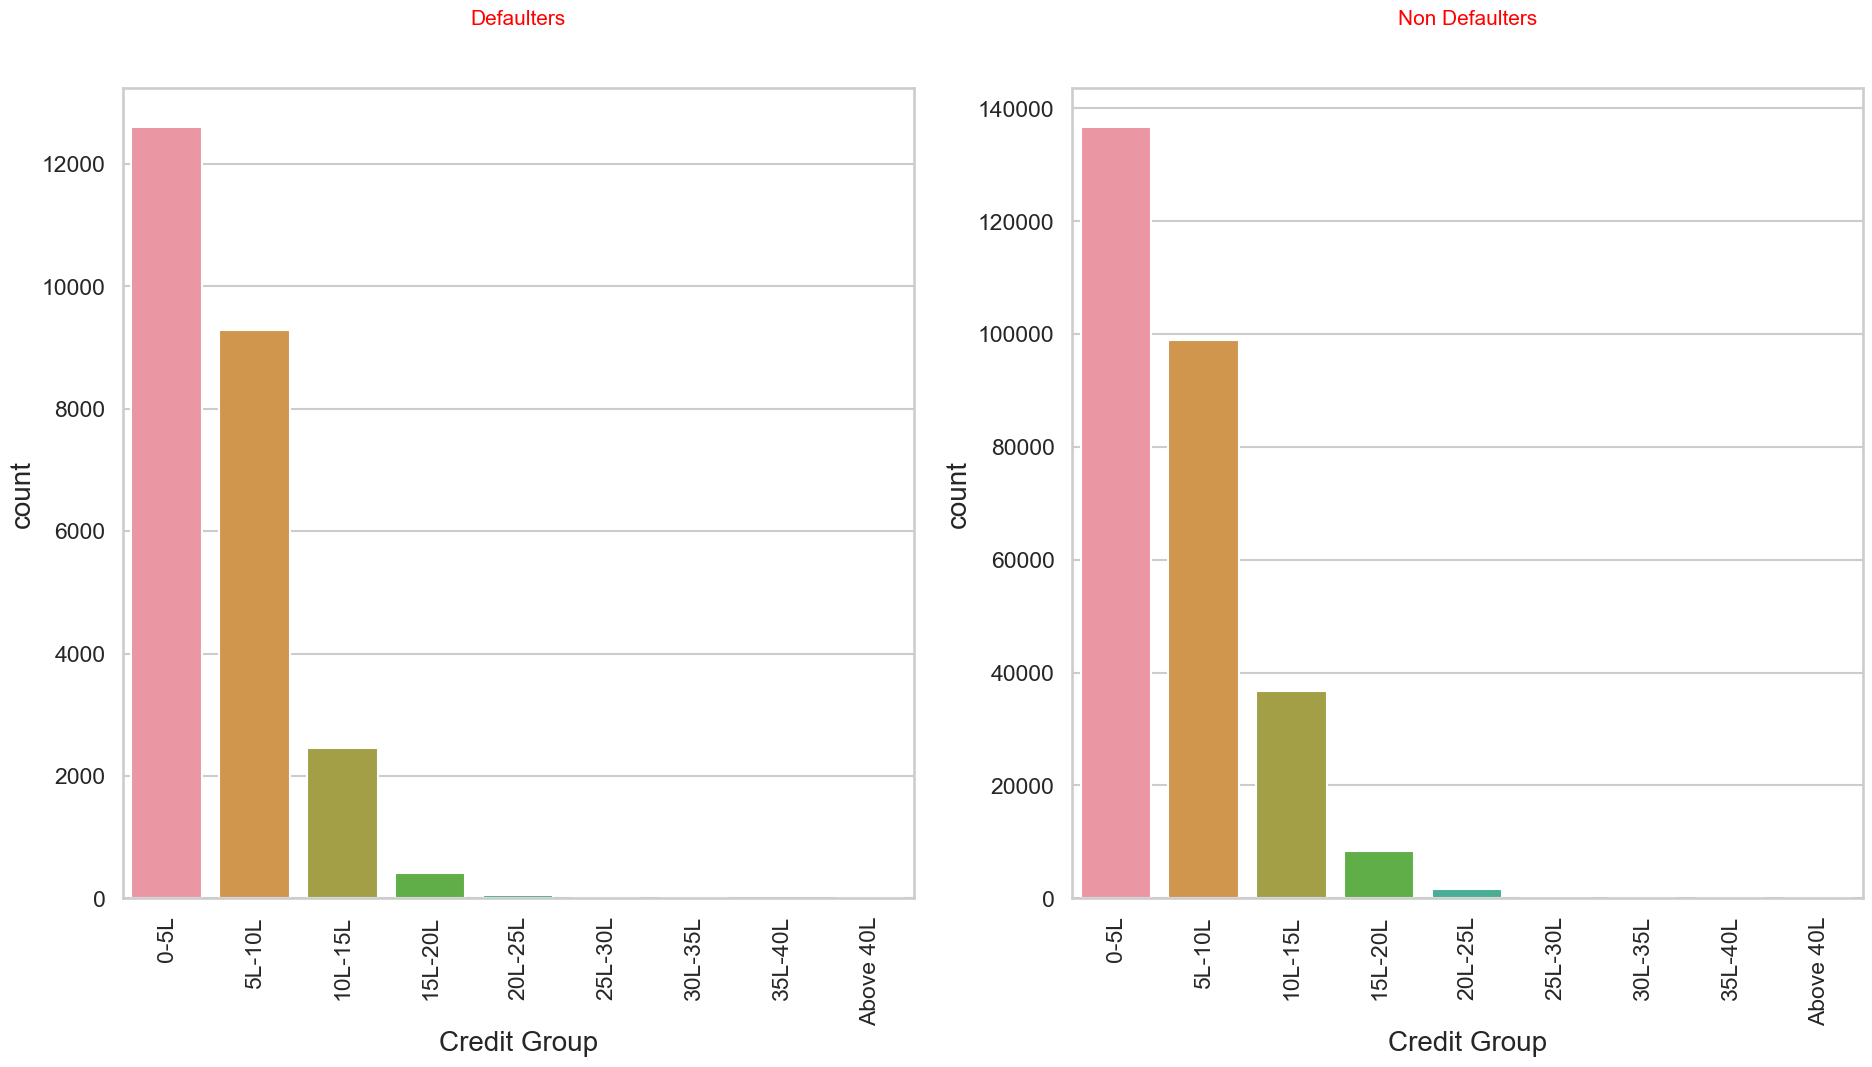

In [388]:
# Analyzing how repayment of loan is affected by credit amount group

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['AMT_CREDIT_RANGE'])
plt.title('Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Credit Group")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['AMT_CREDIT_RANGE'])
plt.title('Non Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Credit Group")
plt.xticks(rotation=90)

plt.show()

Applicants with credit amount 0-5 lakhs are the most to default.

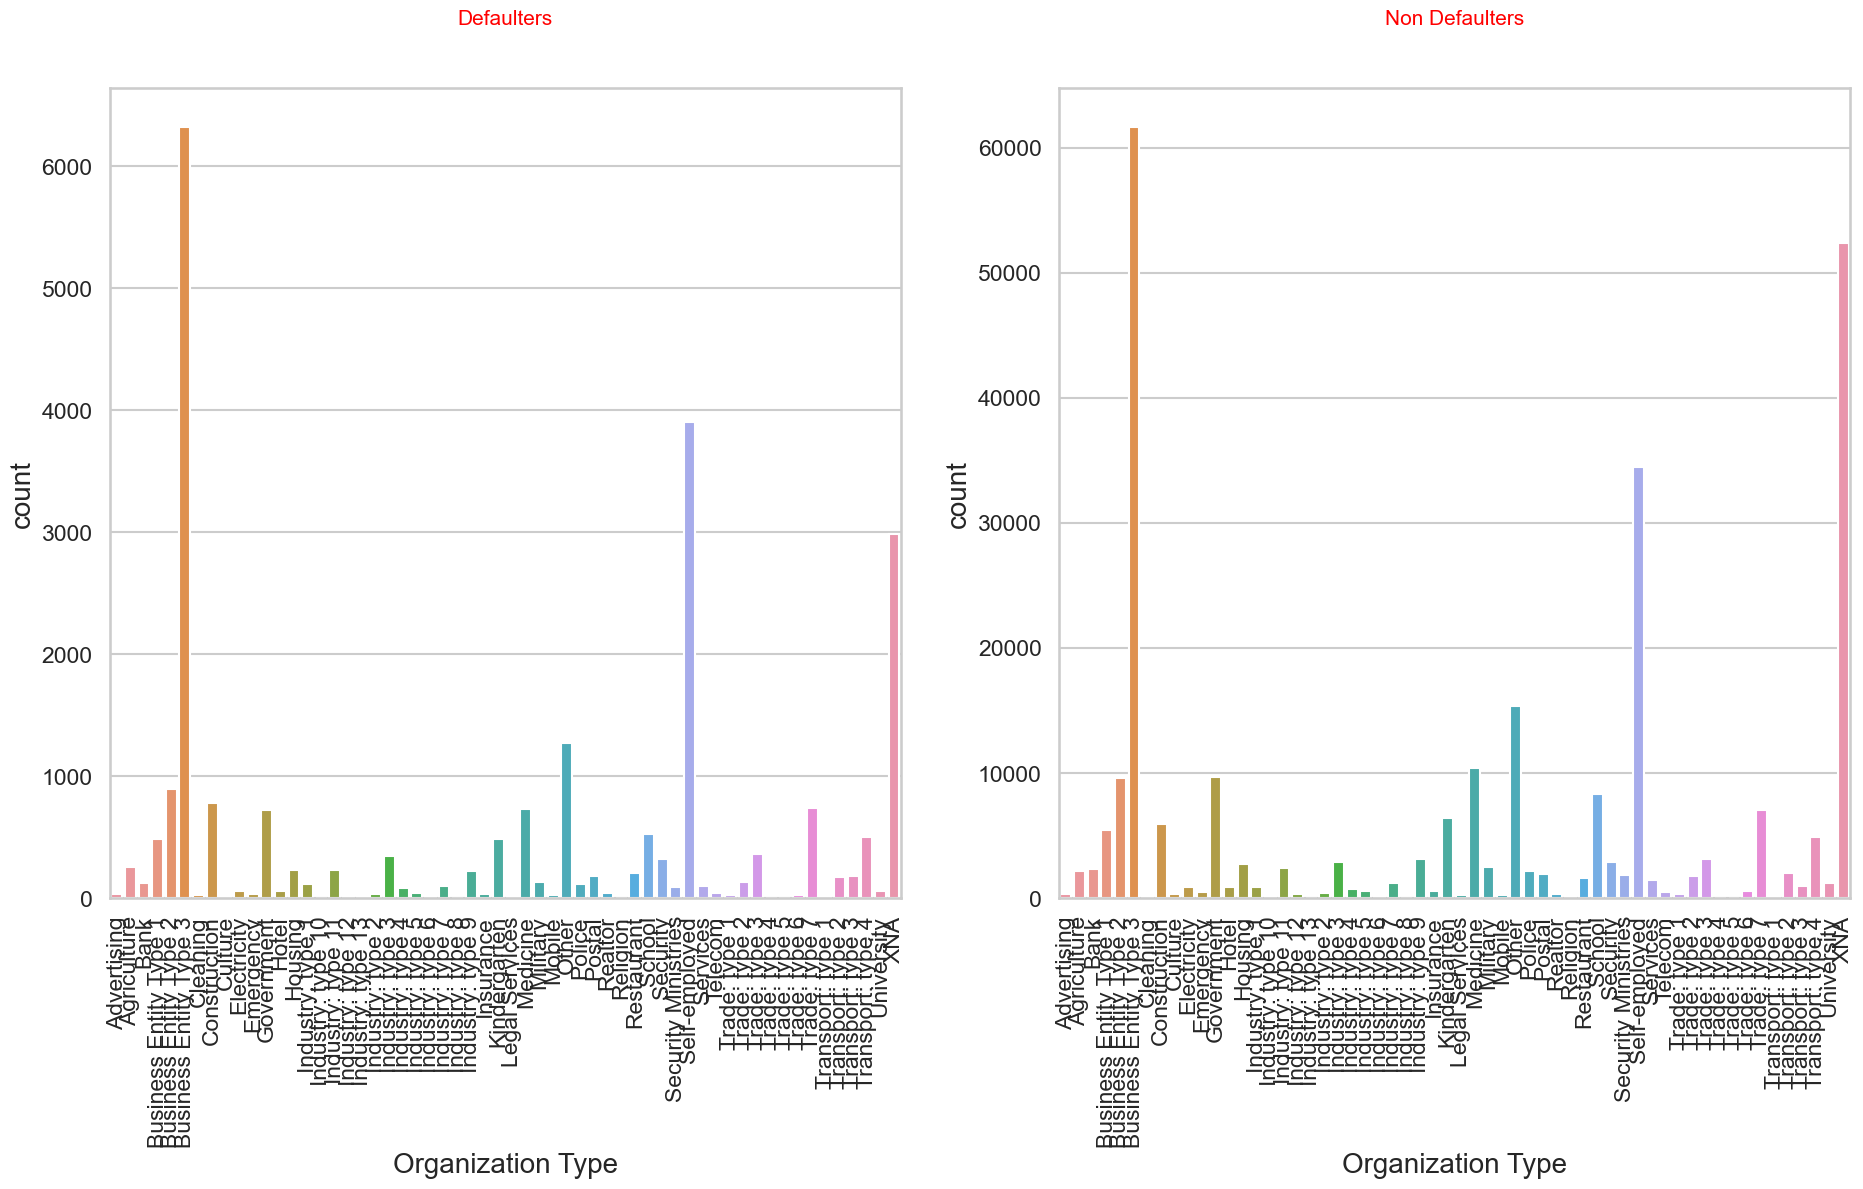

In [390]:
# Analyzing how repayment of loan is affected by organization type

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['ORGANIZATION_TYPE'])
plt.title('Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Organization Type")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['ORGANIZATION_TYPE'])
plt.title('Non Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Organization Type")
plt.xticks(rotation=90)


plt.show()

We find that applicants who are most likely to default are those who work in Business_Entity_Type 3 follwed by those who are self-employed.

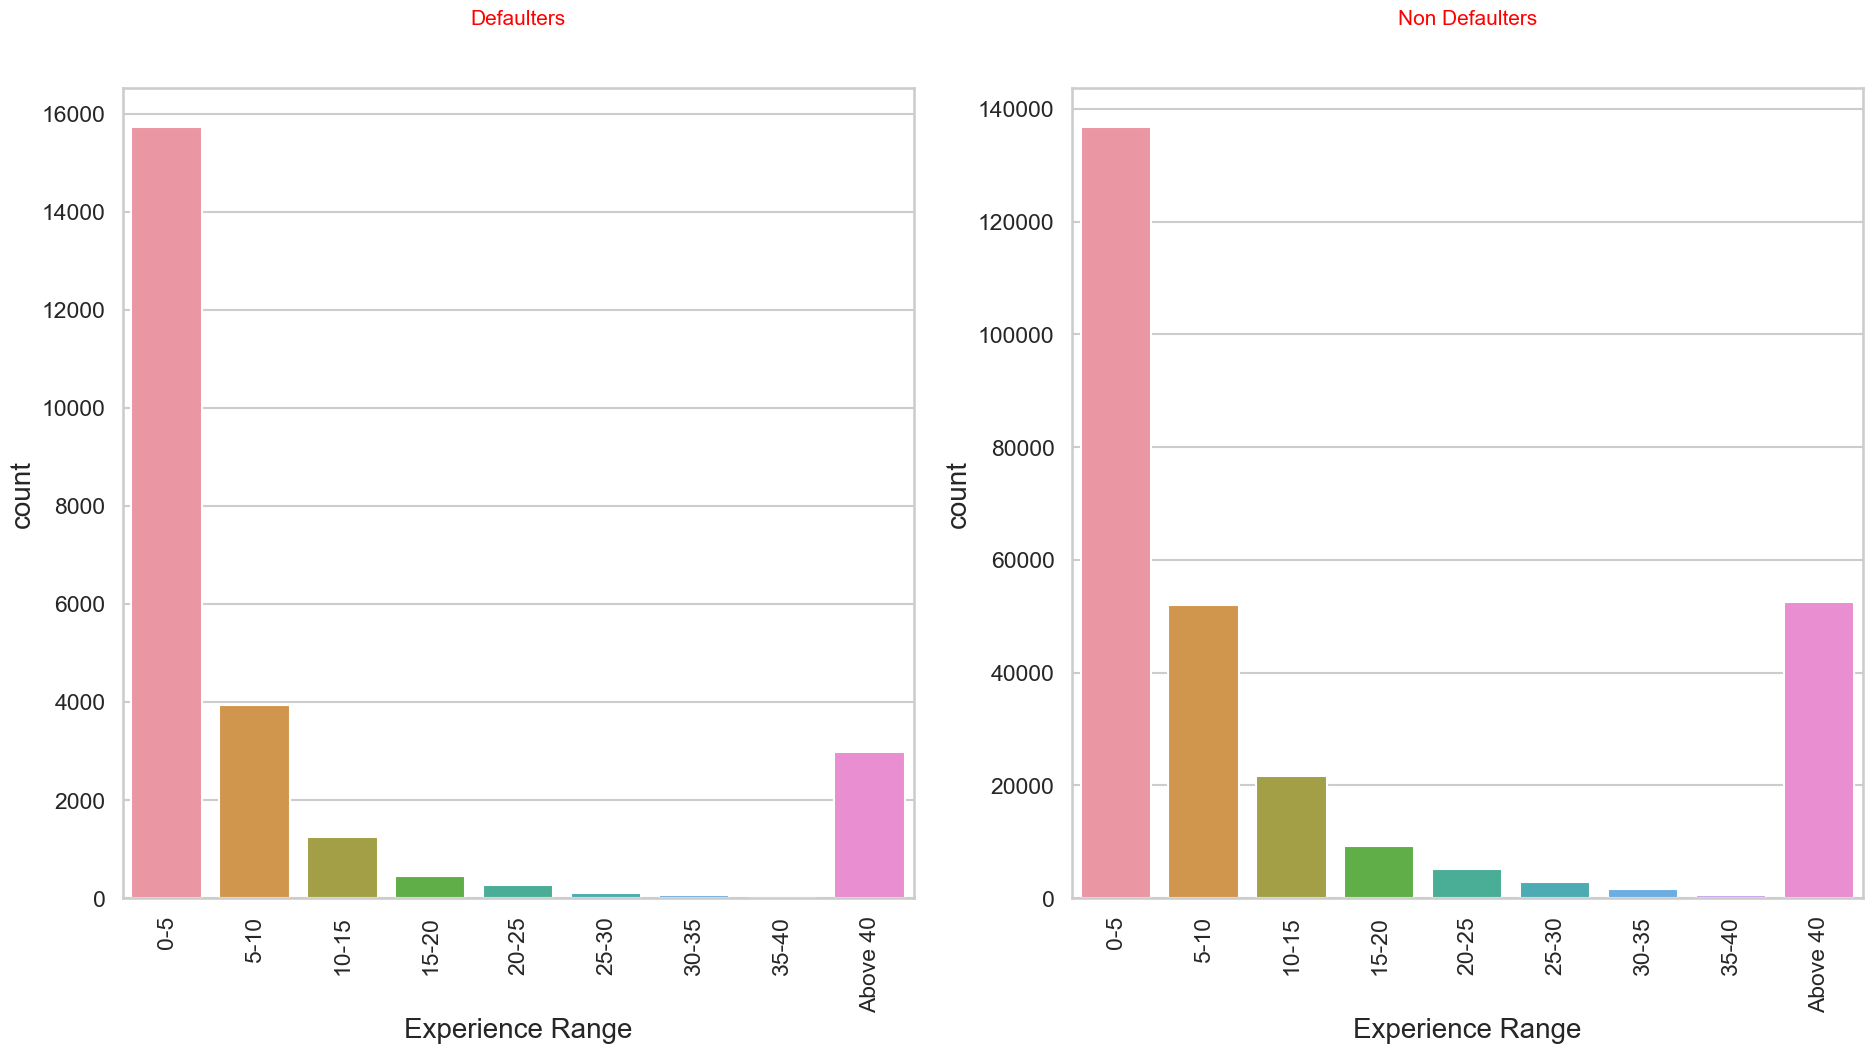

In [387]:
# Analyzing how repayment of loan is affected by Experience Range

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['Experience_Range'])
plt.title('Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Experience Range")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['Experience_Range'])
plt.title('Non Defaulters\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Experience Range")
plt.xticks(rotation=90)


plt.show()

Applicants who have less work experience in the range 0-5 years default more than applicants with more experience.

## Univariate Analysis on numerical variables

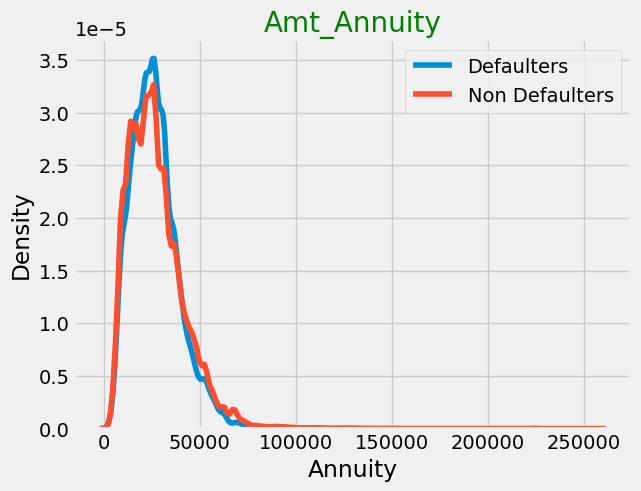

In [230]:
    # Analyzing AMT_ANNUITY
    sns.distplot(had_difficulties['AMT_ANNUITY'] , hist=False, label='Defaulters')
    sns.distplot(had_no_difficulties['AMT_ANNUITY'] , hist=False, label='Non Defaulters')
    plt.title("Amt_Annuity", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    plt.xlabel("Annuity")
    plt.legend()
    plt.show()

Majority of applicants annuity amount is below 50000 

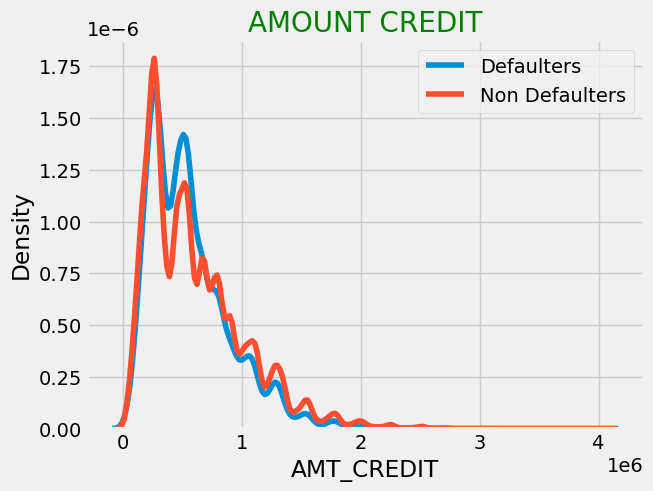

In [237]:
    # Analyzing AMT_CREDIT
    sns.distplot(had_difficulties['AMT_CREDIT'] , hist=False, label='Defaulters')
    sns.distplot(had_no_difficulties['AMT_CREDIT'] , hist=False, label='Non Defaulters')
    plt.title("AMOUNT CREDIT", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    plt.xlabel("AMT_CREDIT")
    plt.legend()
    plt.show()

We can see that the value for defaulters reach its peak with lesser credit amount.

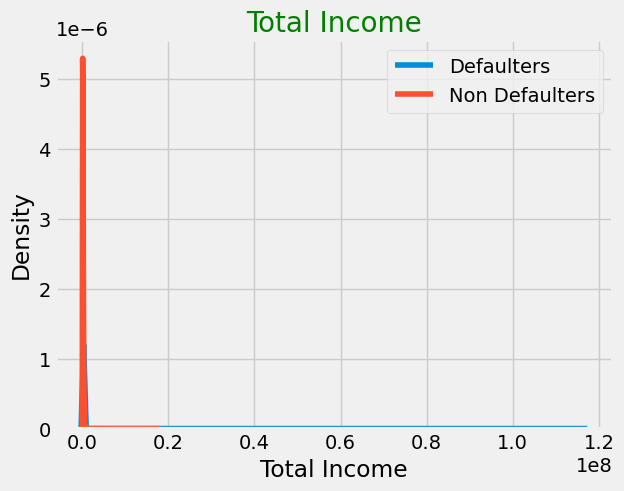

In [238]:
    # Analyzing AMT_INCOME_TOTAL
    sns.distplot(had_difficulties['AMT_INCOME_TOTAL'] , hist=False, label='Defaulters')
    sns.distplot(had_no_difficulties['AMT_INCOME_TOTAL'] , hist=False, label='Non Defaulters')
    plt.title("Total Income", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    plt.xlabel("Total Income")
    plt.legend()
    plt.show()

Most of the applicants are in the low income range.

## Correlation

In [401]:
# Finding the top 10 correlation variables for defaulters

temp_had_difficulties=had_difficulties.drop(['YEARS_EMPLOYED','AGE'],axis=1)# since YEARS_EMPLOYED is same as DAYS_EMPLOYED and AGE is same as DAYS_BIRTH 
corr_def=temp_had_difficulties.corr()
corr_def_df = corr_def.where(np.triu(np.ones(corr_def.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_def_df.columns=['Col1','Col2','Corr_Value']
corr_def_df.dropna(subset=['Corr_Value'],inplace=True)
corr_def_df['Corr_Value'] = abs(corr_def_df['Corr_Value'])
corr_def_df = round(corr_def_df.sort_values(by=['Corr_Value'], ascending=False),2)
corr_def_df.head(10)

Col1                      Col2  Corr_Value
414  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE        1.00
128           AMT_GOODS_PRICE                AMT_CREDIT        0.98
276           CNT_FAM_MEMBERS              CNT_CHILDREN        0.89
440  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE        0.87
129           AMT_GOODS_PRICE               AMT_ANNUITY        0.75
103               AMT_ANNUITY                AMT_CREDIT        0.75
207             DAYS_EMPLOYED                DAYS_BIRTH        0.58
415  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE        0.34
389  DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE        0.33
232         DAYS_REGISTRATION                DAYS_BIRTH        0.29

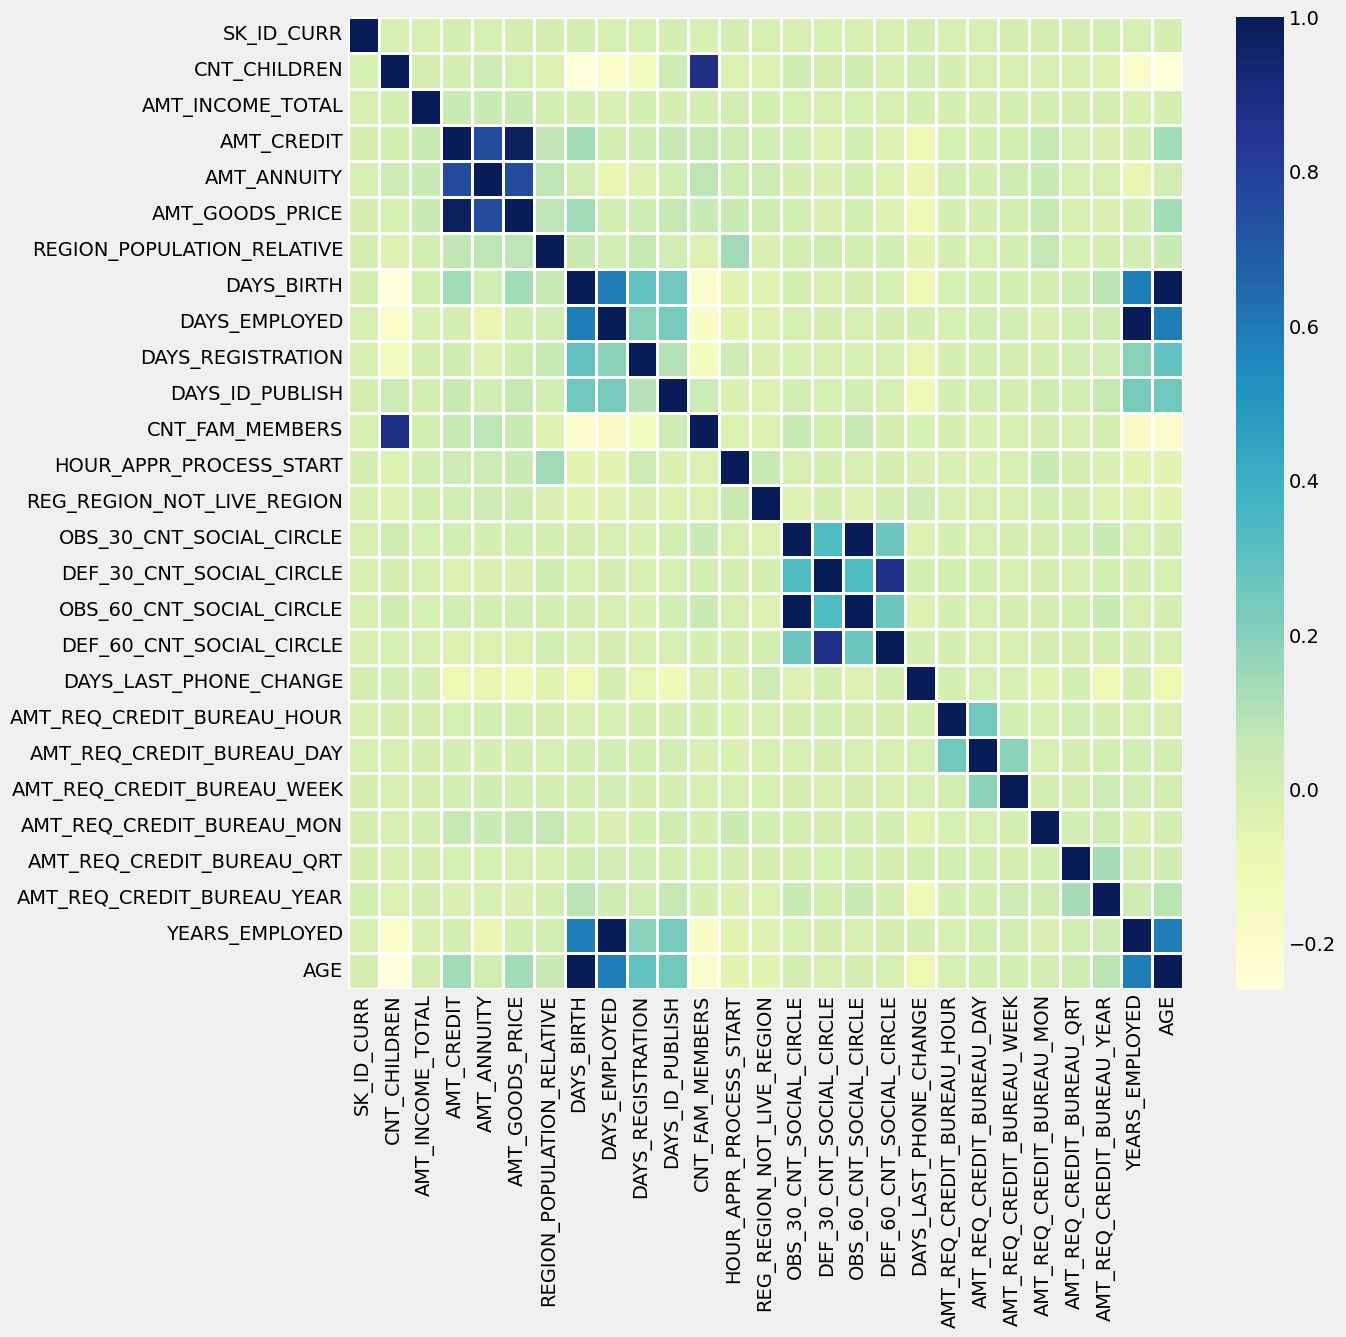

In [246]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(had_difficulties.corr(), cmap="YlGnBu",annot=False,linewidth =1)

In [402]:
# Finding the top 10 correlation variables for non defaulters

temp_had_no_difficulties=had_no_difficulties.drop(['YEARS_EMPLOYED','AGE'],axis=1)# since YEARS_EMPLOYED is same as DAYS_EMPLOYED and AGE is same as DAYS_BIRTH 
corr_def=temp_had_no_difficulties.corr()
corr_def_df = corr_def.where(np.triu(np.ones(corr_def.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_def_df.columns=['Col1','Col2','Corr_Value']
corr_def_df.dropna(subset=['Corr_Value'],inplace=True)
corr_def_df['Corr_Value'] = abs(corr_def_df['Corr_Value'])
corr_def_df = round(corr_def_df.sort_values(by=['Corr_Value'], ascending=False),2)
corr_def_df.head(10)

Col1                      Col2  Corr_Value
414  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE        1.00
128           AMT_GOODS_PRICE                AMT_CREDIT        0.99
276           CNT_FAM_MEMBERS              CNT_CHILDREN        0.88
440  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE        0.86
129           AMT_GOODS_PRICE               AMT_ANNUITY        0.78
103               AMT_ANNUITY                AMT_CREDIT        0.77
207             DAYS_EMPLOYED                DAYS_BIRTH        0.63
102               AMT_ANNUITY          AMT_INCOME_TOTAL        0.42
127           AMT_GOODS_PRICE          AMT_INCOME_TOTAL        0.35
77                 AMT_CREDIT          AMT_INCOME_TOTAL        0.34

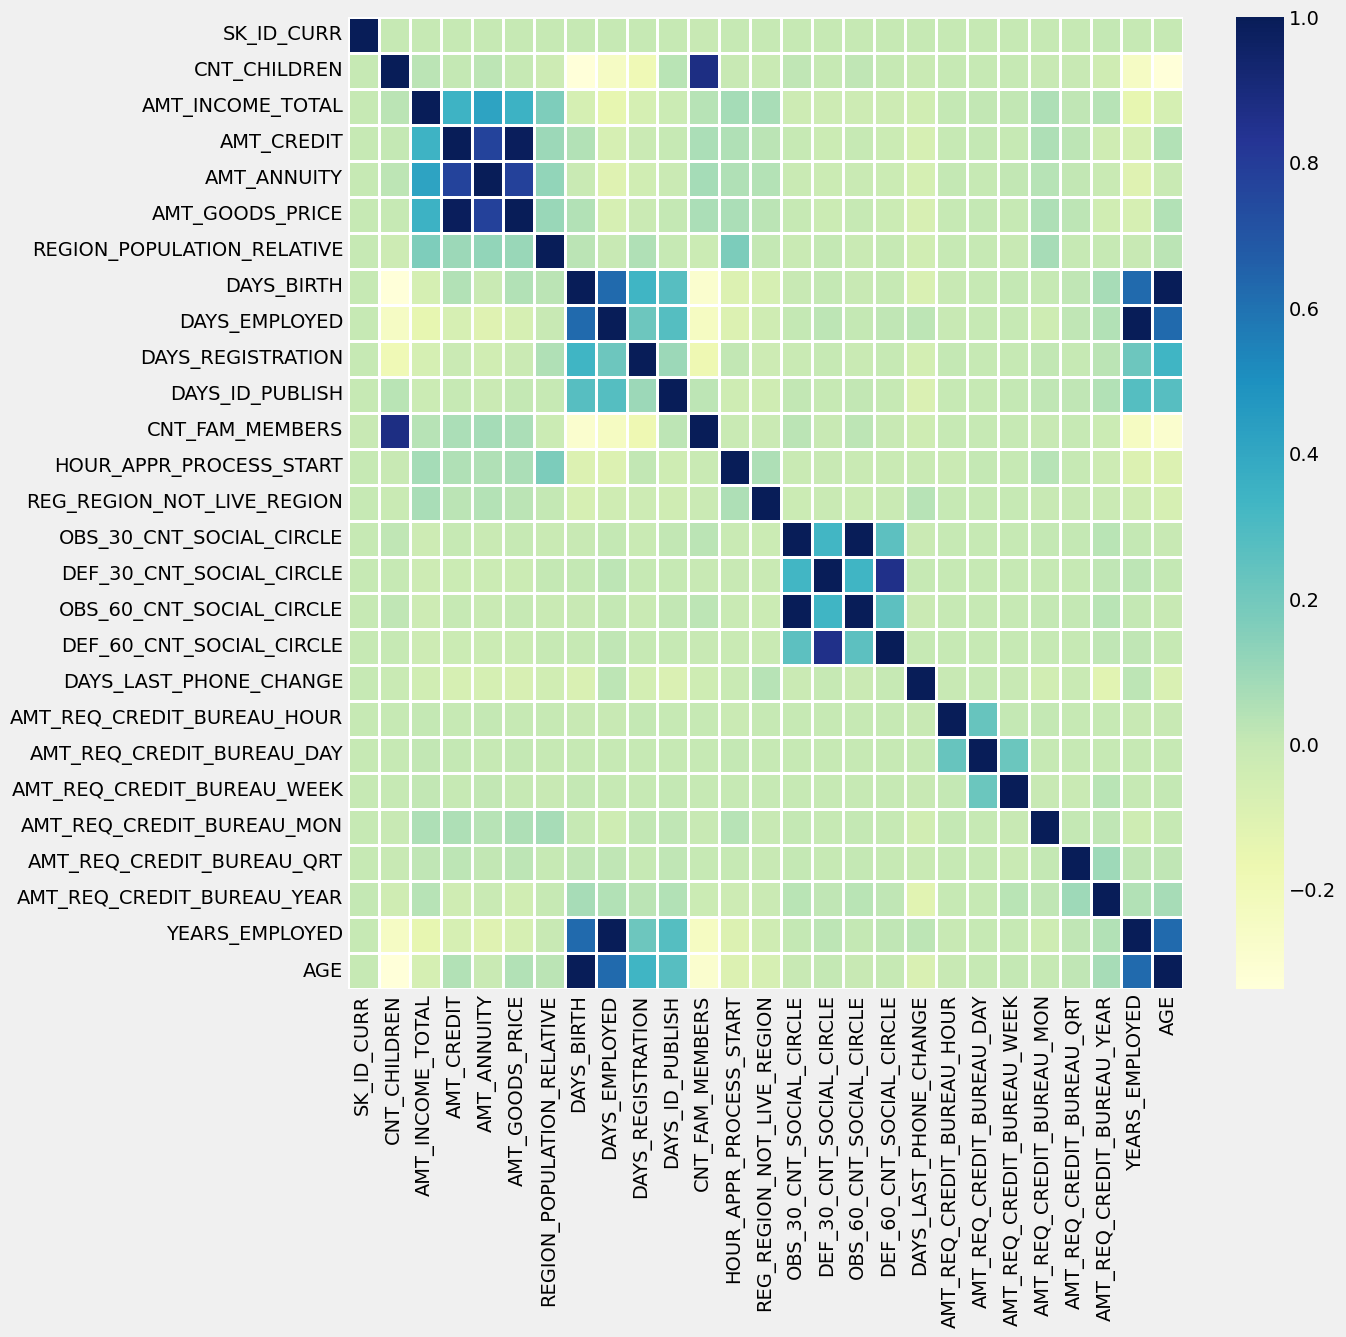

In [248]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(had_no_difficulties.corr(), cmap="YlGnBu",annot=False,linewidth =1)

## Bivariate Analysis

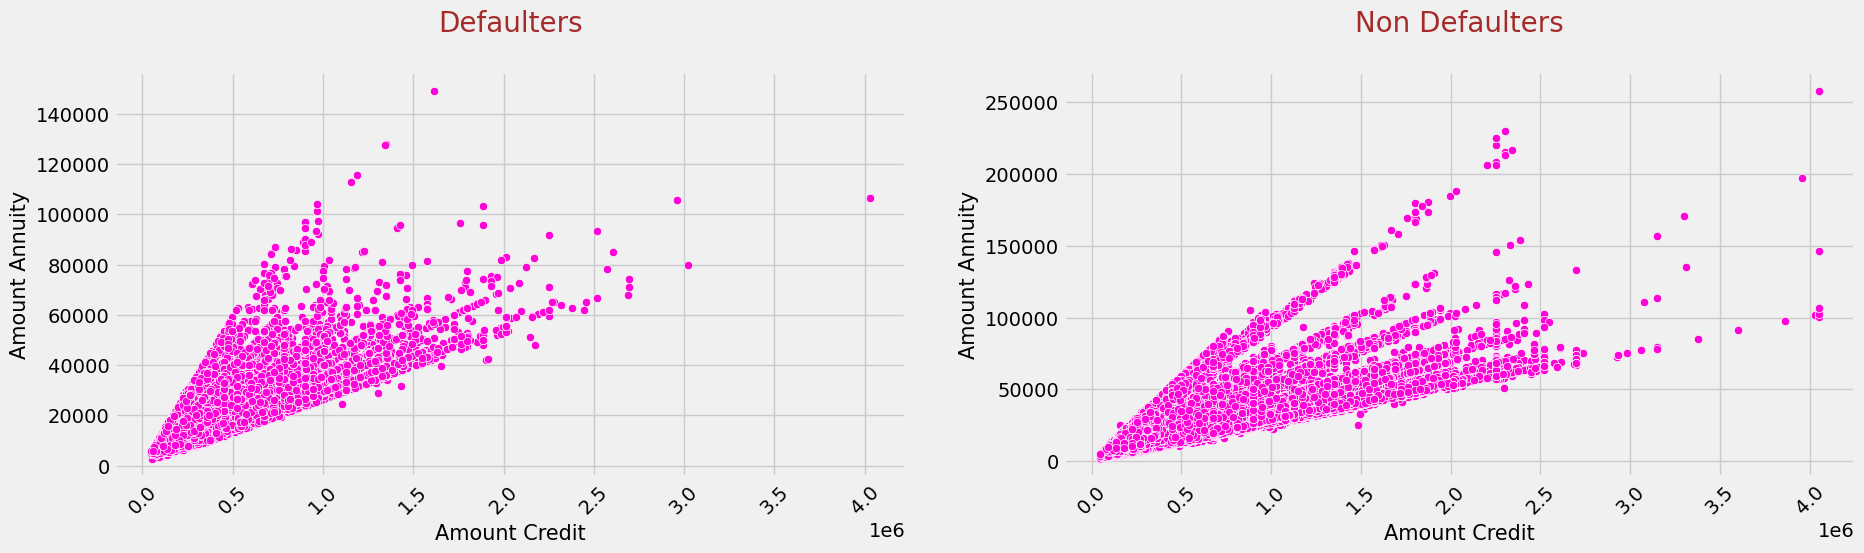

In [254]:
# AMT_CREDIT VS AMT_ANNUITY

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
sns.scatterplot(data=had_difficulties, x='AMT_CREDIT',y='AMT_ANNUITY', color='#fc03d7')
plt.xlabel('Amount Credit', fontsize=15)
plt.ylabel('Amount Annuity', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.scatterplot(data=had_no_difficulties, x='AMT_CREDIT',y='AMT_ANNUITY', color='#fc03d7')
plt.xlabel('Amount Credit', fontsize=15)
plt.ylabel('Amount Annuity', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

Higher the loan amount credited, higher will be the annuity. Therefore AMT_CREDIT and AMT_ANNUITY are positively correlated.

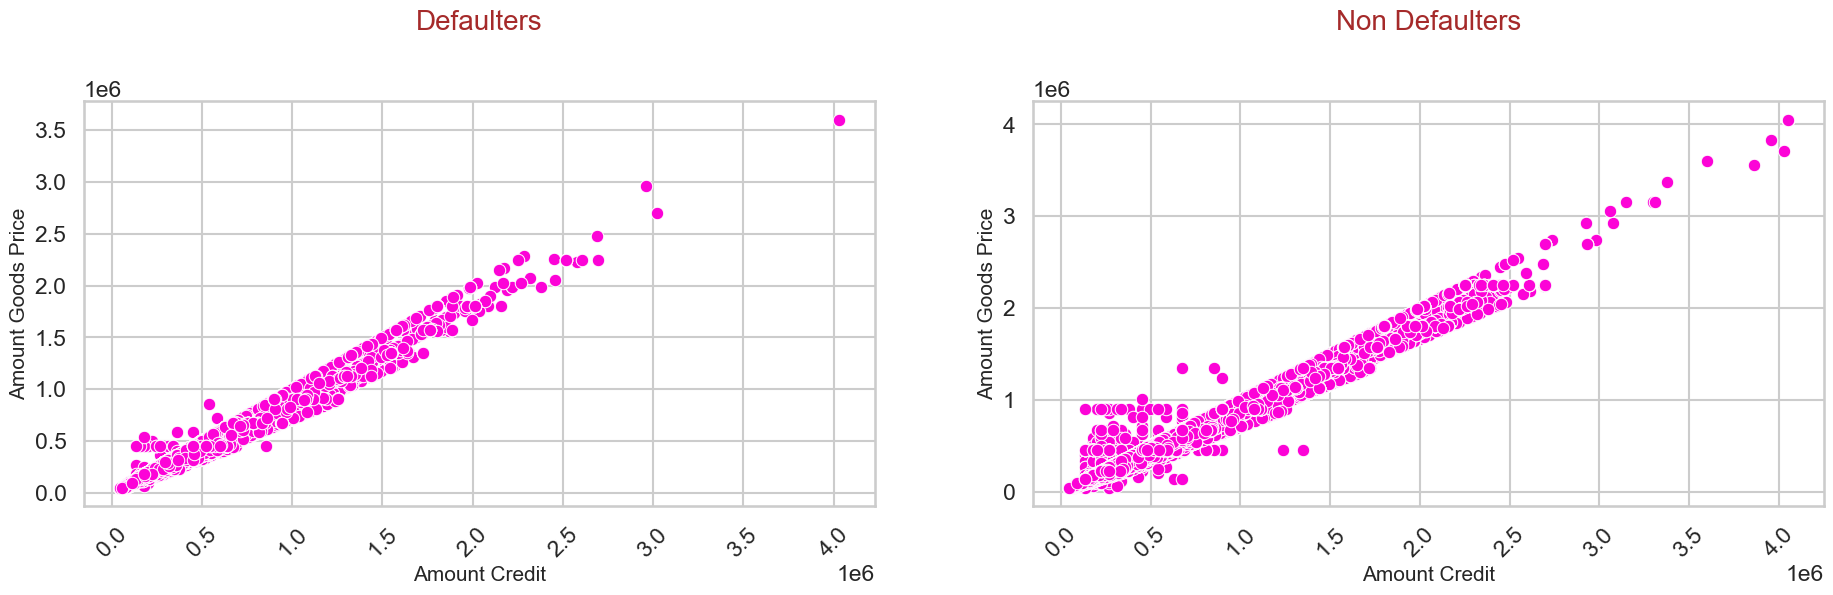

In [413]:
# AMT_CREDIT VS AMT_GOODS_PRICE

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
sns.scatterplot(data=had_difficulties, x='AMT_CREDIT',y='AMT_GOODS_PRICE', color='#fc03d7')
plt.xlabel('Amount Credit', fontsize=15)
plt.ylabel('Amount Goods Price', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.scatterplot(data=had_no_difficulties, x='AMT_CREDIT',y='AMT_GOODS_PRICE', color='#fc03d7')
plt.xlabel('Amount Credit', fontsize=15)
plt.ylabel('Amount Goods Price', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

Higher the price of the goods, higher will be the loan amount. Therefore AMT_CREDIT and AMT_GOODS_PRICE are positively correlated.

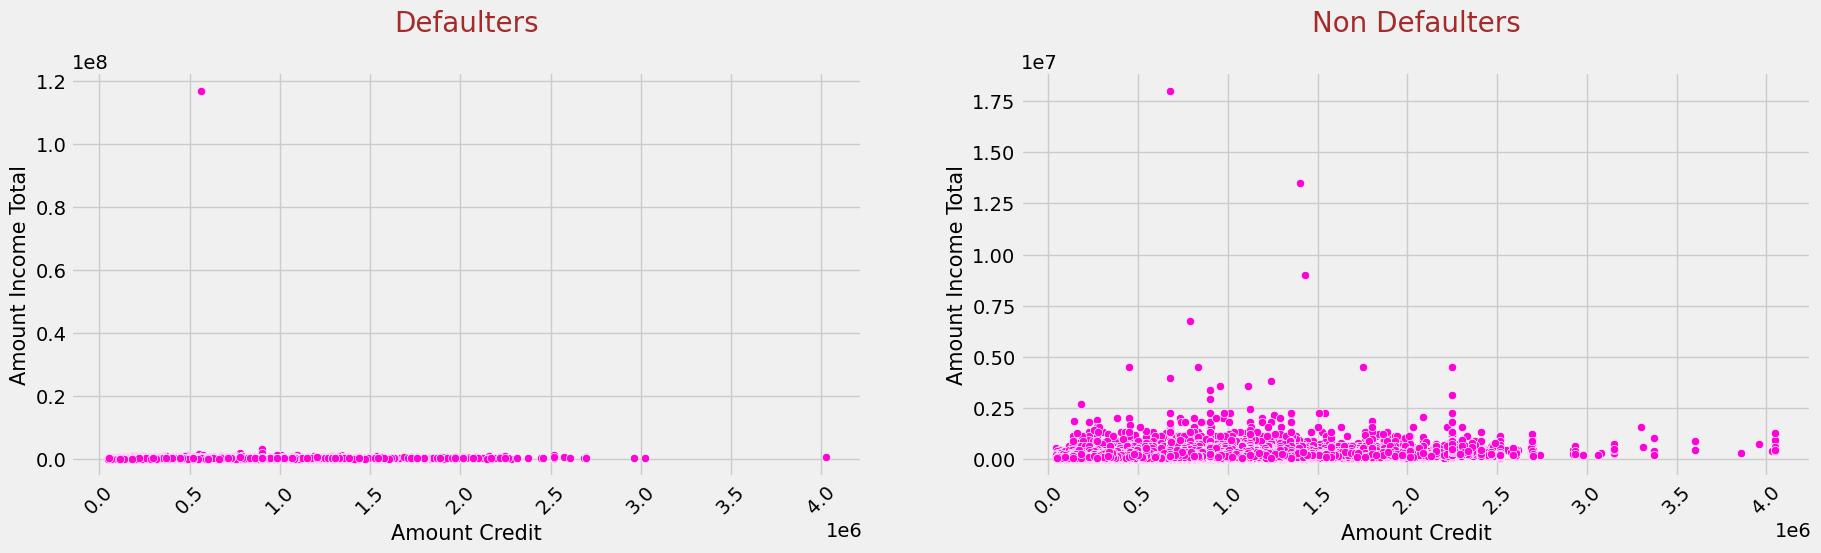

In [255]:
# AMT_CREDIT VS AMT_INCOME_TOTAL

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
sns.scatterplot(data=had_difficulties, x='AMT_CREDIT',y='AMT_INCOME_TOTAL', color='#fc03d7')
plt.xlabel('Amount Credit', fontsize=15)
plt.ylabel('Amount Income Total', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.scatterplot(data=had_no_difficulties, x='AMT_CREDIT',y='AMT_INCOME_TOTAL', color='#fc03d7')
plt.xlabel('Amount Credit', fontsize=15)
plt.ylabel('Amount Income Total', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

From the plot we can see that AMT_CREDIT and AMT_INCOME_TOTAL are not correlated.

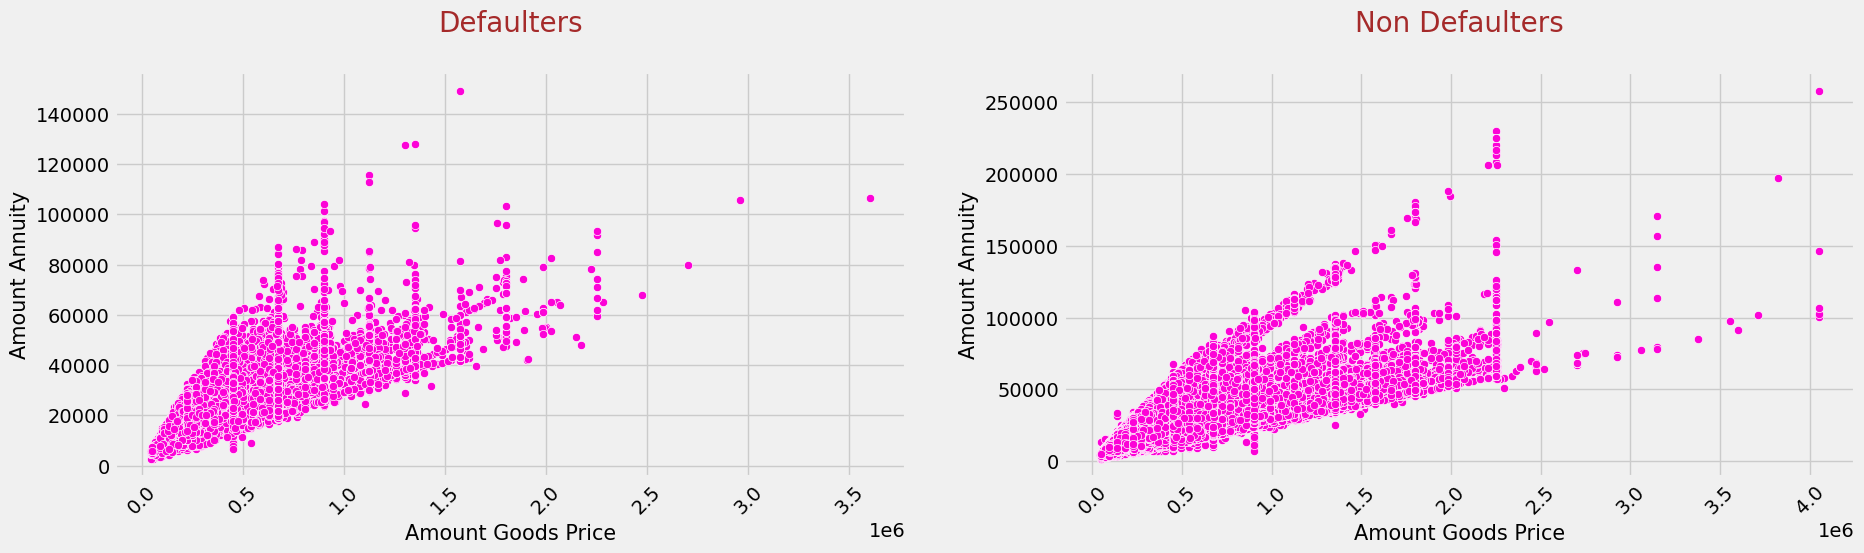

In [257]:
# AMT_GOODS_PRICE VS AMT_ANNUITY

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
sns.scatterplot(data=had_difficulties, x='AMT_GOODS_PRICE',y='AMT_ANNUITY', color='#fc03d7')
plt.xlabel('Amount Goods Price', fontsize=15)
plt.ylabel('Amount Annuity', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.scatterplot(data=had_no_difficulties, x='AMT_GOODS_PRICE',y='AMT_ANNUITY', color='#fc03d7')
plt.xlabel('Amount Goods Price', fontsize=15)
plt.ylabel('Amount Annuity', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

As we saw before as the price of the goods increases, the loan amount increases which results in increased annuity. Also from the plot we can see that AMT_GOODS_PRICE and AMT_ANNUITY are correlated.

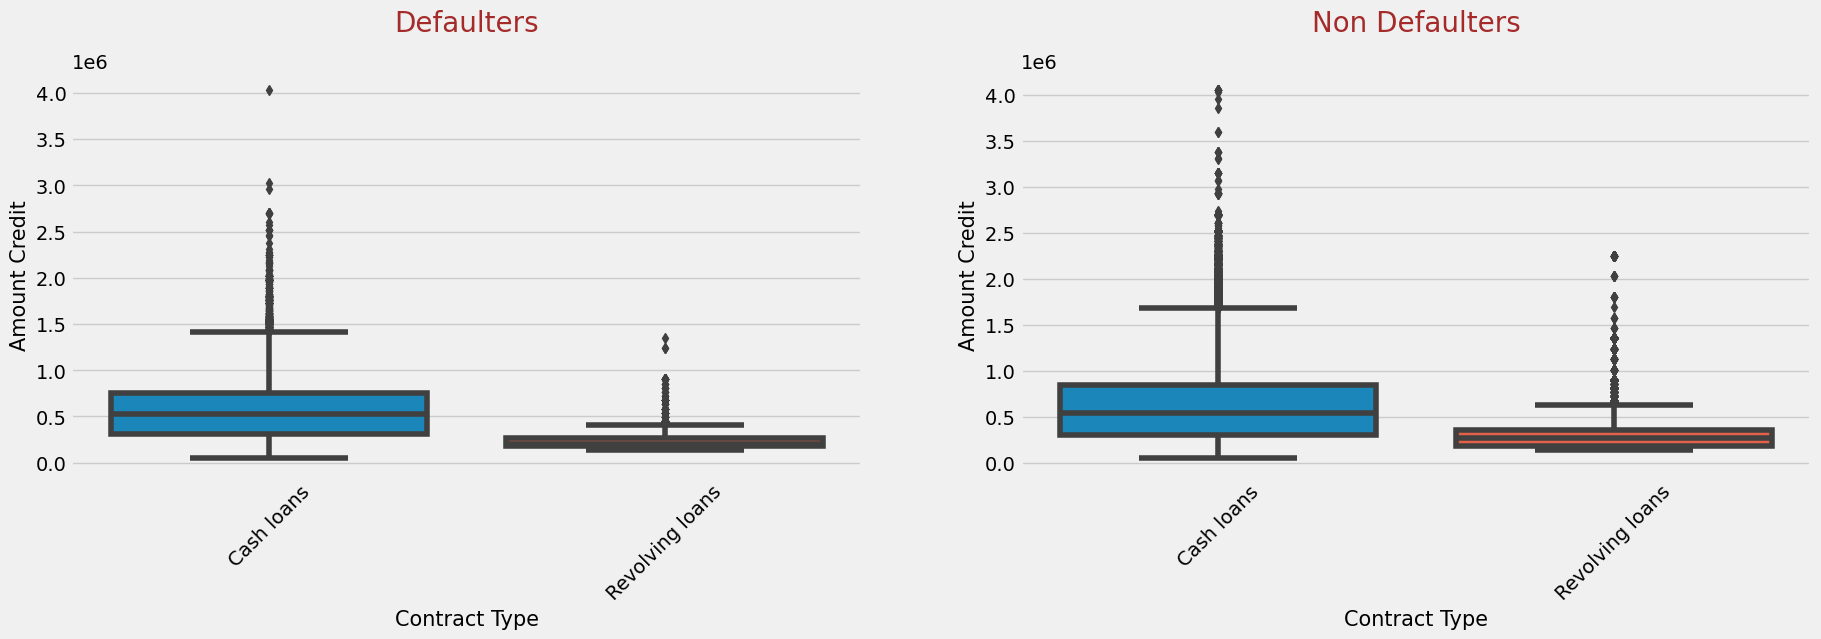

In [258]:
# AMT_CREDIT VS NAME_CONTRACT_TYPE

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
sns.boxplot(x='NAME_CONTRACT_TYPE',y='AMT_CREDIT', data=had_difficulties)
plt.xlabel('Contract Type', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.boxplot(x='NAME_CONTRACT_TYPE',y='AMT_CREDIT', data=had_no_difficulties)
plt.xlabel('Contract Type', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

Cash loans have higher amount credited when compared to revolving loans.

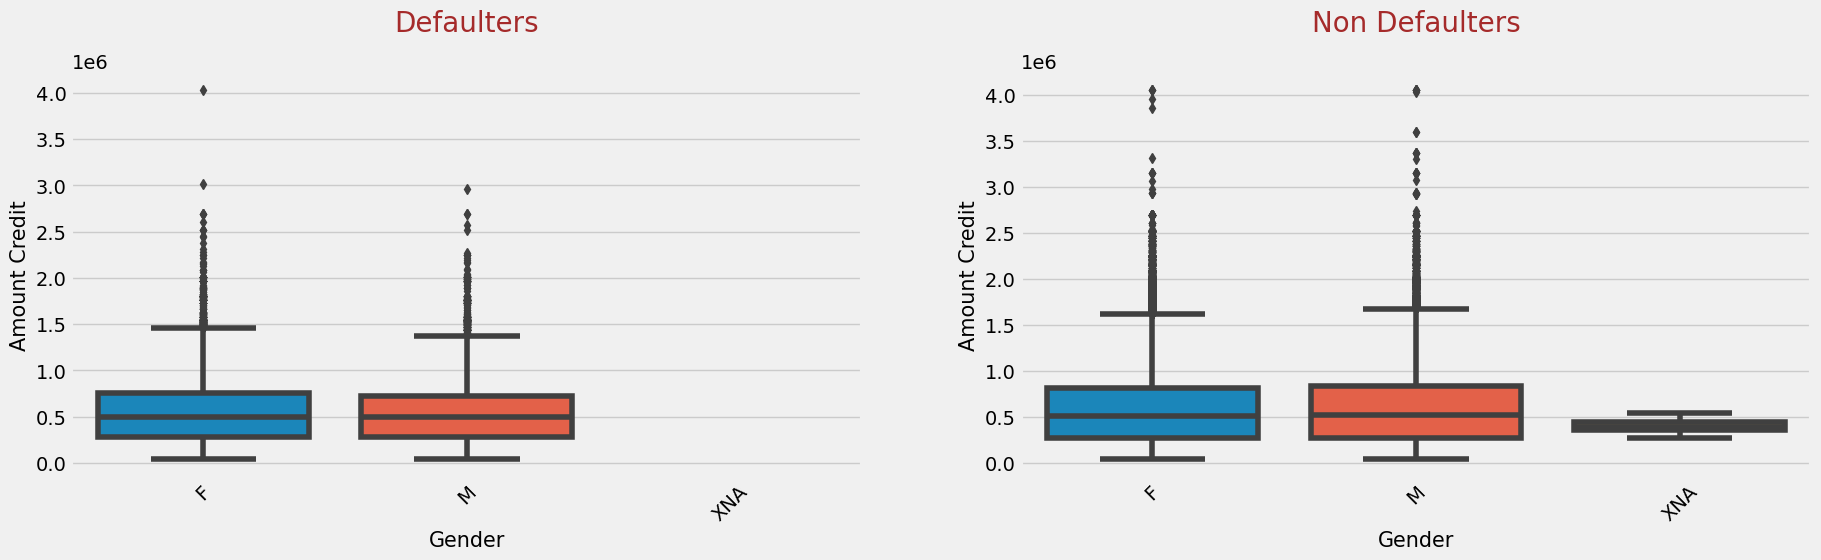

In [259]:
# AMT_CREDIT VS CODE_GENDER

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
sns.boxplot(x='CODE_GENDER',y='AMT_CREDIT', data=had_difficulties)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.boxplot(x='CODE_GENDER',y='AMT_CREDIT', data=had_no_difficulties)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

There isn't much difference in the amount credited for male and female applicants.

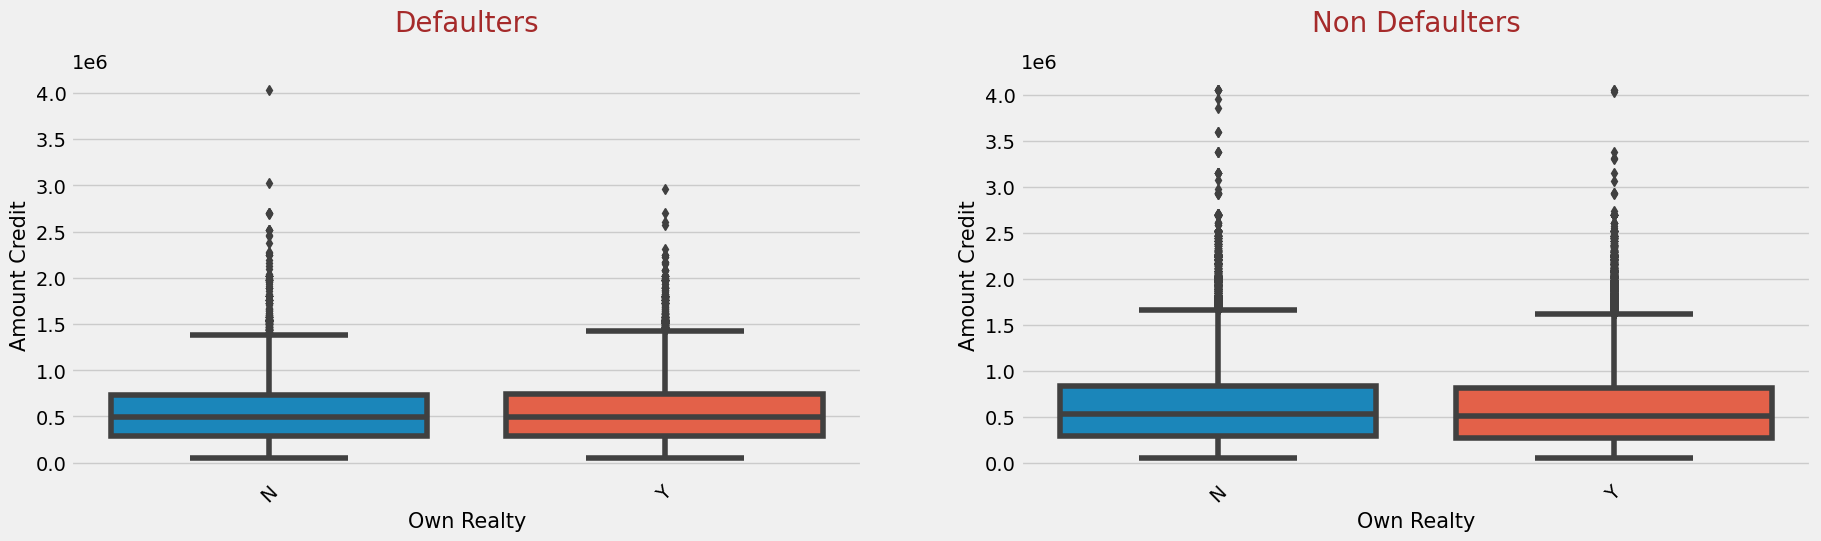

In [260]:
# AMT_CREDIT VS FLAG_OWN_REALTY

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
sns.boxplot(x='FLAG_OWN_REALTY',y='AMT_CREDIT', data=had_difficulties)
plt.xlabel('Own Realty', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.boxplot(x='FLAG_OWN_REALTY',y='AMT_CREDIT', data=had_no_difficulties)
plt.xlabel('Own Realty', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

There isn't much difference in the amount credited for applicants owning realty or not.

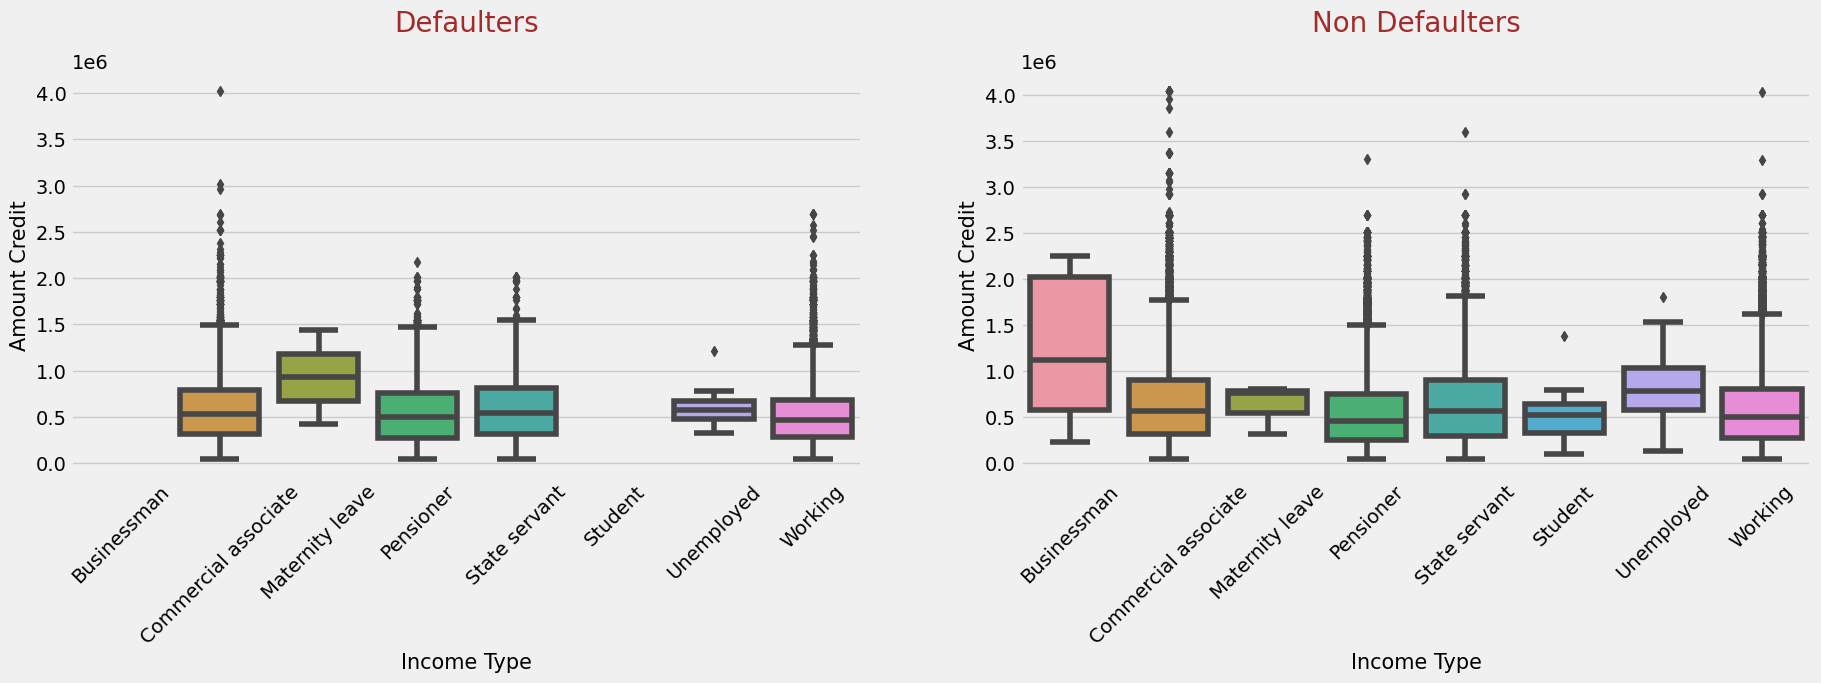

In [261]:
# AMT_CREDIT VS NAME_INCOME_TYPE

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_CREDIT', data=had_difficulties)
plt.xlabel('Income Type', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_CREDIT', data=had_no_difficulties)
plt.xlabel('Income Type', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

Businessman have taken higher loan amounts and they do not seem to default the loan along with students.


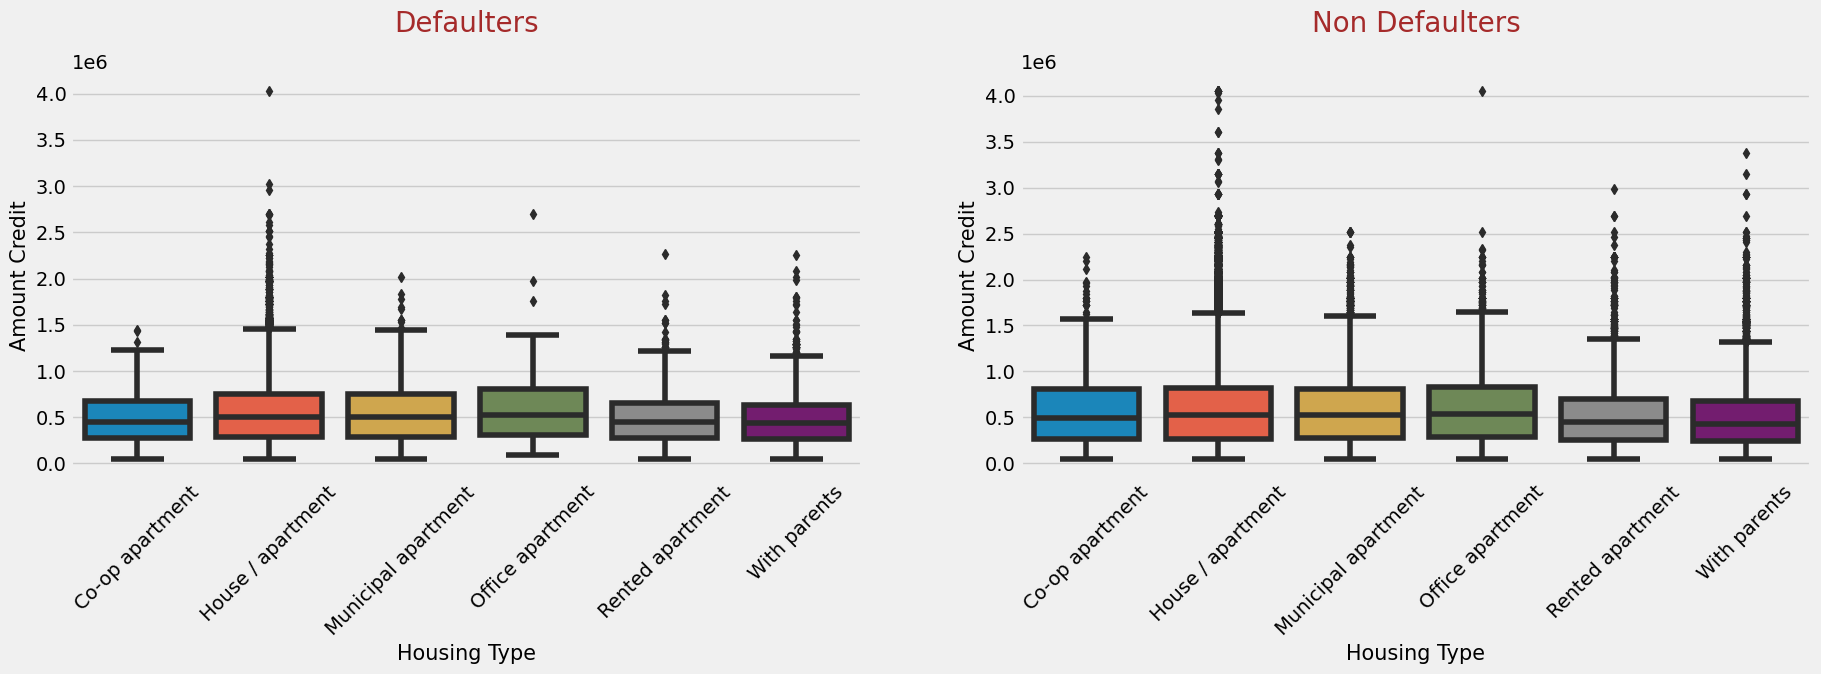

In [263]:
# AMT_CREDIT VS NAME_HOUSING_TYPE

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
sns.boxplot(x='NAME_HOUSING_TYPE',y='AMT_CREDIT', data=had_difficulties)
plt.xlabel('Housing Type', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.boxplot(x='NAME_HOUSING_TYPE',y='AMT_CREDIT', data=had_no_difficulties)
plt.xlabel('Housing Type', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

Loan amount credited is slightly higher for applicants living in House/apartment.

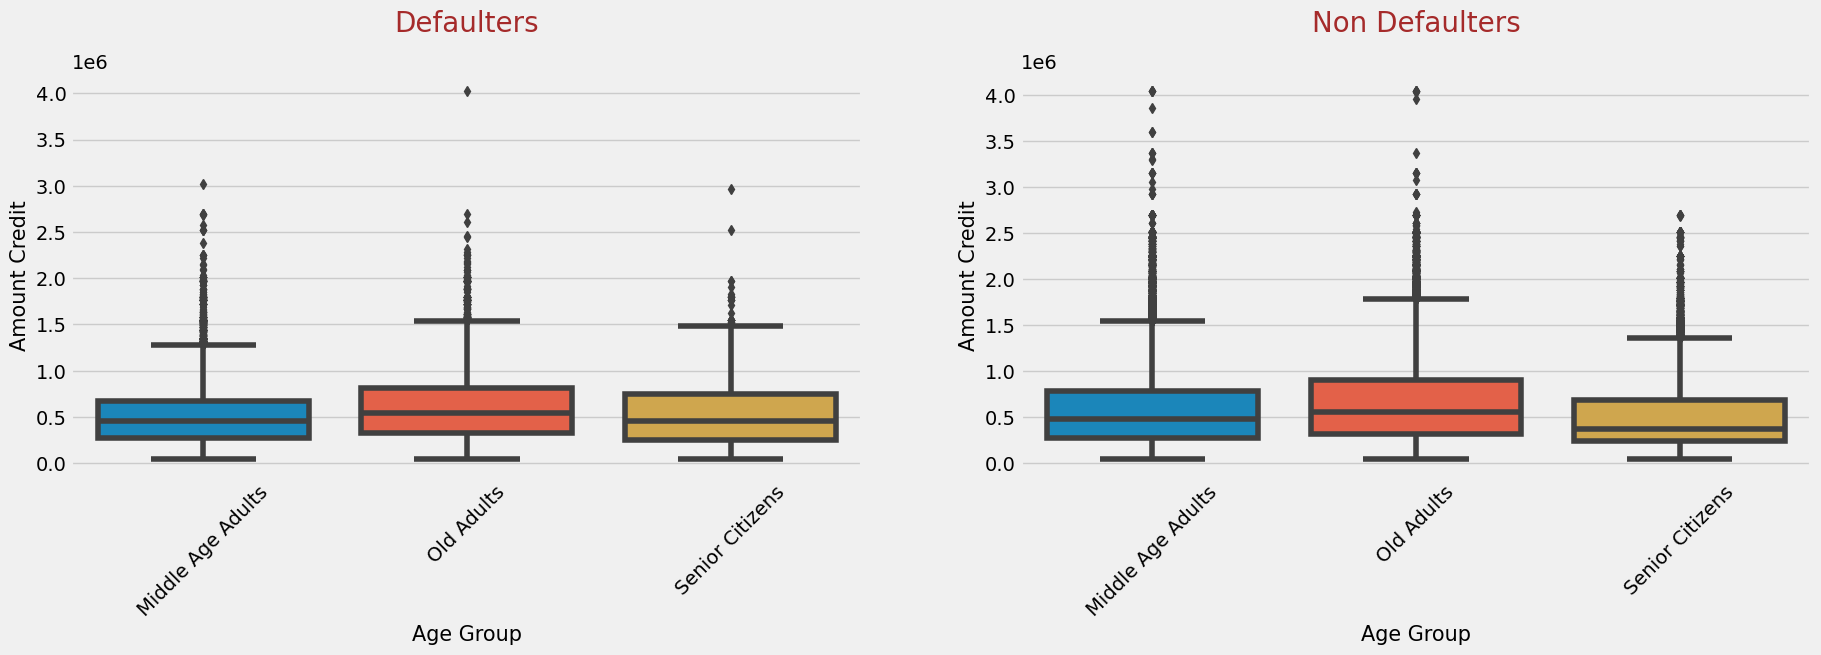

In [266]:
# AMT_CREDIT VS AGE_GROUP

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
sns.boxplot(x='AGE_GROUP',y='AMT_CREDIT', data=had_difficulties)
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.boxplot(x='AGE_GROUP',y='AMT_CREDIT', data=had_no_difficulties)
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

We see that middle age adults are probably the least likely to default.

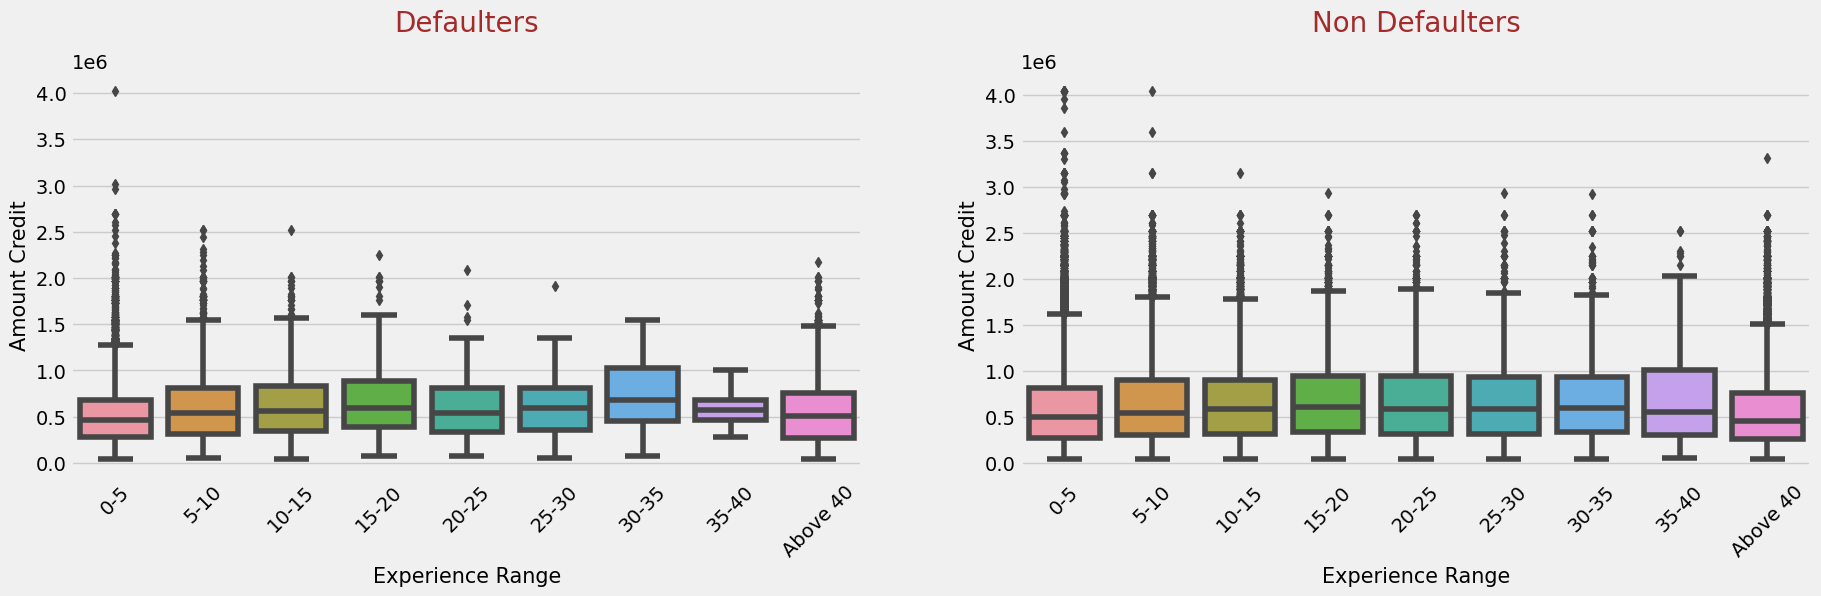

In [267]:
# AMT_CREDIT VS Experience_Range

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
sns.boxplot(x='Experience_Range',y='AMT_CREDIT', data=had_difficulties)
plt.xlabel('Experience Range', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.boxplot(x='Experience_Range',y='AMT_CREDIT', data=had_no_difficulties)
plt.xlabel('Experience Range', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

Applicants with higher work experience are credited higher loan amount.

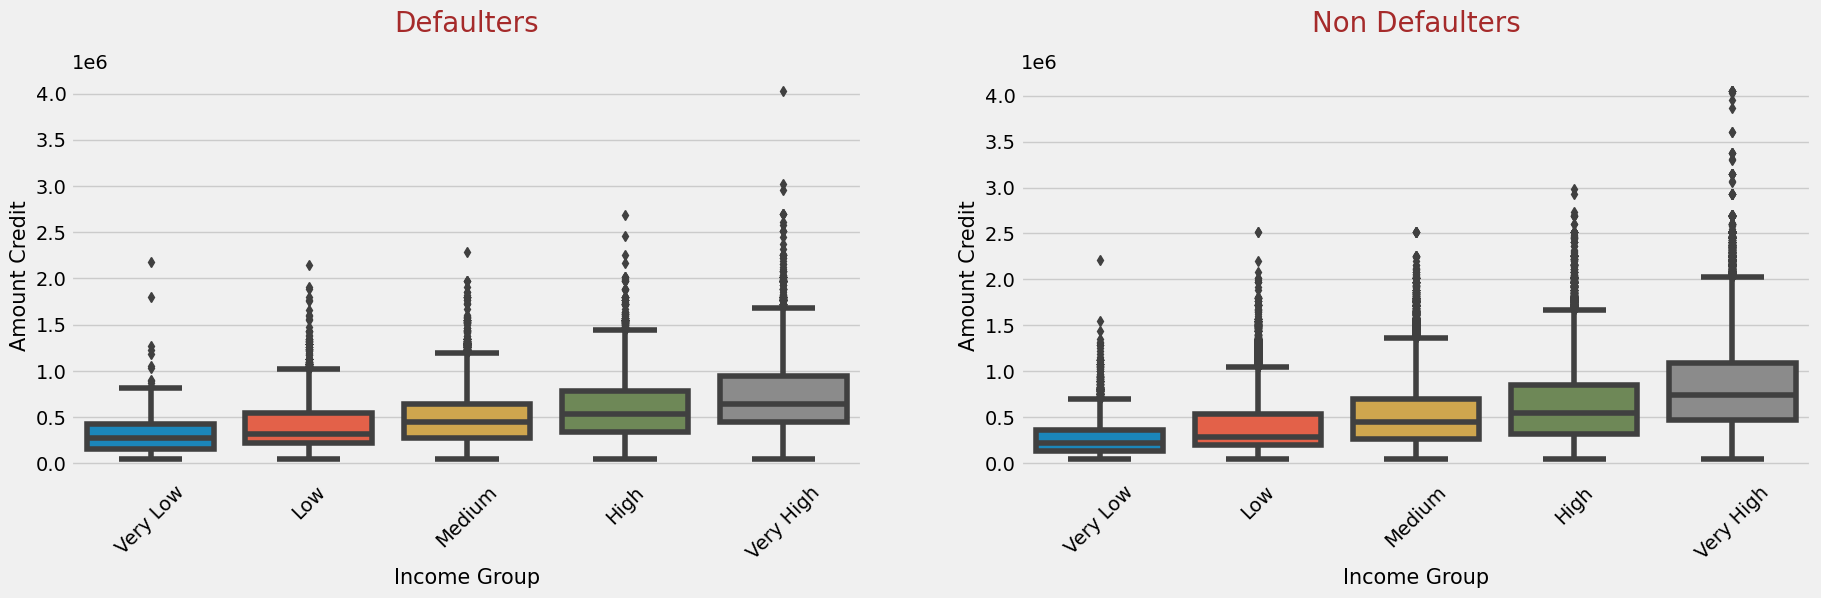

In [268]:
# AMT_CREDIT VS AMT_INCOME_GROUP

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'brown'})
sns.boxplot(x='AMT_INCOME_GROUP',y='AMT_CREDIT', data=had_difficulties)
plt.xlabel('Income Group', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.boxplot(x='AMT_INCOME_GROUP',y='AMT_CREDIT', data=had_no_difficulties)
plt.xlabel('Income Group', fontsize=15)
plt.ylabel('Amount Credit', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

We can see that applicants belonging to very high income group are able to repay the loan.

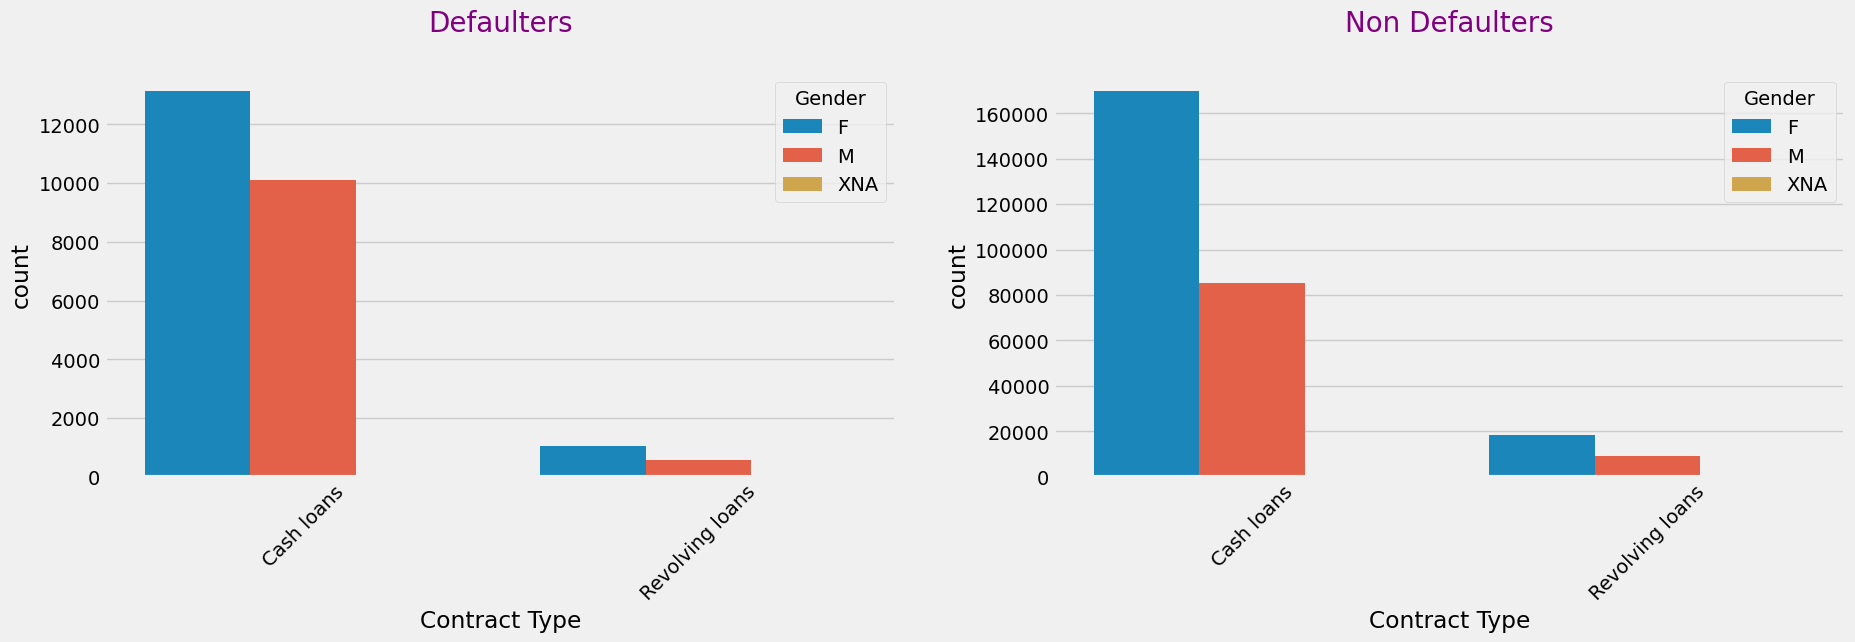

In [275]:
# NAME_CONTRACT_TYPE vs CODE_GENDER

plt.figure(figsize=[20,5])
    
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Purple'})
sns.countplot(had_difficulties['NAME_CONTRACT_TYPE'], hue=had_difficulties['CODE_GENDER'])
plt.xlabel('Contract Type')
plt.xticks(rotation = 45)
plt.legend(title='Gender', loc='upper right')

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Purple'})
sns.countplot(had_no_difficulties['NAME_CONTRACT_TYPE'], hue=had_no_difficulties['CODE_GENDER'])
plt.xlabel('Contract Type')
plt.xticks(rotation = 45)
plt.legend(title='Gender', loc='upper right')

plt.show()

Majority of the applicants are female and have taken cash loans.

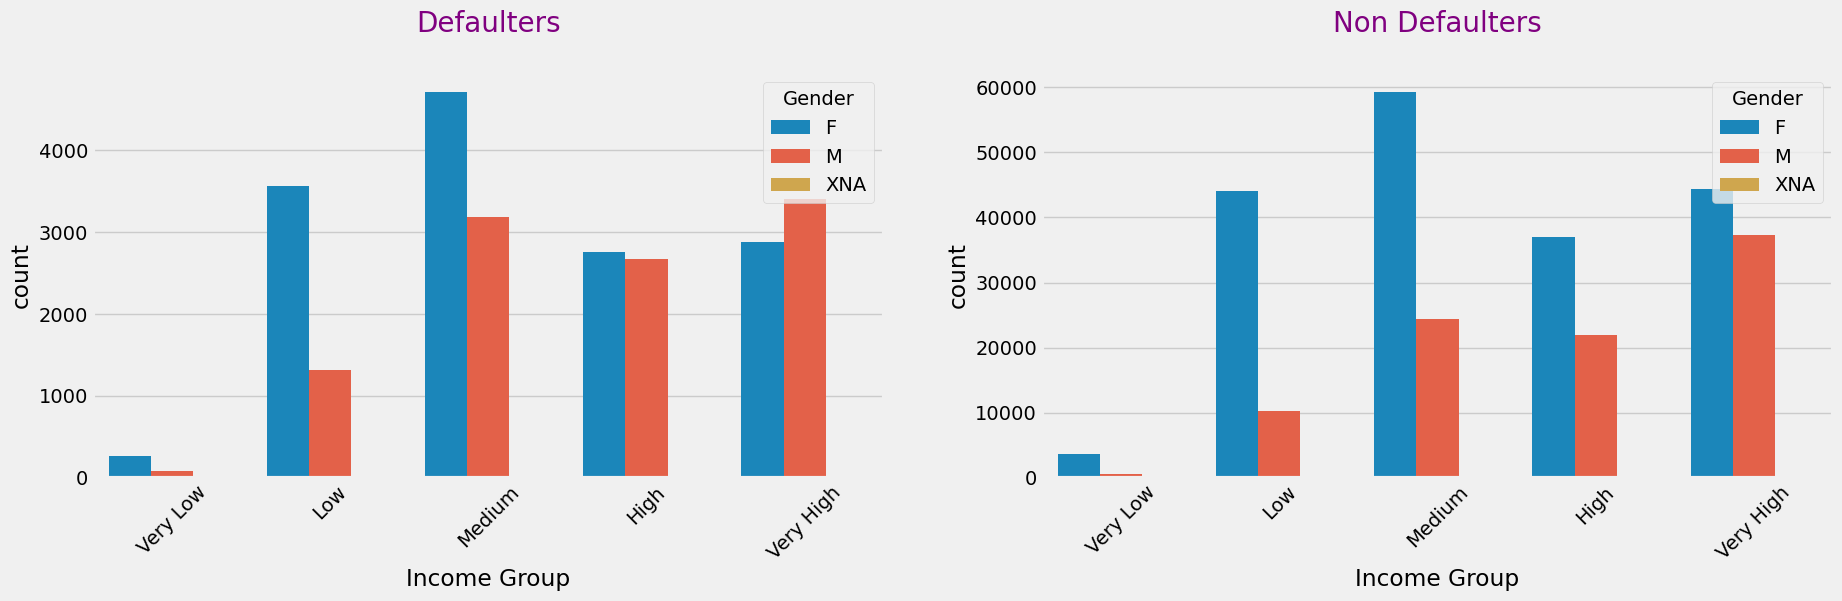

In [276]:
# AMT_INCOME_GROUP vs CODE_GENDER

plt.figure(figsize=[20,5])
    
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Purple'})
sns.countplot(had_difficulties['AMT_INCOME_GROUP'], hue=had_difficulties['CODE_GENDER'])
plt.xlabel('Income Group')
plt.xticks(rotation = 45)
plt.legend(title='Gender', loc='upper right')

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Purple'})
sns.countplot(had_no_difficulties['AMT_INCOME_GROUP'], hue=had_no_difficulties['CODE_GENDER'])
plt.xlabel('Income Group')
plt.xticks(rotation = 45)
plt.legend(title='Gender', loc='upper right')

plt.show()

Male applicants with very high income have defaulted more than female.

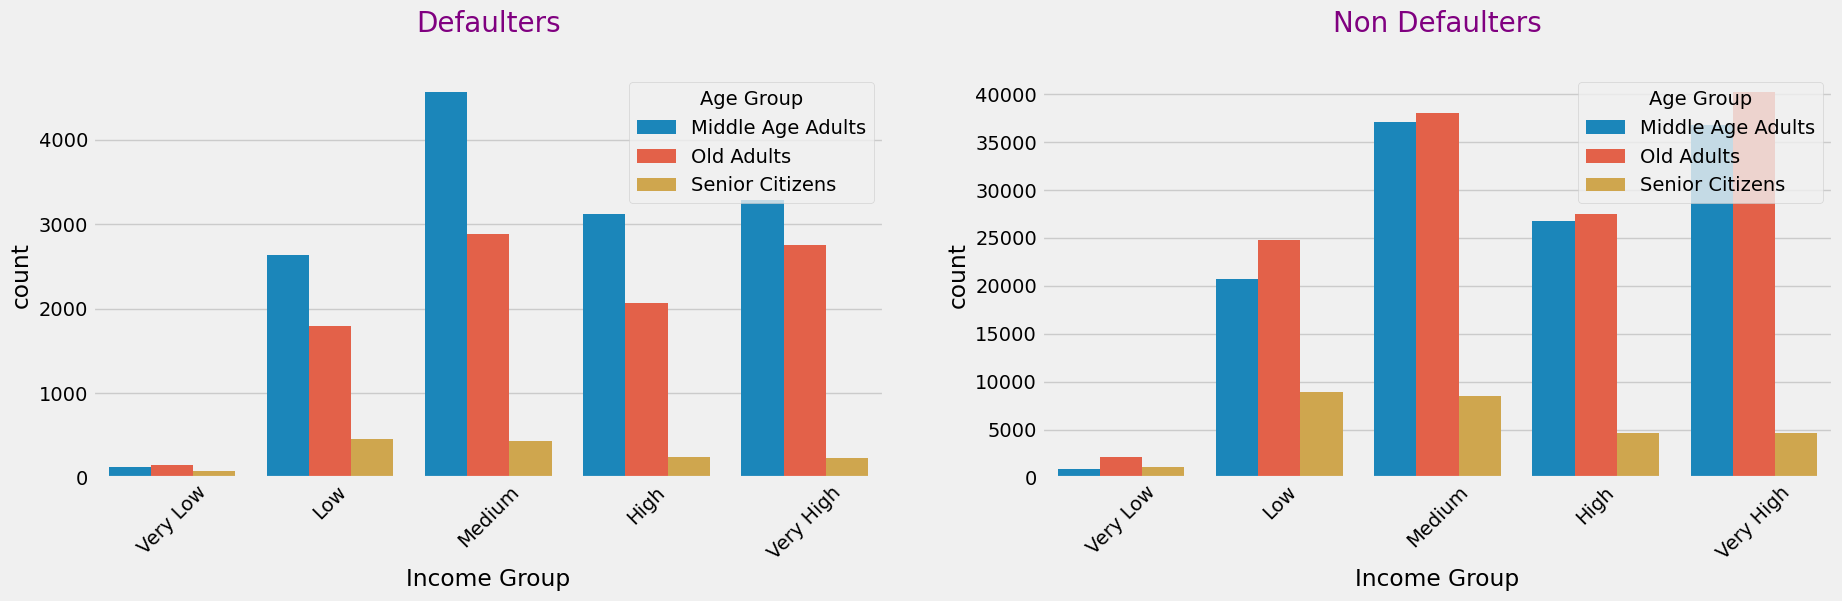

In [283]:
# AGE_GROUP vs AMT_INCOME_GROUP

plt.figure(figsize=[20,5])
    
plt.subplot(1,2,1)
plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Purple'})
sns.countplot(had_difficulties['AMT_INCOME_GROUP'], hue=had_difficulties['AGE_GROUP'])
plt.xlabel('Income Group')
plt.xticks(rotation = 45)
plt.legend(title='Age Group', loc='upper right')

plt.subplot(1,2,2)
plt.title('Non Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Purple'})
sns.countplot(had_no_difficulties['AMT_INCOME_GROUP'], hue=had_no_difficulties['AGE_GROUP'])
plt.xlabel('Income Group')
plt.xticks(rotation = 45)
plt.legend(title='Age Group', loc='upper right')

plt.show()

Middle age adults belonging to medium income group have defaulted more.

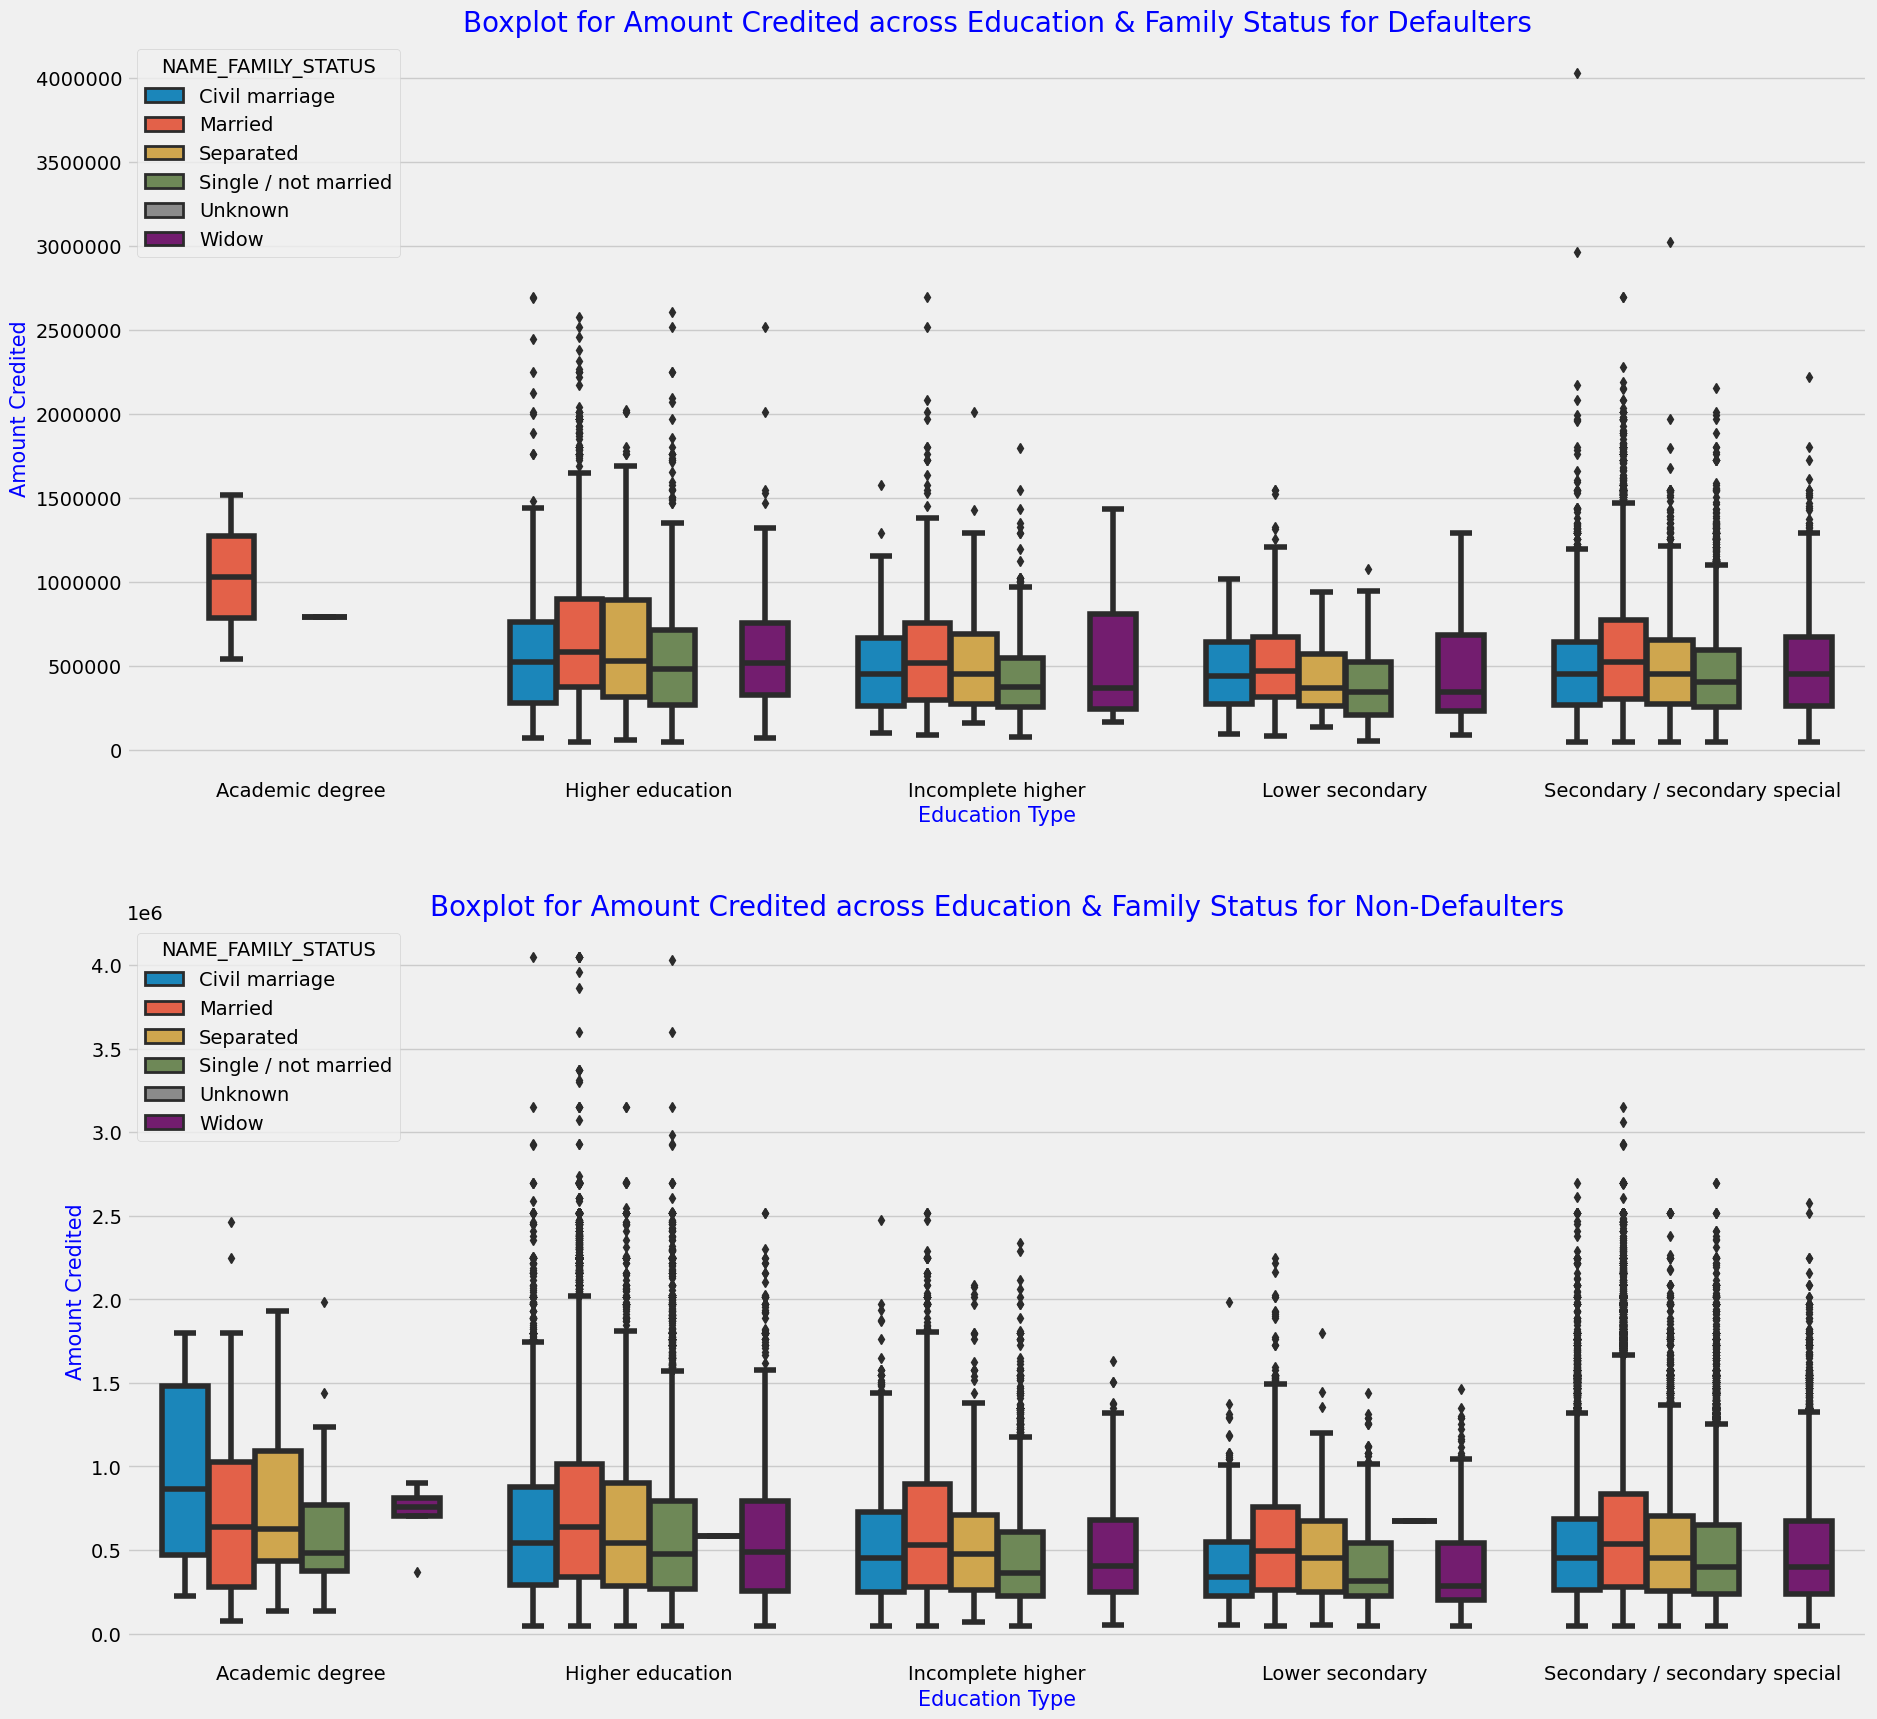

In [299]:
#Analysing Education vs Amount Credited against Family


plt.figure(figsize=[20,20])
    
plt.subplot(2,1,1)
sns.boxplot(data=had_difficulties, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS')
plt.title('Boxplot for Amount Credited across Education & Family Status for Defaulters',color='Blue',fontsize=20)
plt.ylabel('Amount Credited', fontsize=15, color='blue')
plt.xlabel('Education Type', fontsize=15, color='blue')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.subplot(2,1,2)
sns.boxplot(data=had_no_difficulties, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS')
plt.title('Boxplot for Amount Credited across Education & Family Status for Non-Defaulters',color='Blue',fontsize=20)
plt.ylabel('Amount Credited', fontsize=15, color='blue')
plt.xlabel('Education Type', fontsize=15, color='blue')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

It can be seen that most of the applicants are married irrespective of their education and the loan amount credited seems to be higher for people with higher education followed by people with academic degree.

# #Previous_application data

In [332]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1670214 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

### Data Imbalance

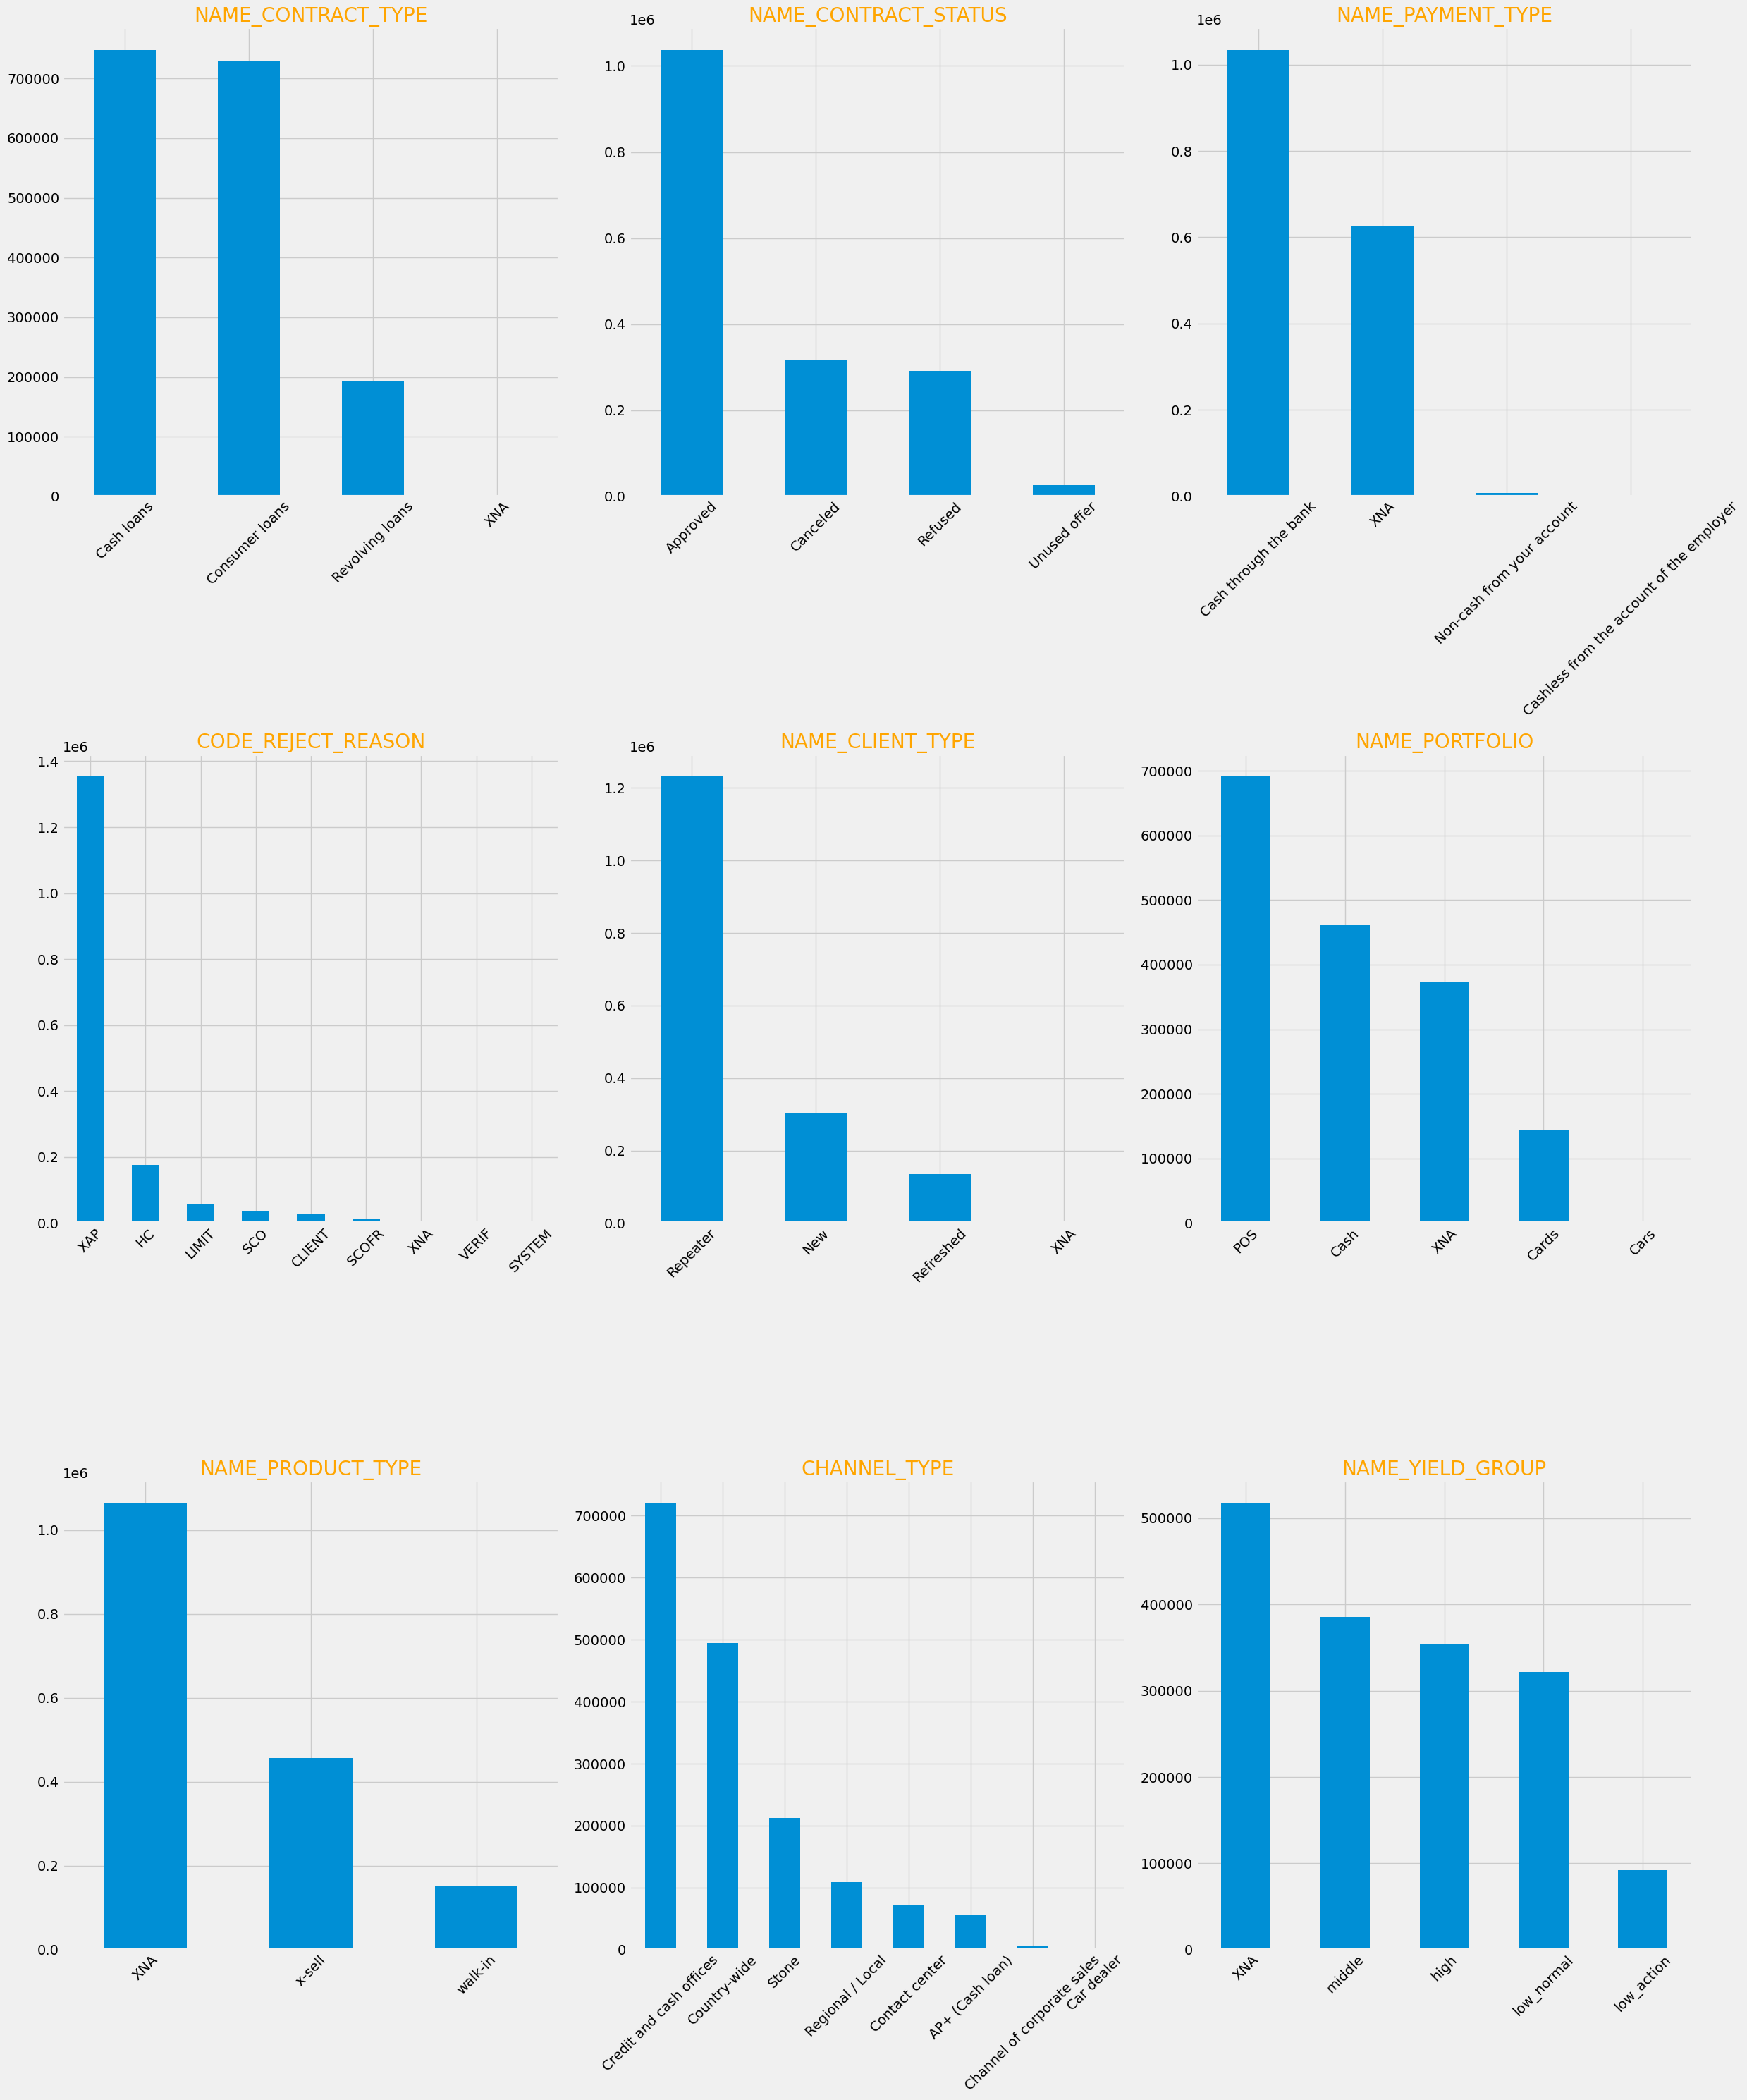

In [341]:
#Data Imbalance in previous_application dataset

cat_prev_cols = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON',
            'NAME_CLIENT_TYPE','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_YIELD_GROUP']
k=0
plt.figure(figsize=(25,30))
for x in cat_prev_cols:    
    k=k+1
    plt.subplot(3,3,k)    
    previous_application[x].value_counts().plot(kind='bar');
    plt.title(x,color='orange')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    

**Inference:** <br>
- Most of the data is for Cash loans and consumer loans. There are few records for revolving loans.
- There are very few records for unused offer, few data for refused and cancelled loans and huge amount of data for approved loans.
- There are a large number of repeater applicants than refreshed and new applicants.
- There are large number of data for payment type cash through banks than other payment modes.
- There are large number of data for credit and cash offices, followed by country-wide and stone than other channel type.
- There are large number of data for POS and almost no data for cars.

### Correlation

In [326]:
# Top 10 correlation variables 
corr_prev=previous_application.corr()
corr_prev=corr_prev.where(np.triu(np.ones(corr_prev.shape), k=1).astype(np.bool))
corr_prev_df=corr_prev.unstack().reset_index()
corr_prev_df.columns=['VAR1','VAR2','Correlation']
corr_prev_df = round(corr_prev_df.sort_values(by=['Correlation'], ascending=False),2)
corr_prev_df.head(10)

VAR1             VAR2  Correlation
43  AMT_GOODS_PRICE  AMT_APPLICATION         0.99
35       AMT_CREDIT  AMT_APPLICATION         0.98
44  AMT_GOODS_PRICE       AMT_CREDIT         0.97
42  AMT_GOODS_PRICE      AMT_ANNUITY         0.82
34       AMT_CREDIT      AMT_ANNUITY         0.81
26  AMT_APPLICATION      AMT_ANNUITY         0.81
59      CNT_PAYMENT  AMT_APPLICATION         0.68
61      CNT_PAYMENT  AMT_GOODS_PRICE         0.68
60      CNT_PAYMENT       AMT_CREDIT         0.67
58      CNT_PAYMENT      AMT_ANNUITY         0.41

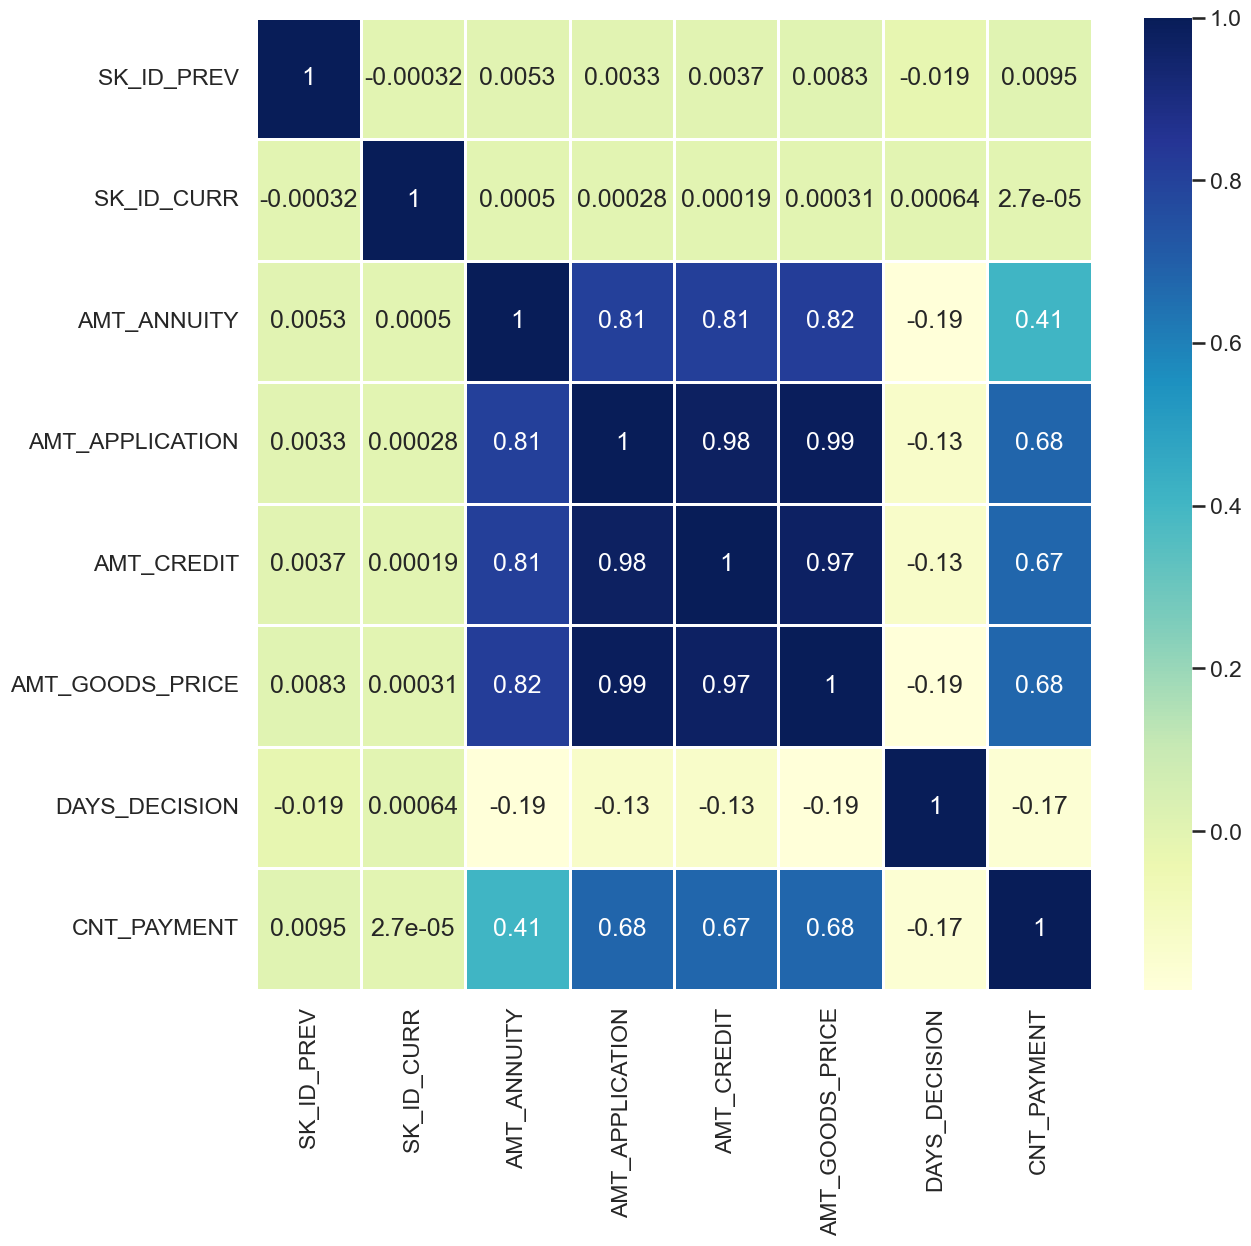

In [405]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(previous_application.corr(), cmap="YlGnBu",annot=True,linewidth =1)

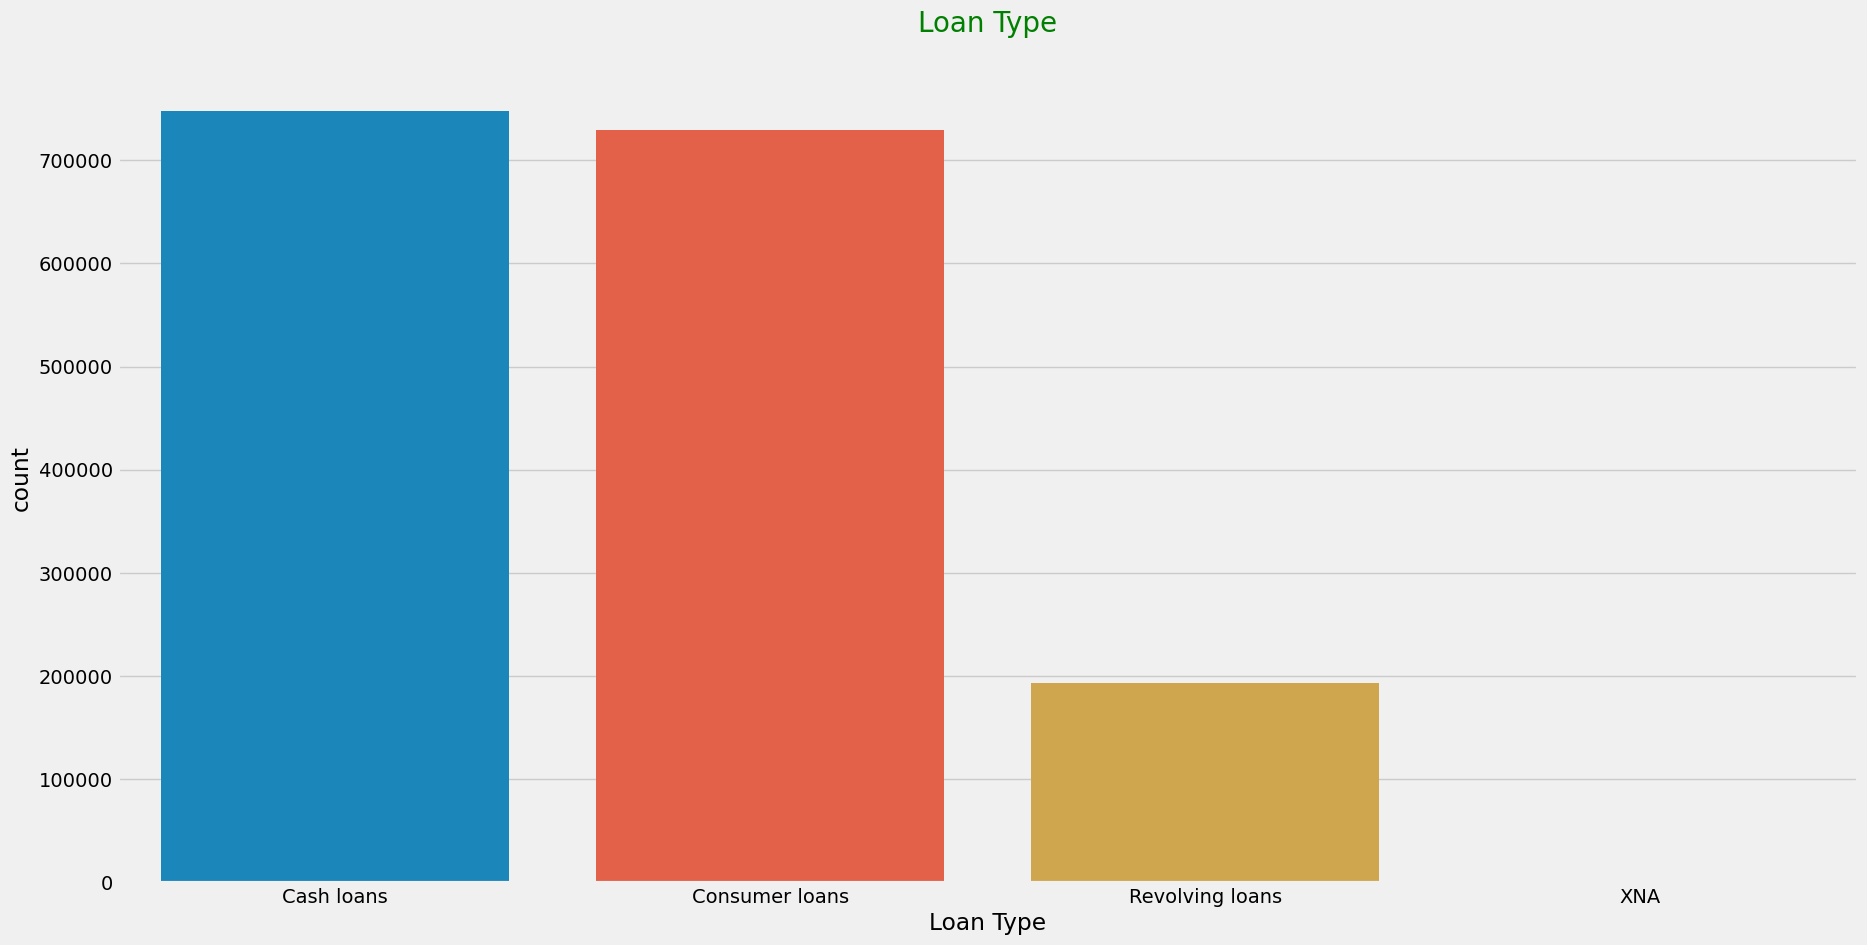

In [302]:

# Analyzing NAME_CONTRACT_TYPE

plt.figure(figsize = [20,10])
sns.countplot(previous_application['NAME_CONTRACT_TYPE'])
plt.title('Loan Type\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan Type")

plt.show()

Majority of the previous loans are either cash loans or consumer loans.

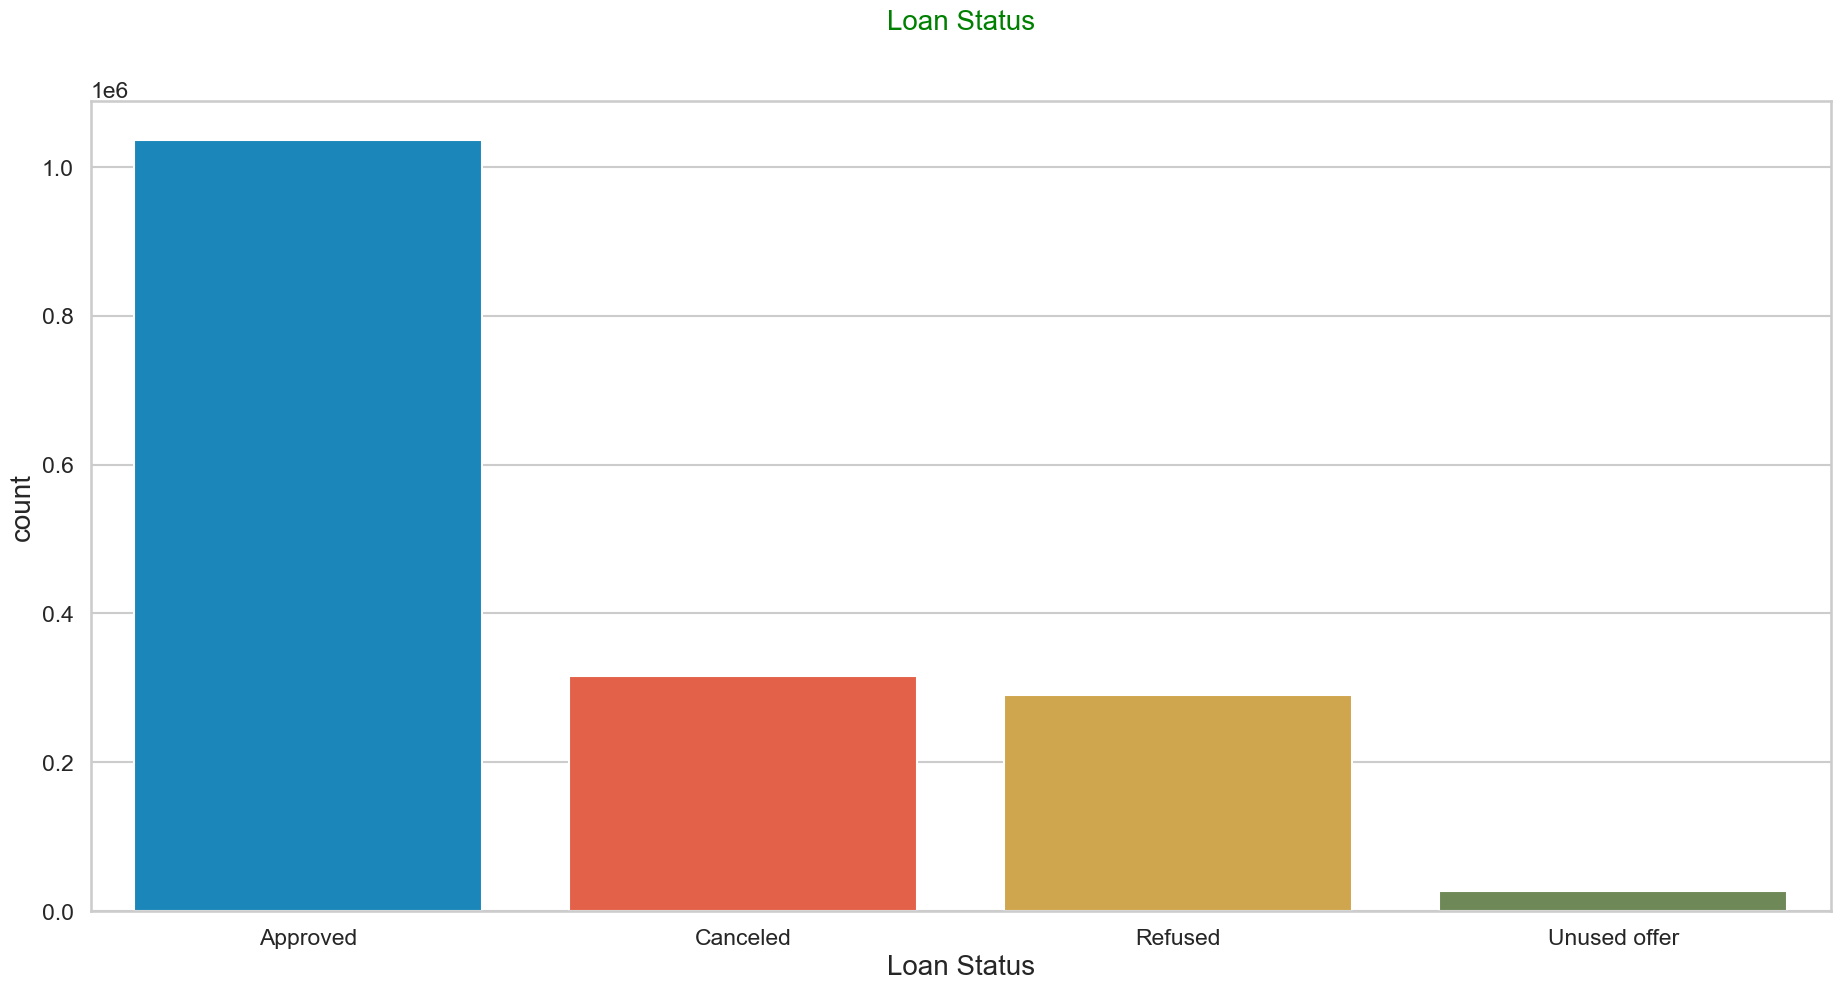

In [414]:
# Analyzing NAME_CONTRACT_STATUS

plt.figure(figsize = [20,10])
sns.countplot(previous_application['NAME_CONTRACT_STATUS'])
plt.title('Loan Status\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan Status")

plt.show()

Majority of the loan applications were approved.

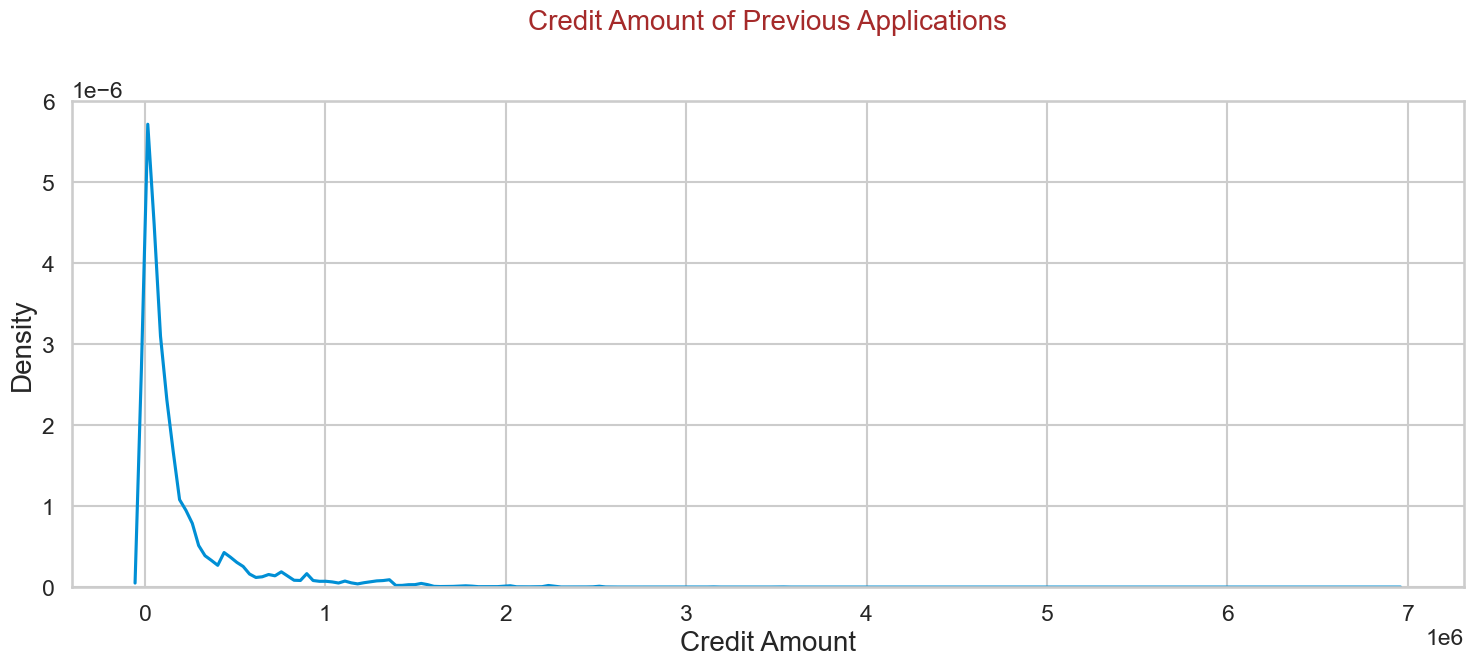

In [367]:
# Numerical data analysis

plt.figure(figsize = [16,6])
sns.distplot(previous_application['AMT_CREDIT'] , hist=False)
plt.title('Credit Amount of Previous Applications\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Credit Amount')
plt.show()

Most of the previous loans have low credit amount

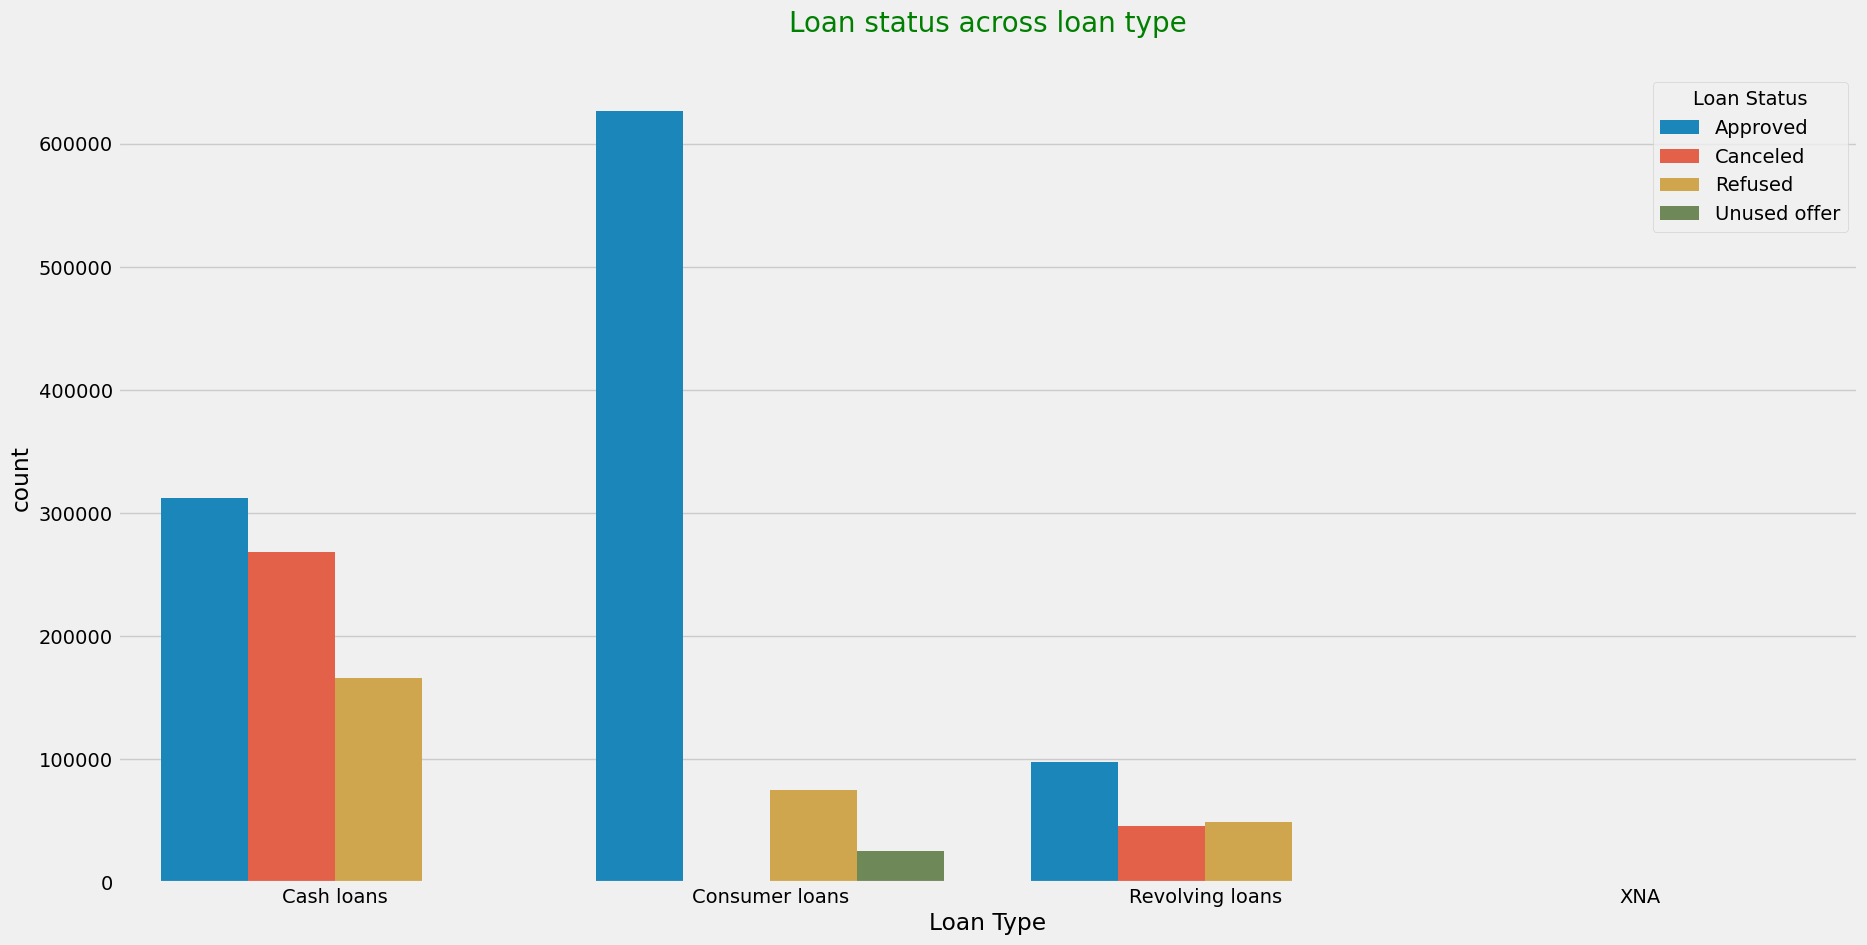

In [305]:
# Analyzing NAME_CONTRACT_STATUS and NAME_CONTRACT_TYPE

plt.figure(figsize = [20,10])
sns.countplot(previous_application['NAME_CONTRACT_TYPE'], hue=previous_application['NAME_CONTRACT_STATUS'])
plt.title('Loan status across loan type\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan Type")
plt.legend(title='Loan Status', loc='upper right')

plt.show()

Consumer loans have the highest approval rate followed by cash loans and then revolving loans.
Majority of the loans which were refused are cash loans.

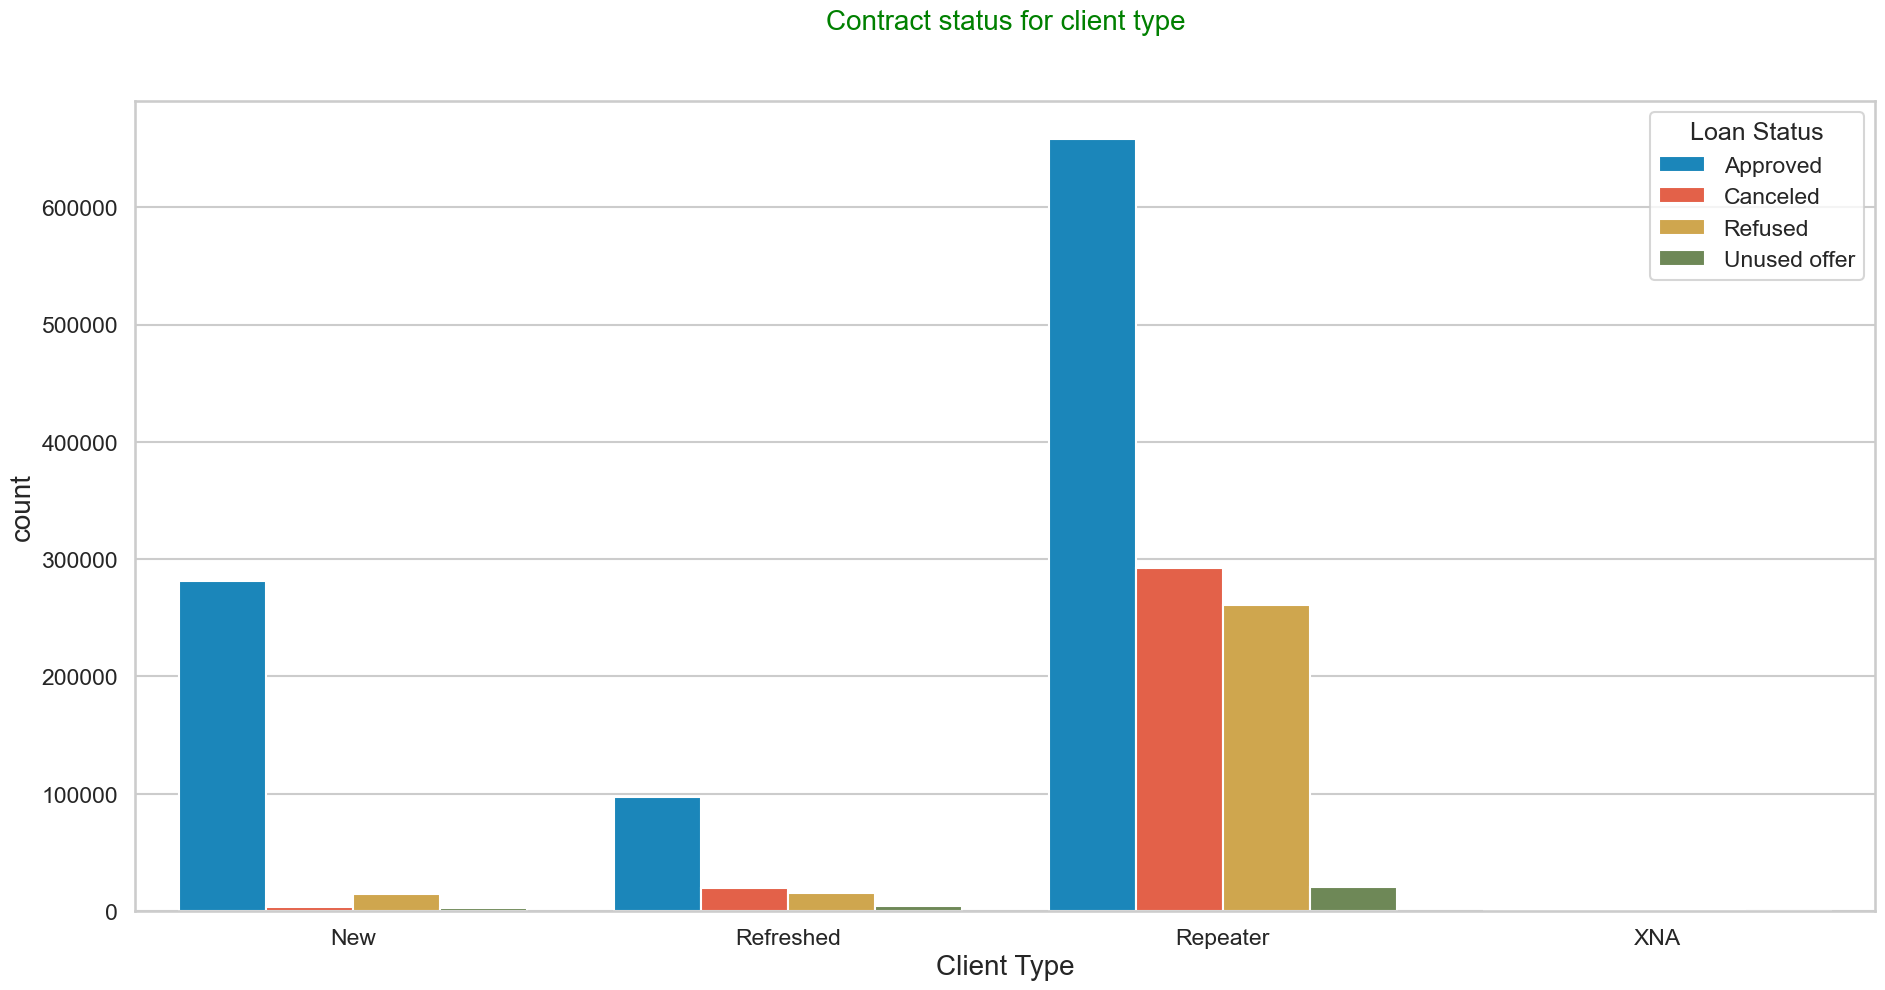

In [377]:
# Analyzing NAME_CONTRACT_STATUS and NAME_CLIENT_TYPE

plt.figure(figsize = [20,10])
sns.countplot(previous_application['NAME_CLIENT_TYPE'], hue=previous_application['NAME_CONTRACT_STATUS'])
plt.title('Contract status for client type\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Client Type")
plt.legend(title='Loan Status', loc='upper right')

plt.show()

Majority of the applications which were approved are from repeating applicants, followed by new applicants.

### Merged Dataframe

In [330]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
merged_data = pd.merge(application_data, previous_application, how='inner', on='SK_ID_CURR')
merged_data.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002      1           Cash loans           M            N   
1      100003      0           Cash loans           F            N   
2      100003      0           Cash loans           F            N   
3      100003      0           Cash loans           F            N   
4      100004      0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                    2   
1              291      Core staff              2.0                    1   
2              291      Core staff              2.0                    1   
3              291      Core staff              2.0                    1   
4             2531        Laborers              1.0                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                           2                  WEDNESDAY   
1                           1                     MONDAY   
2                           1                     MONDAY   
3                           1                     MONDAY   
4                           2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0        

In [347]:
# Rename the duplicated columns

merged_data = merged_data.rename({'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_ANNUITY_y':'AMT_ANNUITY_PREV',
                        'AMT_CREDIT_y':'AMT_CREDIT_PREV',
                         'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                         'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE_CURR',
                         'AMT_ANNUITY_x':'AMT_ANNUITY_CURR',
                         'AMT_CREDIT_x':'AMT_CREDIT_CURR',
                         'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_CURR'}, axis=1)

In [348]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 70 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  category
 2   NAME_CONTRACT_TYPE_CURR      1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_CURR              1413701 non-null  float64 
 9   AMT_ANNUITY_CURR             1413701 non-null  float64 
 10  AMT_GOODS_PRICE_CURR         1413701 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [350]:
# Dividing the data into two based on the TARGET variable for comparative analysis

had_difficulties_merged=merged_data[merged_data['TARGET']==1]
had_no_difficulties_merged=merged_data[merged_data['TARGET']==0]

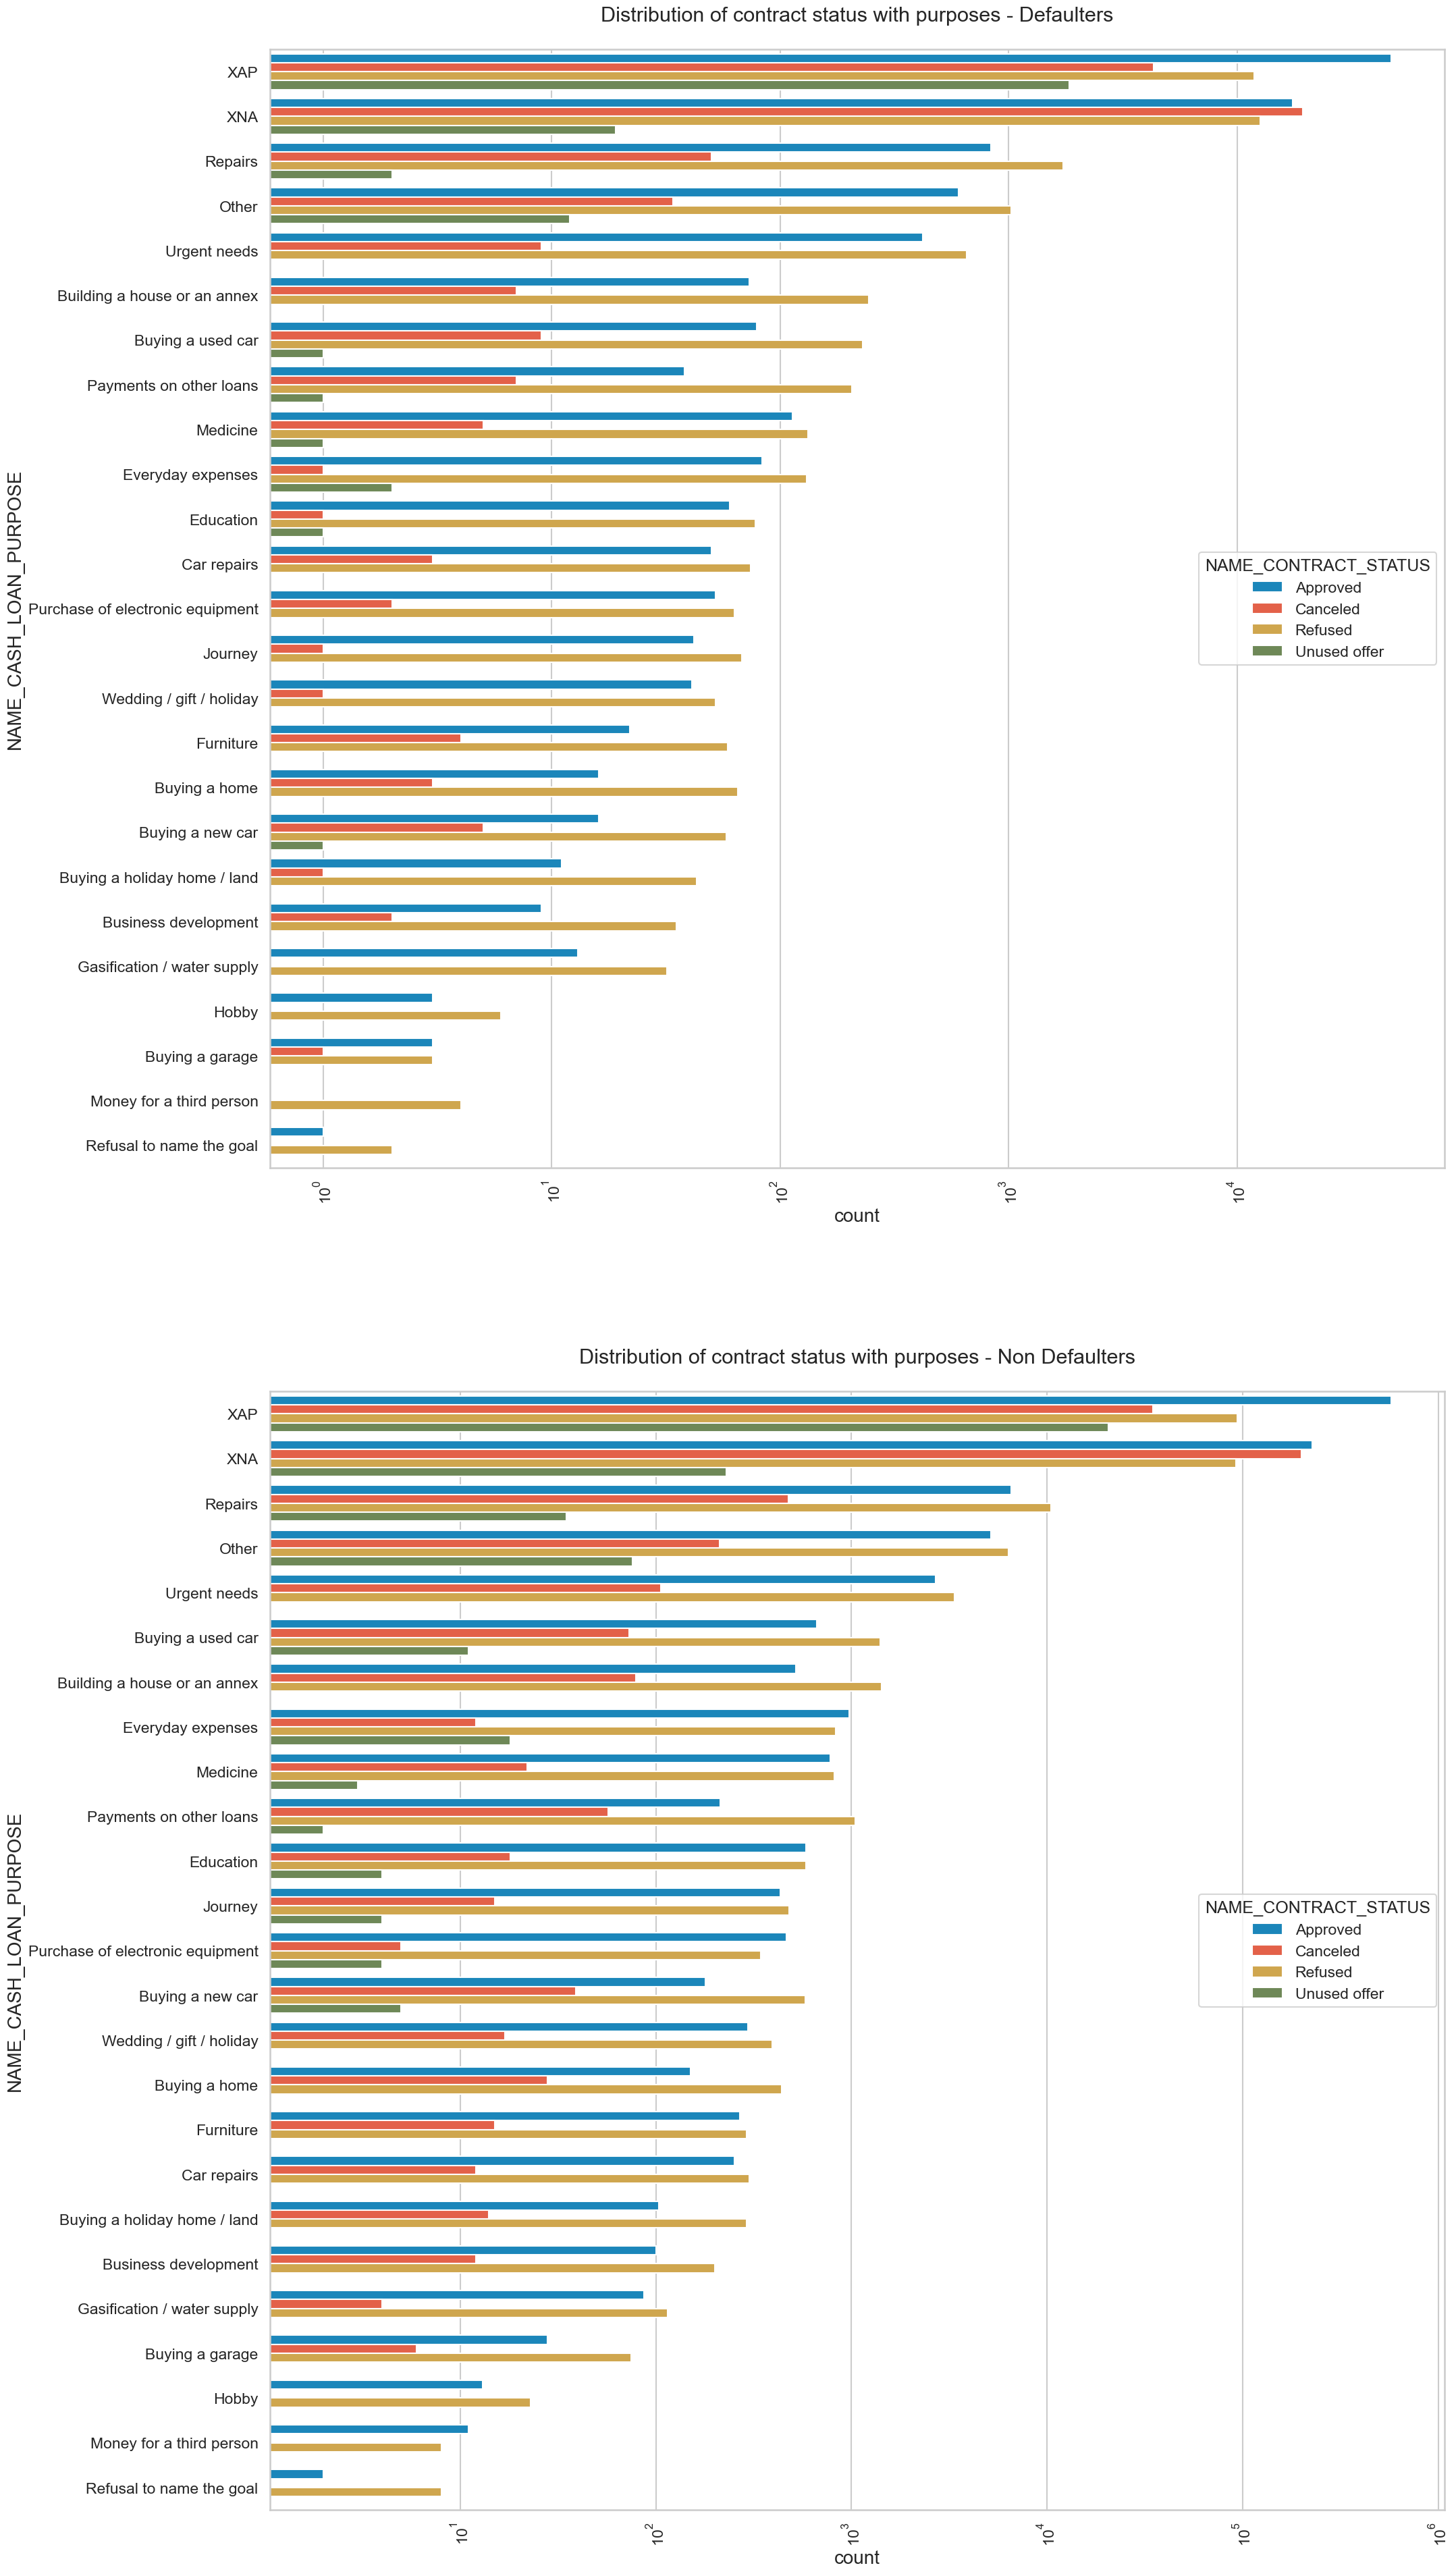

In [364]:
# Analyzing NAME_CASH_LOAN_PURPOSE and NAME_CONTRACT_STATUS w.r.t TARGET

plt.figure(figsize=[20,45])
    
plt.subplot(2,1,1)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes - Defaulters')
ax = sns.countplot(data =had_difficulties_merged , y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=had_difficulties_merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

plt.subplot(2,1,2)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes - Non Defaulters')
ax = sns.countplot(data =had_no_difficulties_merged , y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=had_no_difficulties_merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')

plt.show()

Loan purpose has high number of unknown values (XAP, XNA)
Loan taken for the purpose of 'Repairs' and 'other' seems to have highest refusal rate

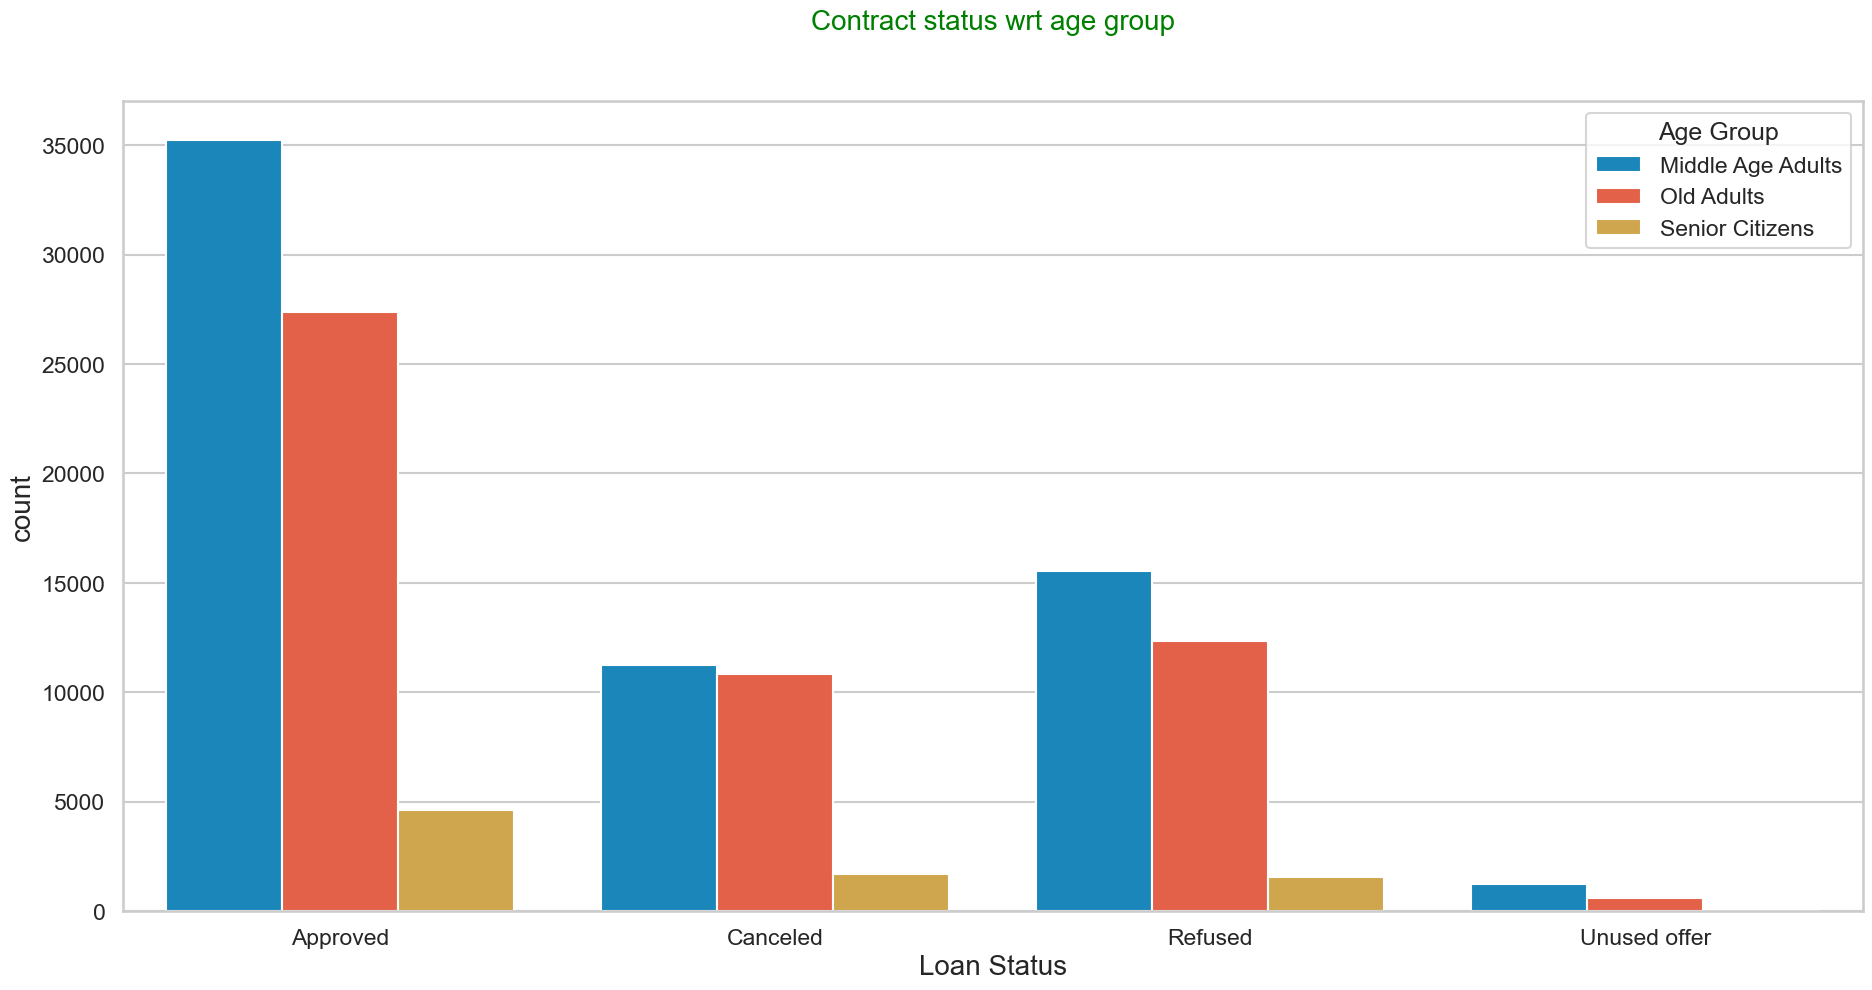

In [382]:
# Analyzing NAME_CONTRACT_STATUS and AGE_GROUP

plt.figure(figsize = [20,10])
sns.countplot(had_difficulties_merged['NAME_CONTRACT_STATUS'], hue=had_difficulties_merged['AGE_GROUP'])
plt.title('Contract status wrt age group\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan Status")
plt.legend(title='Age Group', loc='upper right')

plt.show()

The bank has approved the applications of customers under the category of middle age adults and old adults more than senior citizens and they also seem to default more than senior citizens.

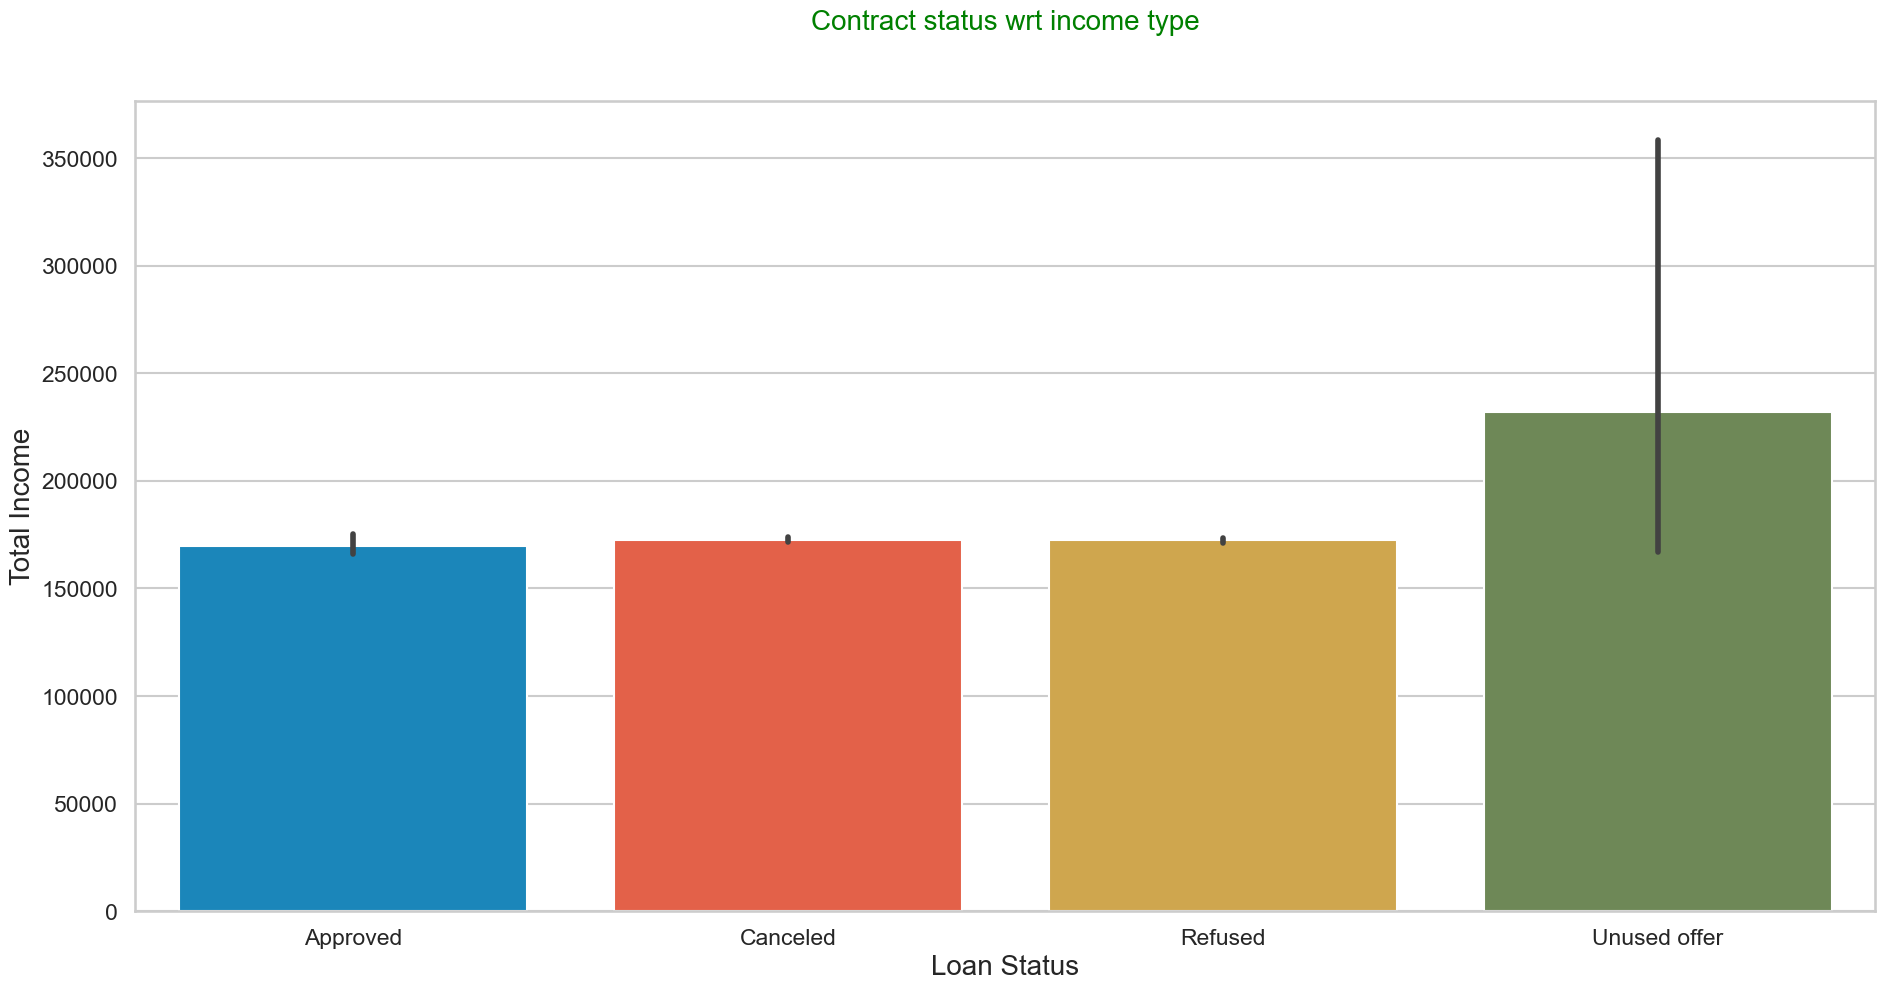

In [415]:
# Analyzing NAME_CONTRACT_STATUS and NAME_INCOME_TYPE

plt.figure(figsize = [20,10])
sns.barplot(x=had_difficulties_merged['NAME_CONTRACT_STATUS'], y=had_difficulties_merged['AMT_INCOME_TOTAL'])
plt.title('Contract status wrt income type\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan Status")
plt.ylabel('Total Income')

plt.show()

Applicants with high income and unused offers are more likely to default compared to others.

**Recommendation/Conclusion** <br>

- Banks must consider the education of the applicants as customers with higher education and academic degree have less defaults.
- Banks should focus more on 'Businessman' and 'Students' as they have low default rate and avoid 'Laborers' as they have high default rate.
- Since customers taking cash loans for repairs and urgent needs are more likely to default, bank can refuse them.
- Banks must also look into applicants work experience as those who have less work experience in the range 0-5 years default more than applicants with more experience.

